In [1]:
#importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#import dataset
appDf=pd.read_csv("application_data.csv")

# EDA on application_data.csv

In [3]:
appDf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
appDf.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [5]:
#We will not consider the columns with nulls more than or equal to 50% nulls or nan
#We won't be able to make a good decision if we have 50% or more missing values.
appDf=appDf[appDf.columns[appDf.isnull().mean()<0.5]]

In [6]:
appDf.shape

(307511, 81)

## Check all the unique values in all the columns

In [7]:
# splitting catagorical data from numerical
catCols=[]
numCols=[]
for i in appDf.columns:
    if len(appDf[i].unique())>30:
        numCols.append(i)
    else:
        catCols.append(i)
print(catCols)
print(numCols)

['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLOORSMAX_MODE', 'EMERGENCYSTATE_MODE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DO

In [8]:
# Check if catagorical columns have any discripencies like spelling mistakes, case changes
for i in catCols:
    print(f"{i} : {appDf[i].unique()}")

TARGET : [1 0]
NAME_CONTRACT_TYPE : ['Cash loans' 'Revolving loans']
CODE_GENDER : ['M' 'F' 'XNA']
FLAG_OWN_CAR : ['N' 'Y']
FLAG_OWN_REALTY : ['Y' 'N']
CNT_CHILDREN : [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
NAME_TYPE_SUITE : ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE : ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE : ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS : ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE : ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
FLAG_MOBIL : [1 0]
FLAG_EMP_PHONE : [1 0]
FLAG_WORK_PHONE : [0 1]
FLAG_CONT_MOBILE : [1 0]
FLAG_PHONE : [1 0]
FLAG_EMAIL : [0 1]
OCCUPATION_TYPE : ['Laborers' 

In [9]:
#fine tuning catagorical columns
notCat=['HOUR_APPR_PROCESS_START','FLOORSMAX_MODE','DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']
newCatCols=[col for col in catCols if col not in notCat]
numCols.extend(notCat)

In [10]:
# Check if numerical columns have any discripencies like spelling mistakes, case changes
for i in numCols:
    print(f"{i} : {appDf[i].unique()}")

SK_ID_CURR : [100002 100003 100004 ... 456253 456254 456255]
AMT_INCOME_TOTAL : [202500.  270000.   67500.  ...  96768.  546250.5 113062.5]
AMT_CREDIT : [ 406597.5 1293502.5  135000.  ...  181989.   743863.5 1391130. ]
AMT_ANNUITY : [24700.5 35698.5  6750.  ... 71986.5 58770.  77809.5]
AMT_GOODS_PRICE : [ 351000.  1129500.   135000.  ...  453465.   143977.5  743863.5]
REGION_POPULATION_RELATIVE : [0.018801 0.003541 0.010032 0.008019 0.028663 0.035792 0.003122 0.018634
 0.019689 0.0228   0.015221 0.031329 0.016612 0.010006 0.020713 0.010966
 0.04622  0.025164 0.006296 0.026392 0.018029 0.019101 0.030755 0.008575
 0.01885  0.006207 0.009175 0.007305 0.007114 0.009334 0.022625 0.01452
 0.006629 0.00733  0.032561 0.00496  0.072508 0.009657 0.02461  0.003069
 0.020246 0.018209 0.009549 0.007274 0.002134 0.010276 0.003813 0.003818
 0.00712  0.0105   0.010147 0.010643 0.008866 0.00702  0.002506 0.005313
 0.006233 0.008474 0.005144 0.011657 0.008625 0.014464 0.004849 0.006008
 0.00963  0.00500

In [11]:
#fine tuning numerical columns
notNum='ORGANIZATION_TYPE'
newNumCols=[col for col in numCols if col!=notNum]
newCatCols.append(notNum)

In [12]:
catCols=newCatCols.copy()
numCols=newNumCols.copy()

### Handling nulls

In [13]:
appDf[appDf.columns[appDf.isnull().sum()>0]].isna().mean()*100

AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
OCCUPATION_TYPE                 31.345545
CNT_FAM_MEMBERS                  0.000650
EXT_SOURCE_2                     0.214626
EXT_SOURCE_3                    19.825307
YEARS_BEGINEXPLUATATION_AVG     48.781019
FLOORSMAX_AVG                   49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_MEDI    48.781019
FLOORSMAX_MEDI                  49.760822
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
DAYS_LAST_PHONE_CHANGE           0.000325
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13

In [14]:
#Dropping columns with nulls close to 50% nulls
#We won't be able to get a good grasp if the nulls are close to 50%
removedCols=[]
for i in appDf.columns:
    if appDf[i].isnull().mean()>=0.45:
        removedCols.append(i)
appDf=appDf[appDf.columns[appDf.isnull().mean()<0.45]]

In [15]:
for i in catCols:
    if i in removedCols:
        catCols.remove(i)
for i in numCols:
    if i in removedCols:
        numCols.remove(i)

### Handling nulls in catagorical columns

In [16]:
appDf[catCols].isnull().mean()*100

TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_WORK_REGION      0.000000
LIVE_REGION_NOT_

<Axes: xlabel='NAME_TYPE_SUITE'>

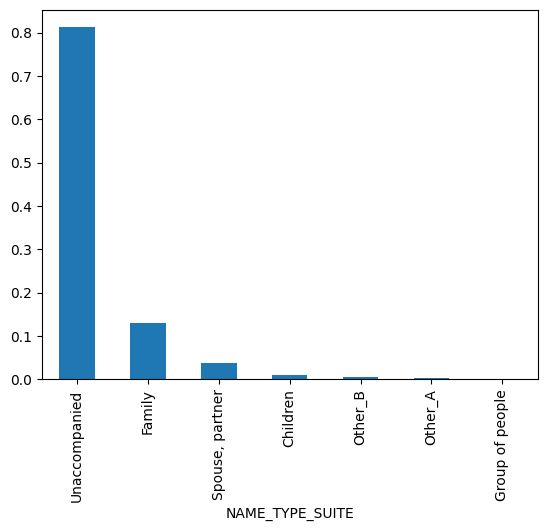

In [17]:
appDf.NAME_TYPE_SUITE.value_counts(normalize=True).plot.bar()

In [18]:
#replacing with mode of the column, because this is a catagorical column
appDf.NAME_TYPE_SUITE.fillna(appDf.NAME_TYPE_SUITE.mode()[0],inplace=True)

C:\Users\Nikhilesh\AppData\Local\Temp\ipykernel_13872\4244623635.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  appDf.NAME_TYPE_SUITE.fillna(appDf.NAME_TYPE_SUITE.mode()[0],inplace=True)


In [19]:
#Filling nan in CNT_FAM_MEMBERS
#we can be sure that number of members is children count + 1 because the applicant is obviously the adult
appDf.CNT_FAM_MEMBERS=appDf.CNT_FAM_MEMBERS.fillna(appDf.CNT_CHILDREN+1)

## Creating plots for all catagorical columns to derive conclusions

In [20]:
#creating function to create graphs for all the catagorical columns.
def plotting(train, train0, train1, column):
    
    train = train
    train_0 = train0
    train_1 = train1
    col = column
    
    fig = plt.figure(figsize=(13,10))
    
    ax1 = plt.subplot(221)
    train[col].value_counts().plot.pie(autopct = "%1.0f%%", ax=ax1)
    plt.title('Plotting data for the column: '+ column)
    
    ax2 = plt.subplot(222)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax2)
    plt.xticks(rotation=90)
    plt.title('Plotting data for target in terms of total count')


    ax3 = plt.subplot(223)
    df = pd.DataFrame()
    df['0']= ((train_0[col].value_counts())/len(train_0))
    df['1']= ((train_1[col].value_counts())/len(train_1))
    df.plot.bar(ax=ax3)
    plt.title('Plotting data for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()
      

In [21]:
#splitting data into people who didn't fail to pay their installments and who did
target0=appDf[appDf.TARGET==0]
target1=appDf[appDf.TARGET==1]

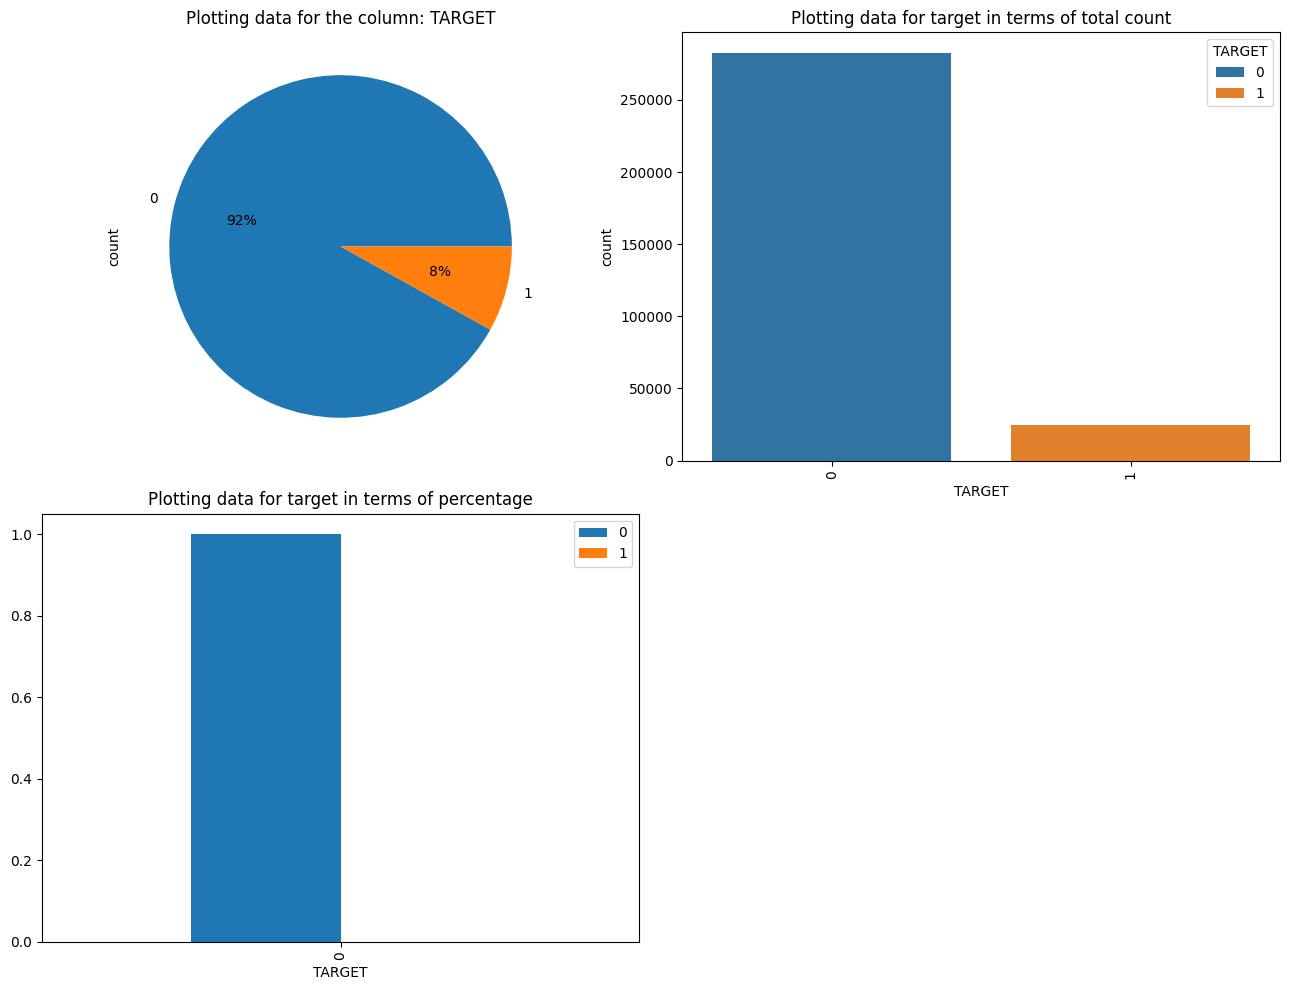

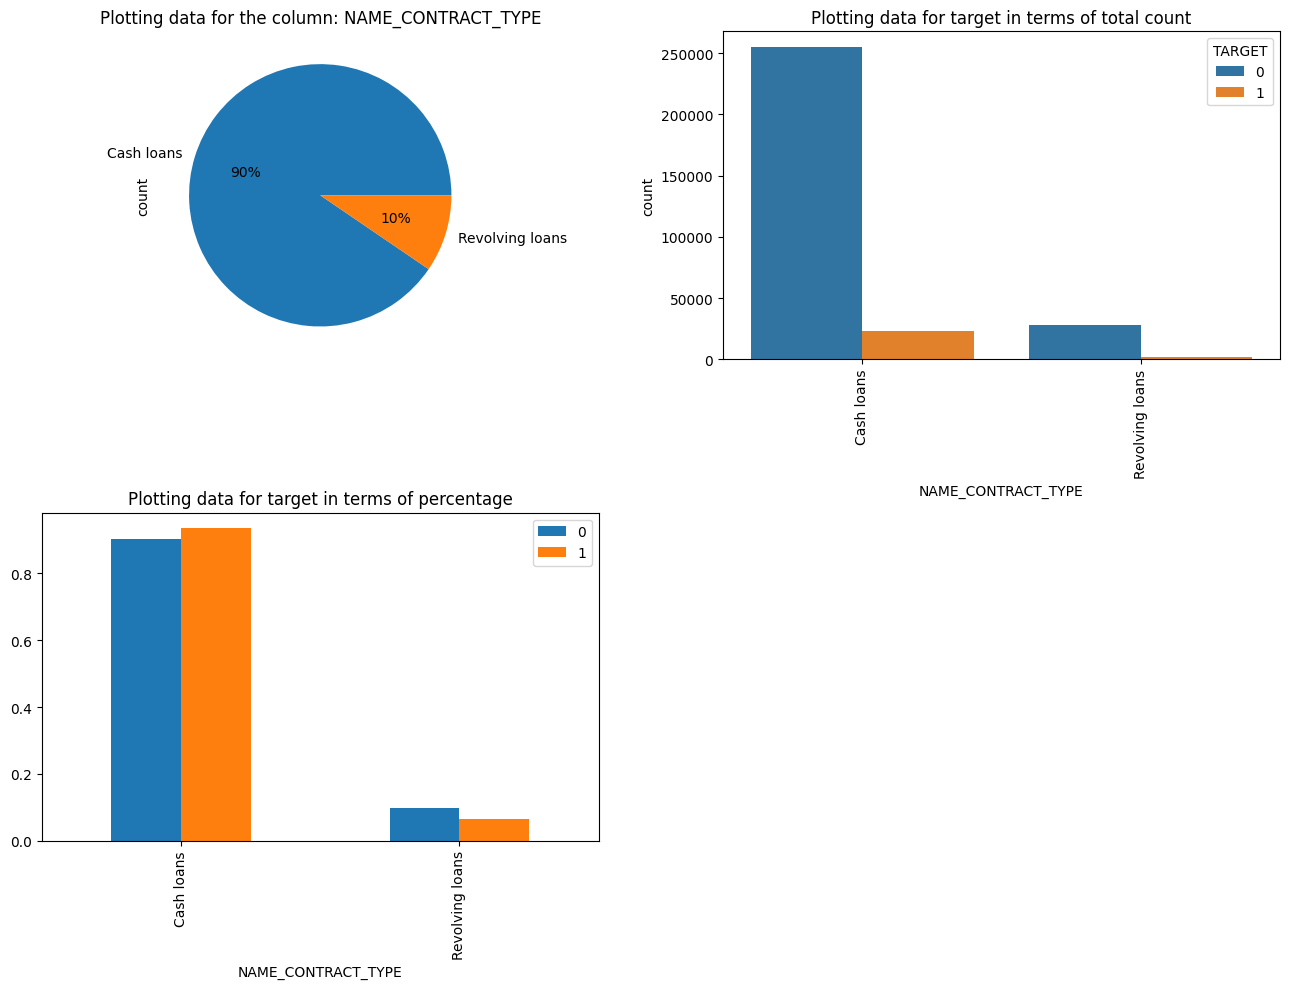

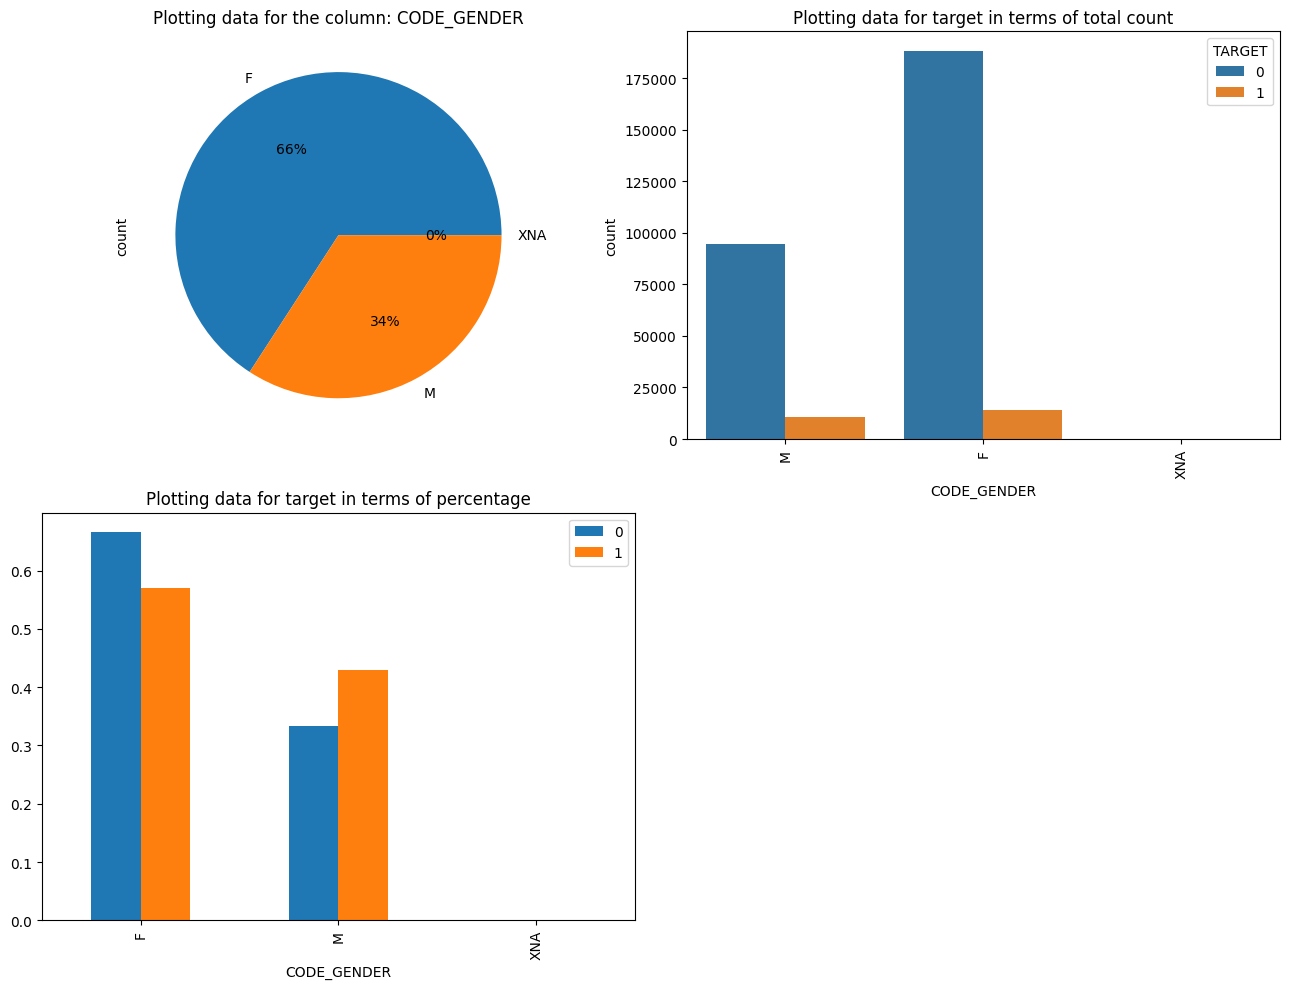

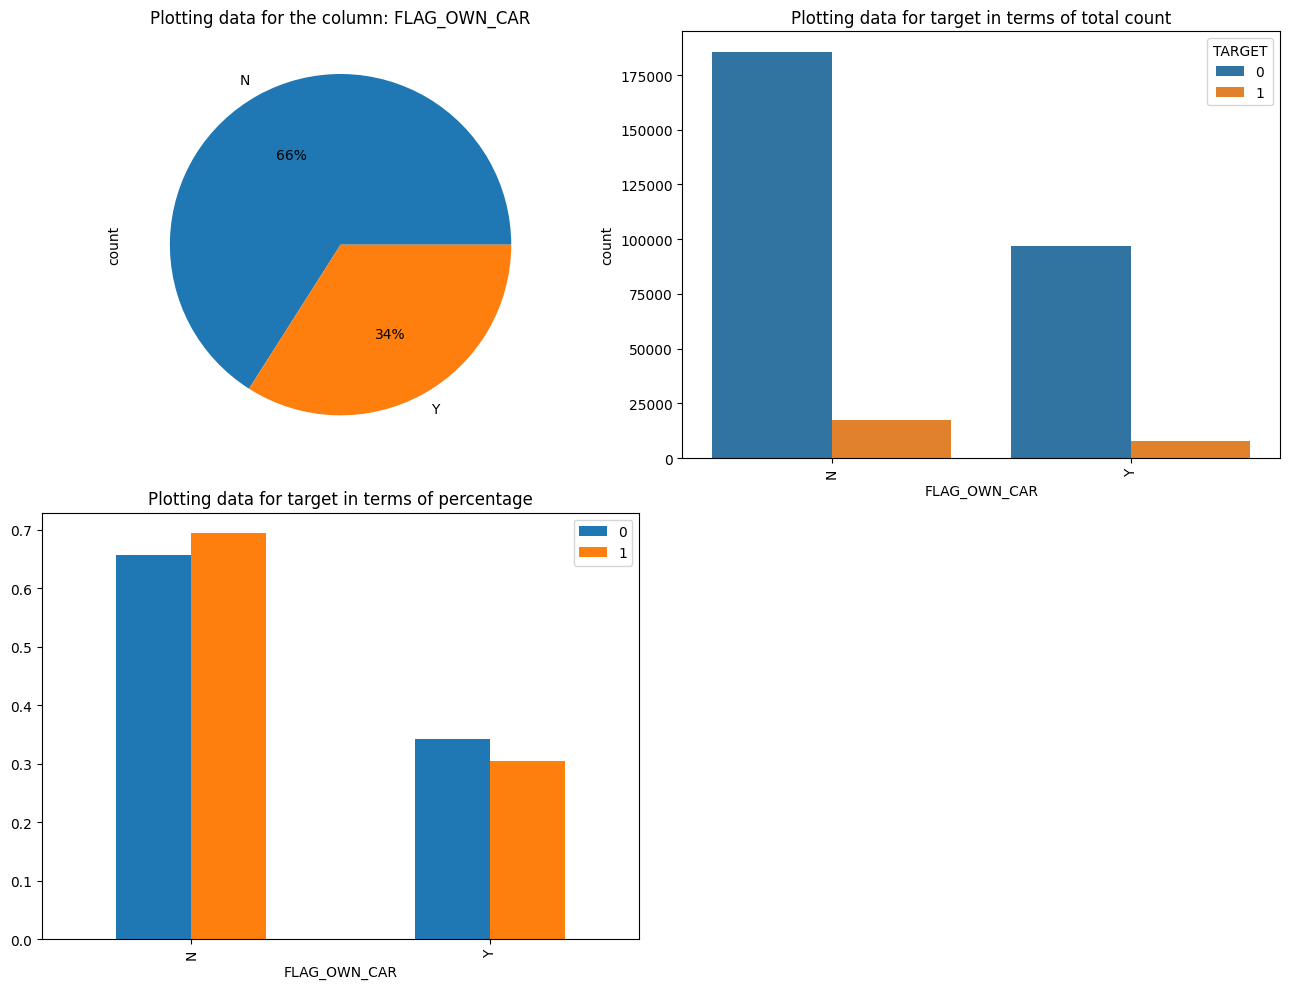

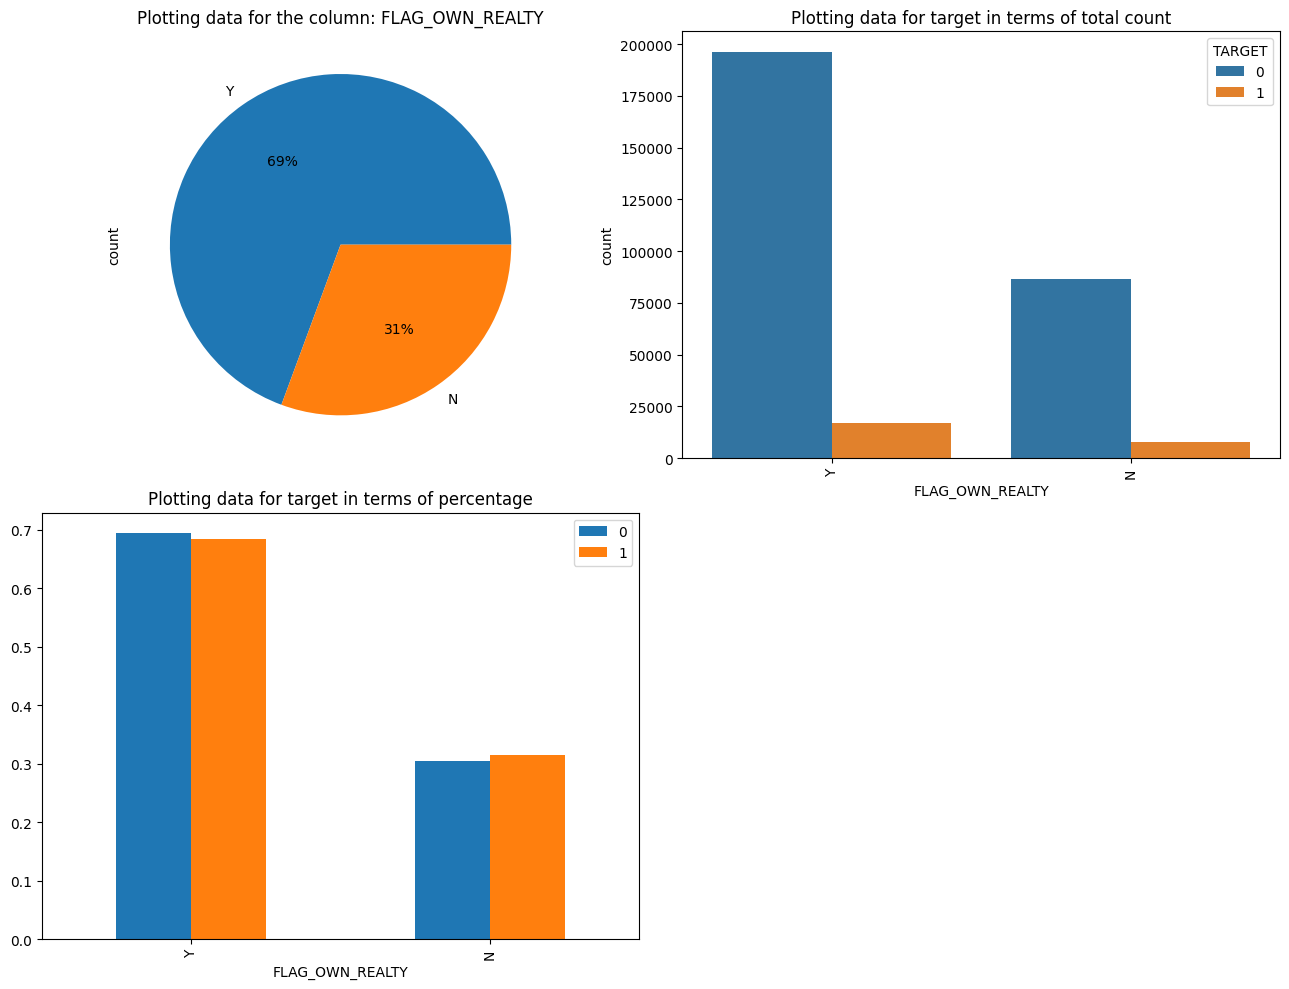

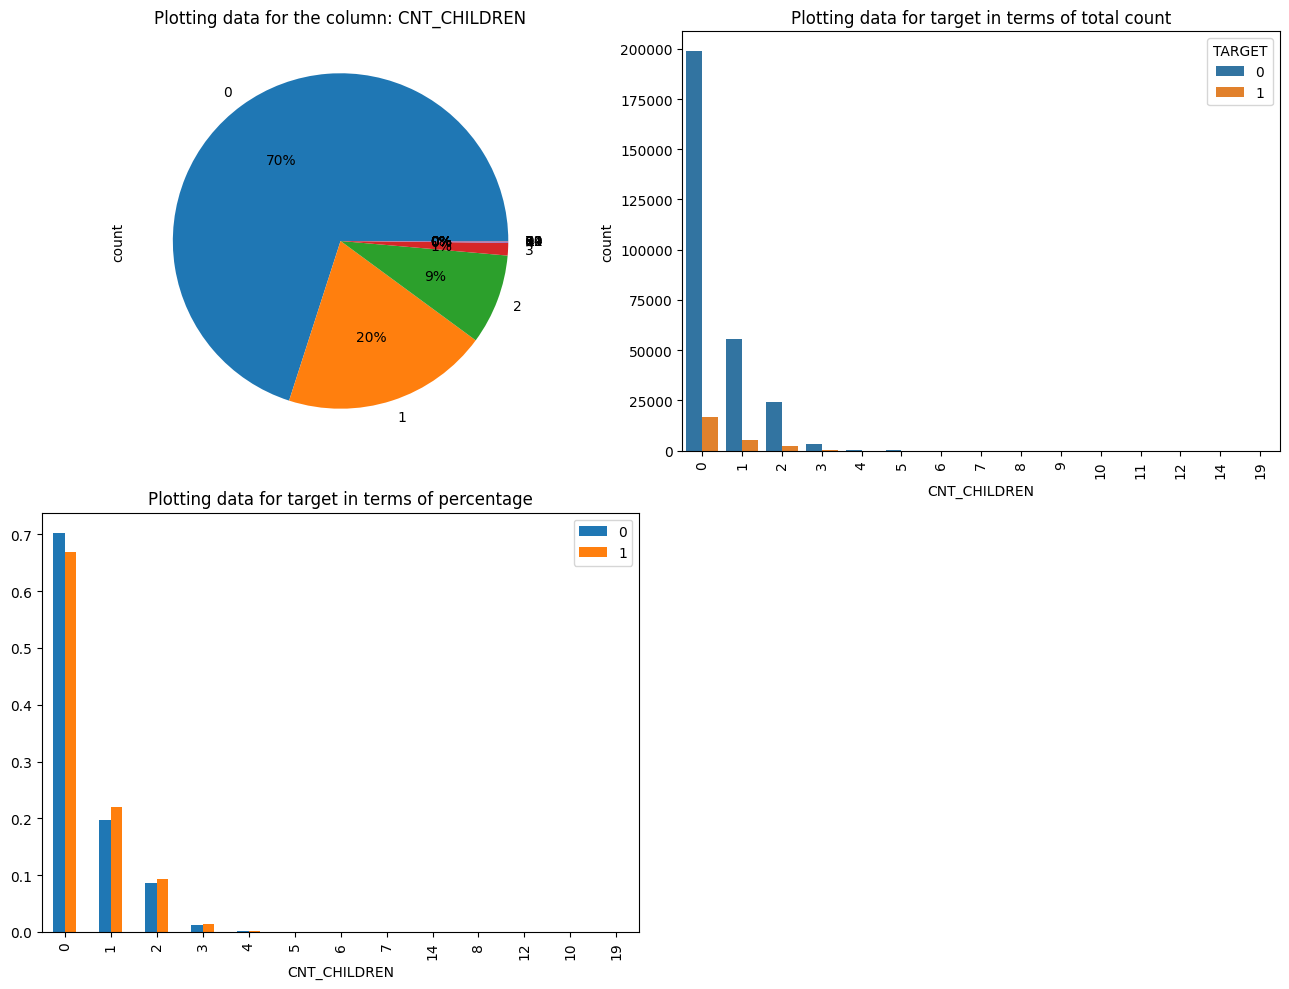

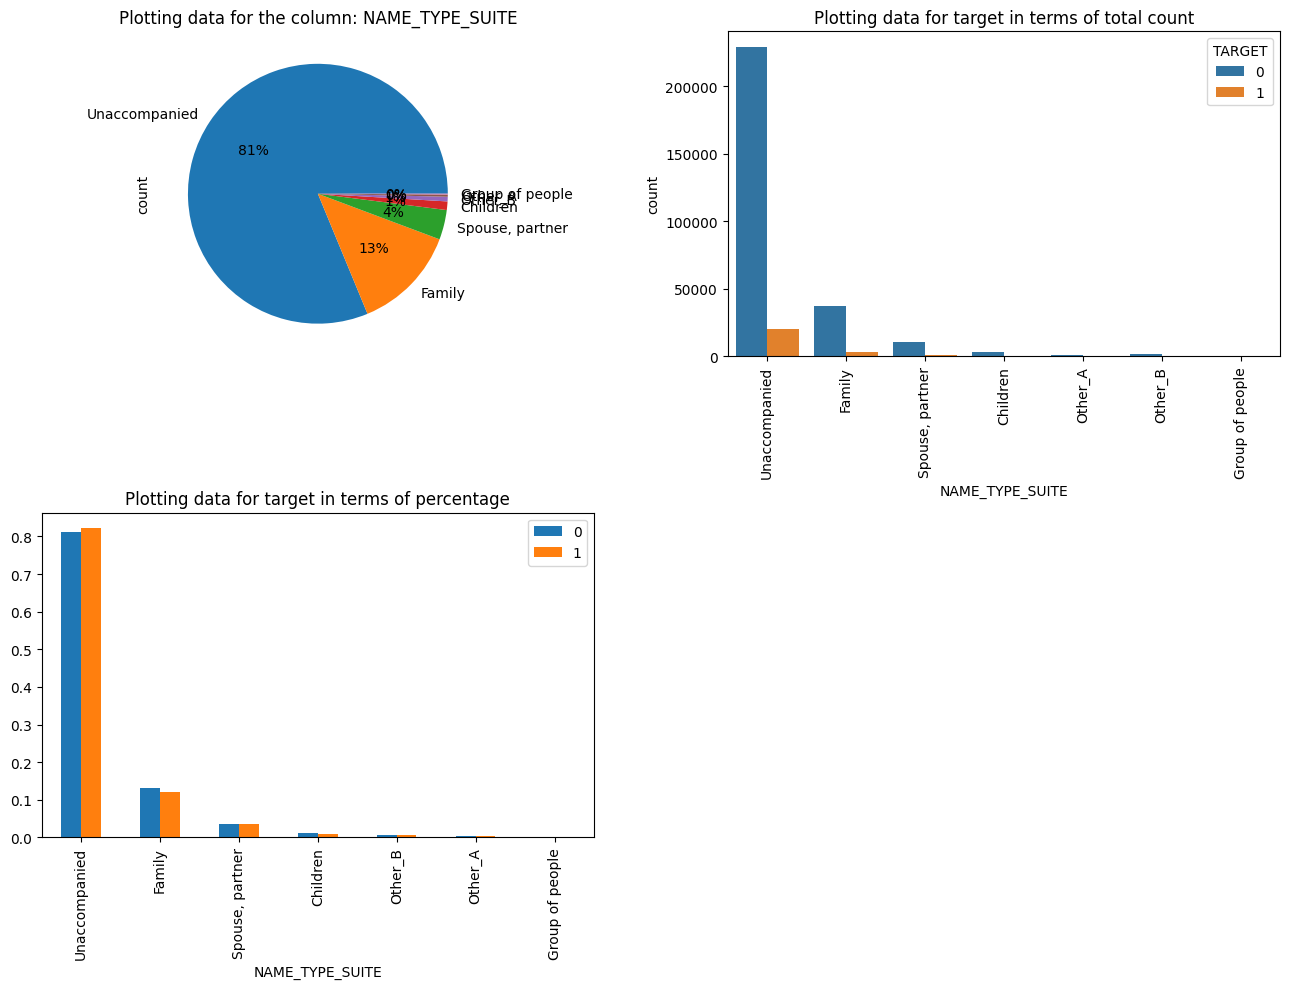

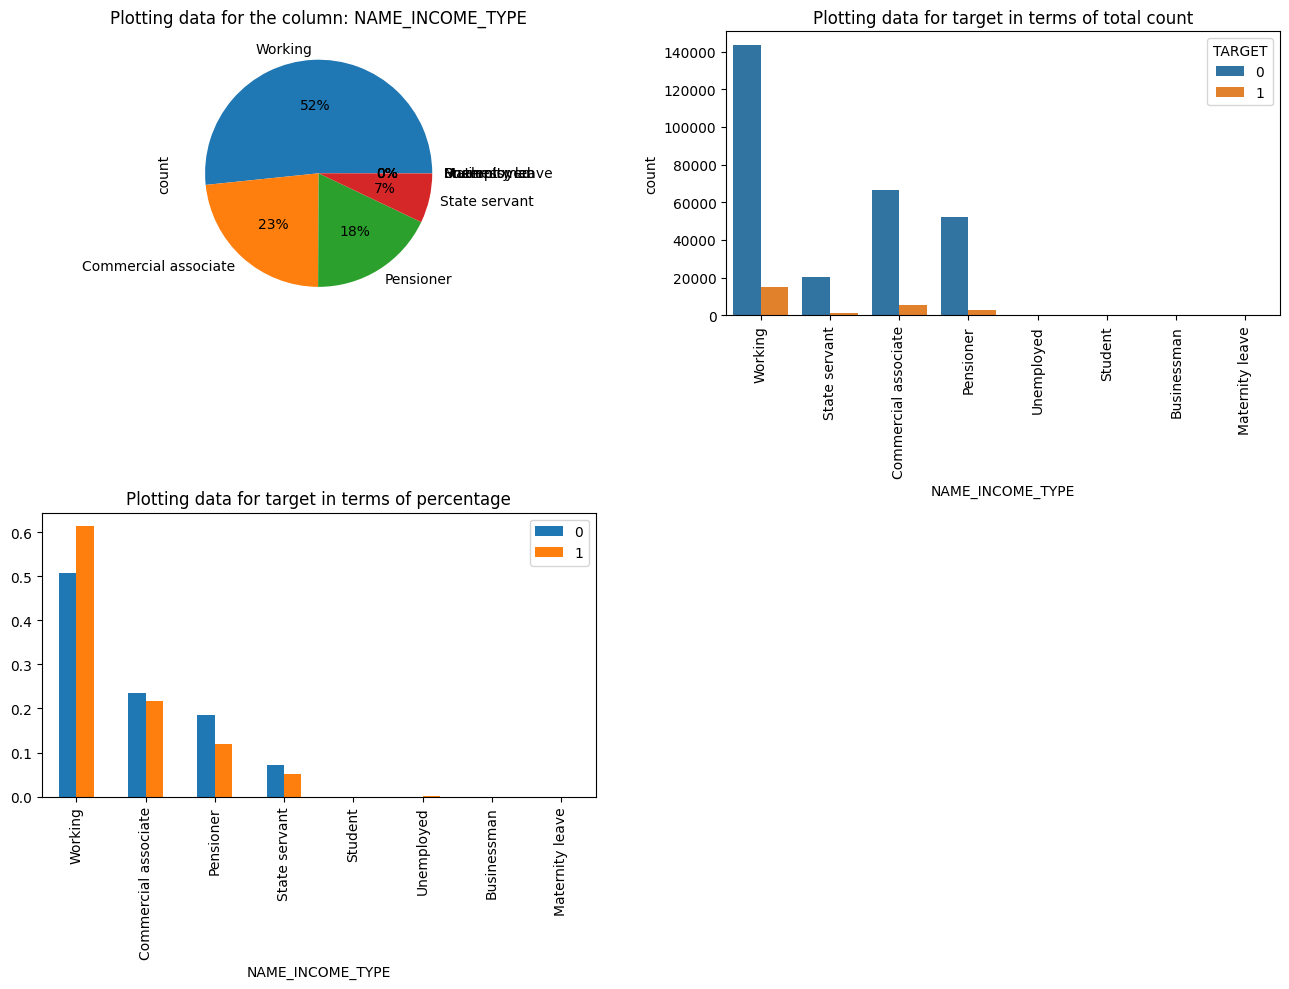

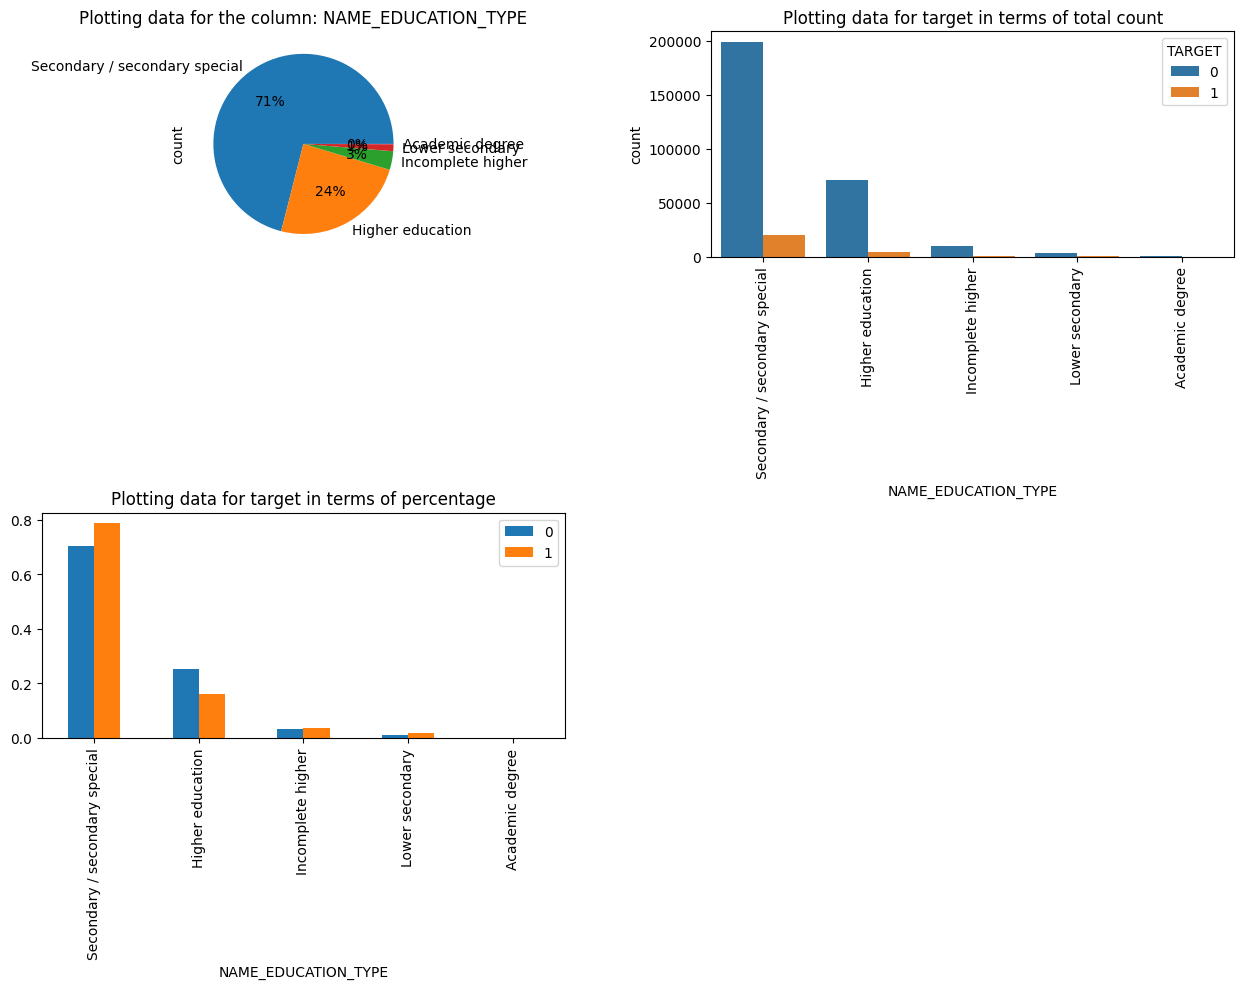

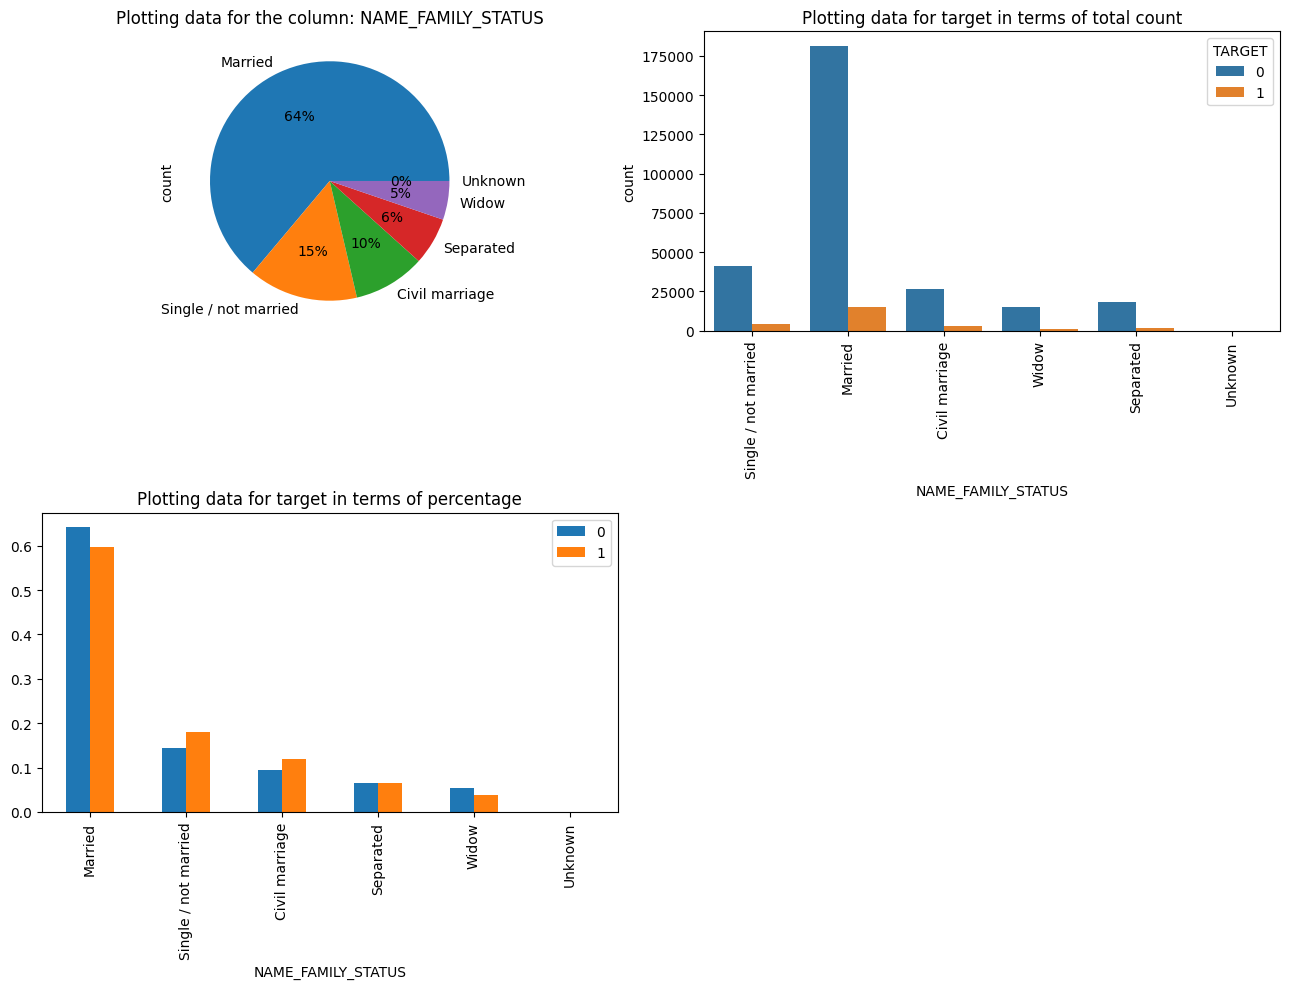

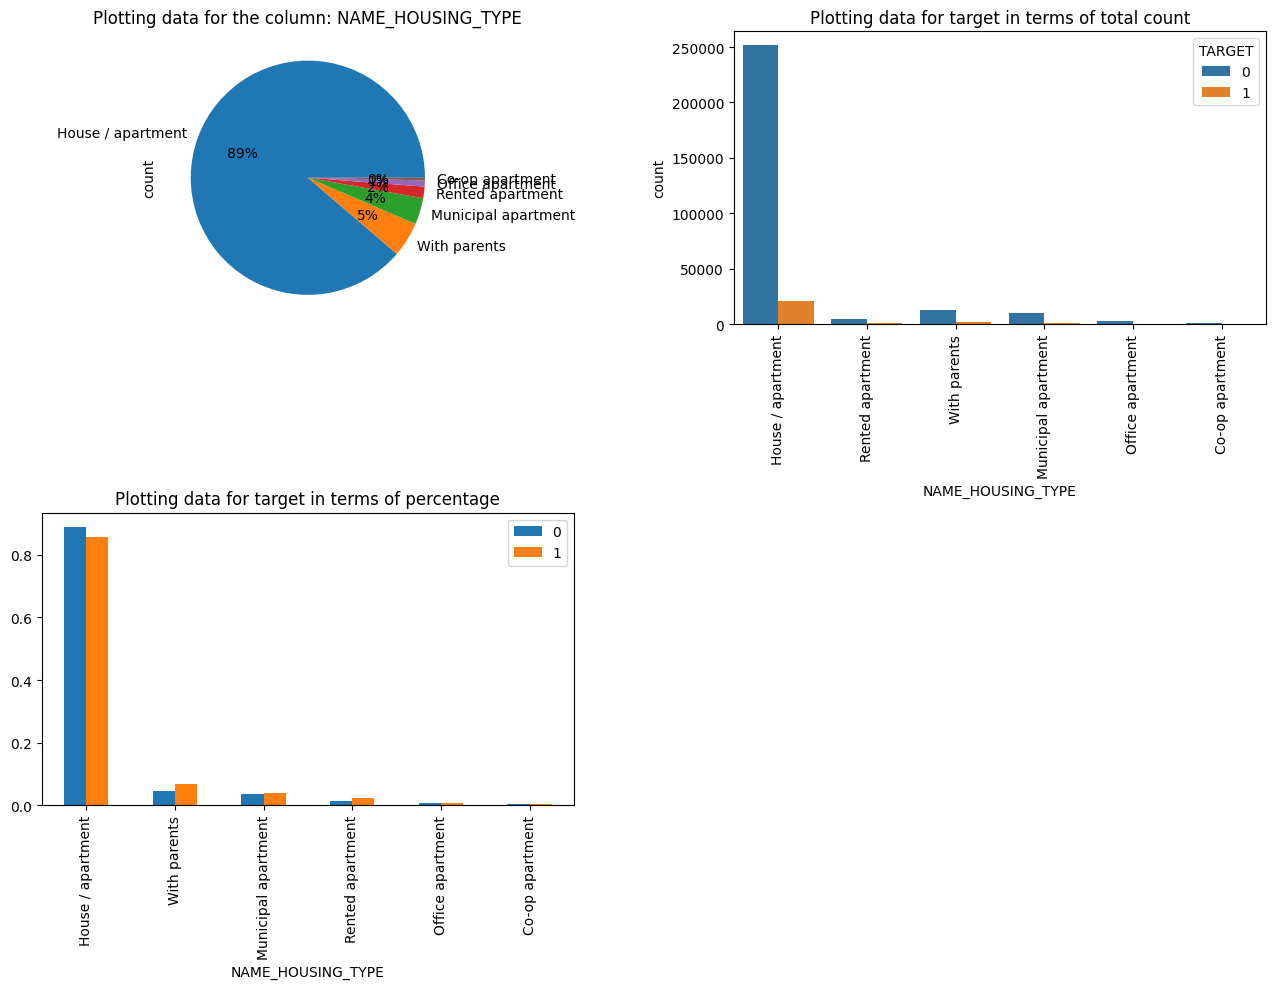

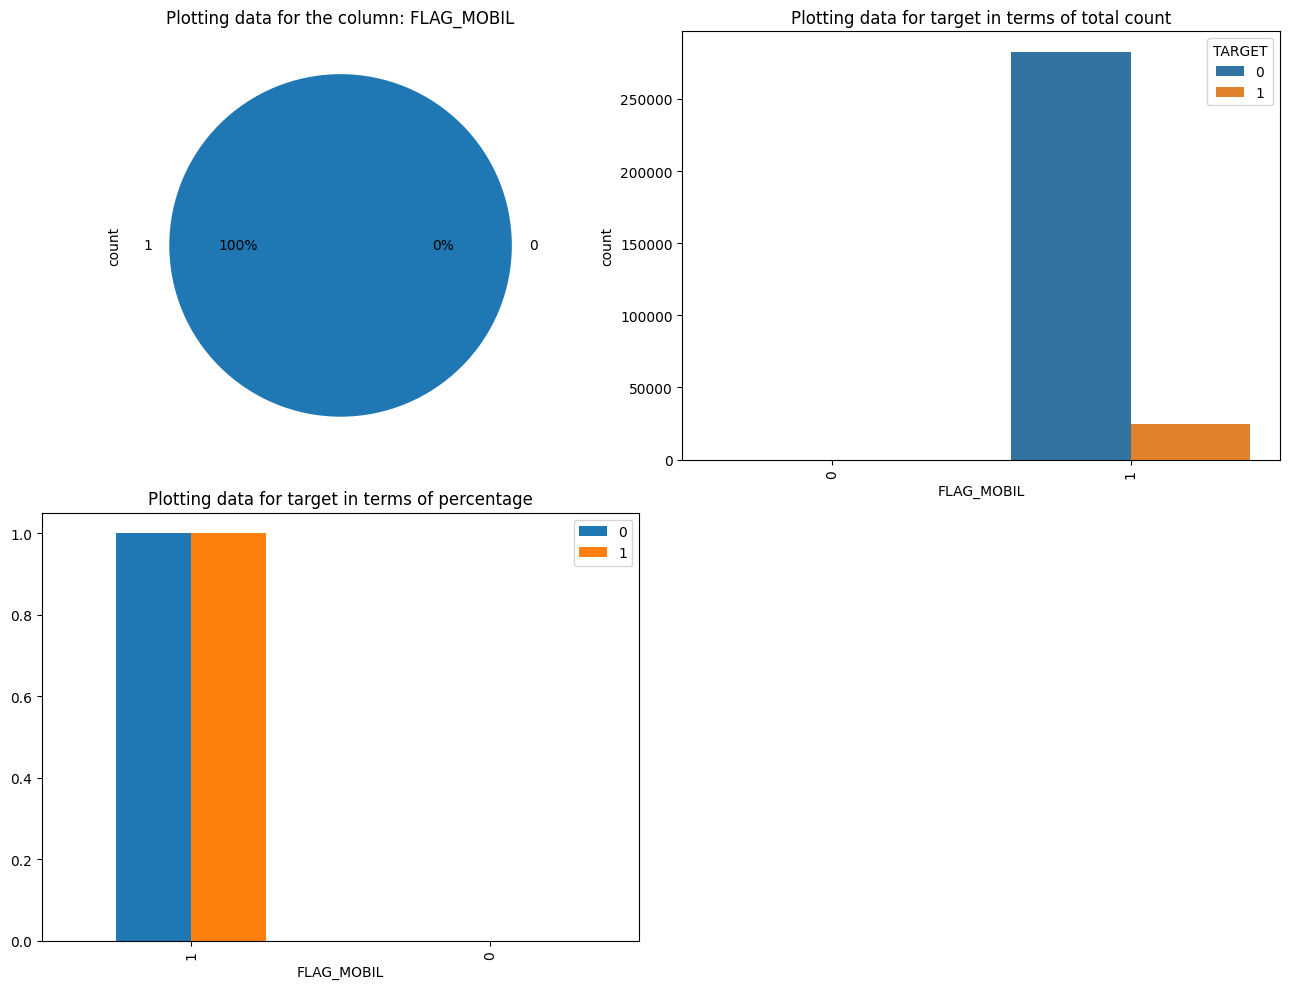

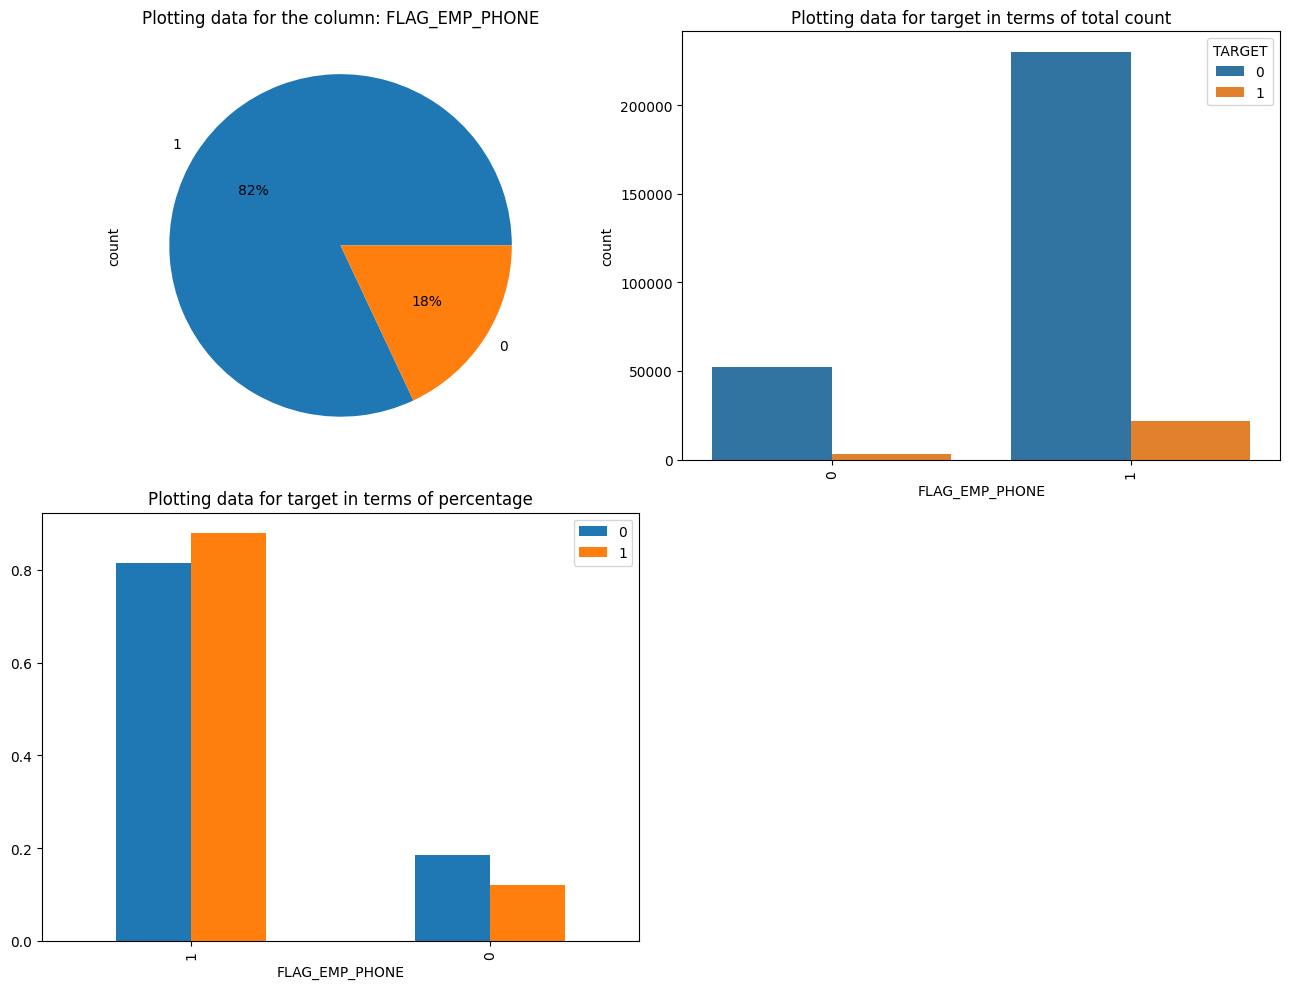

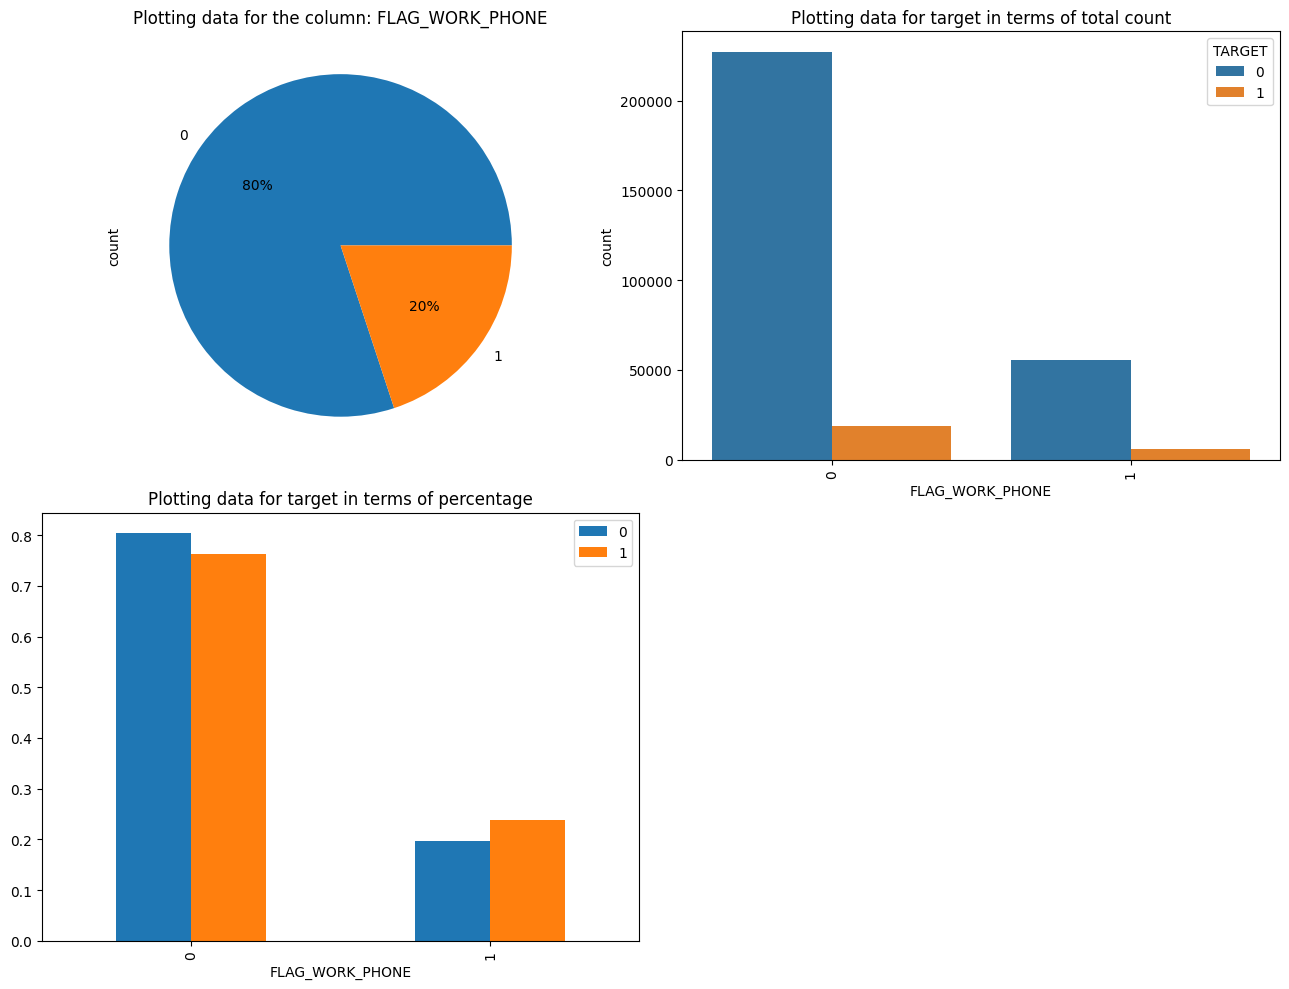

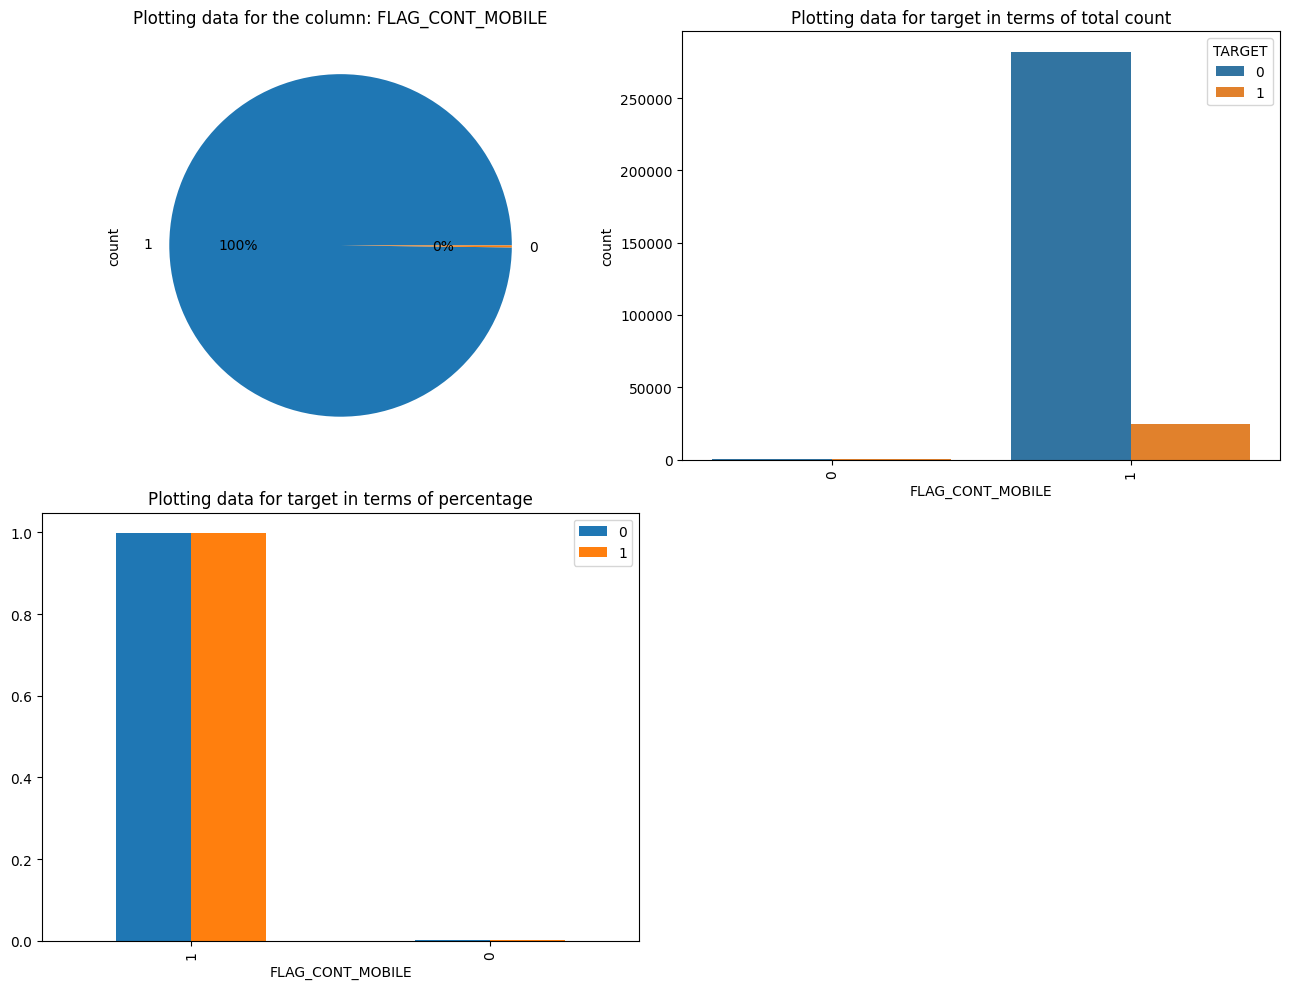

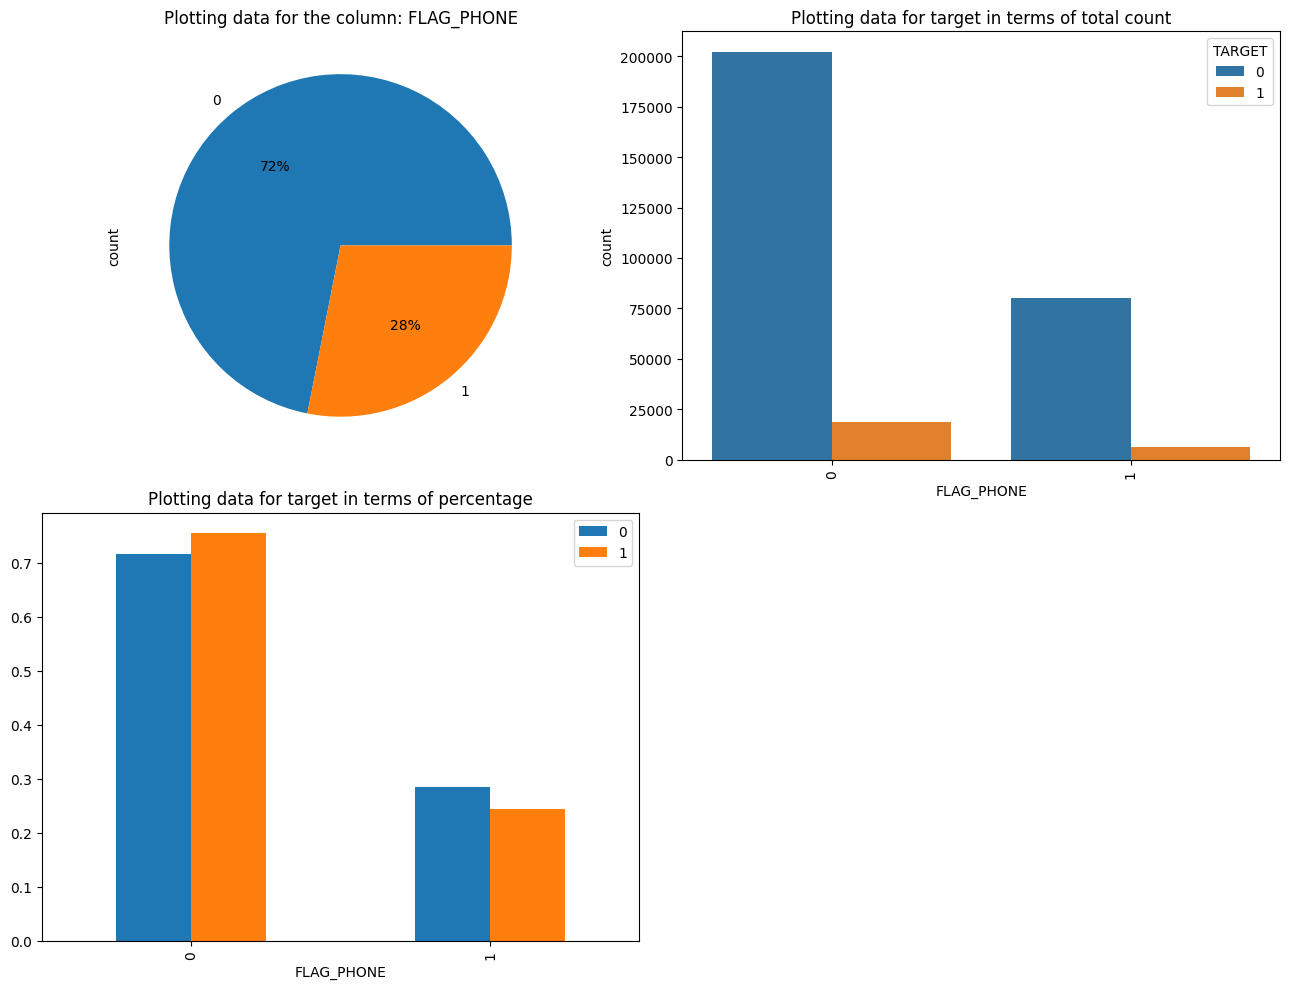

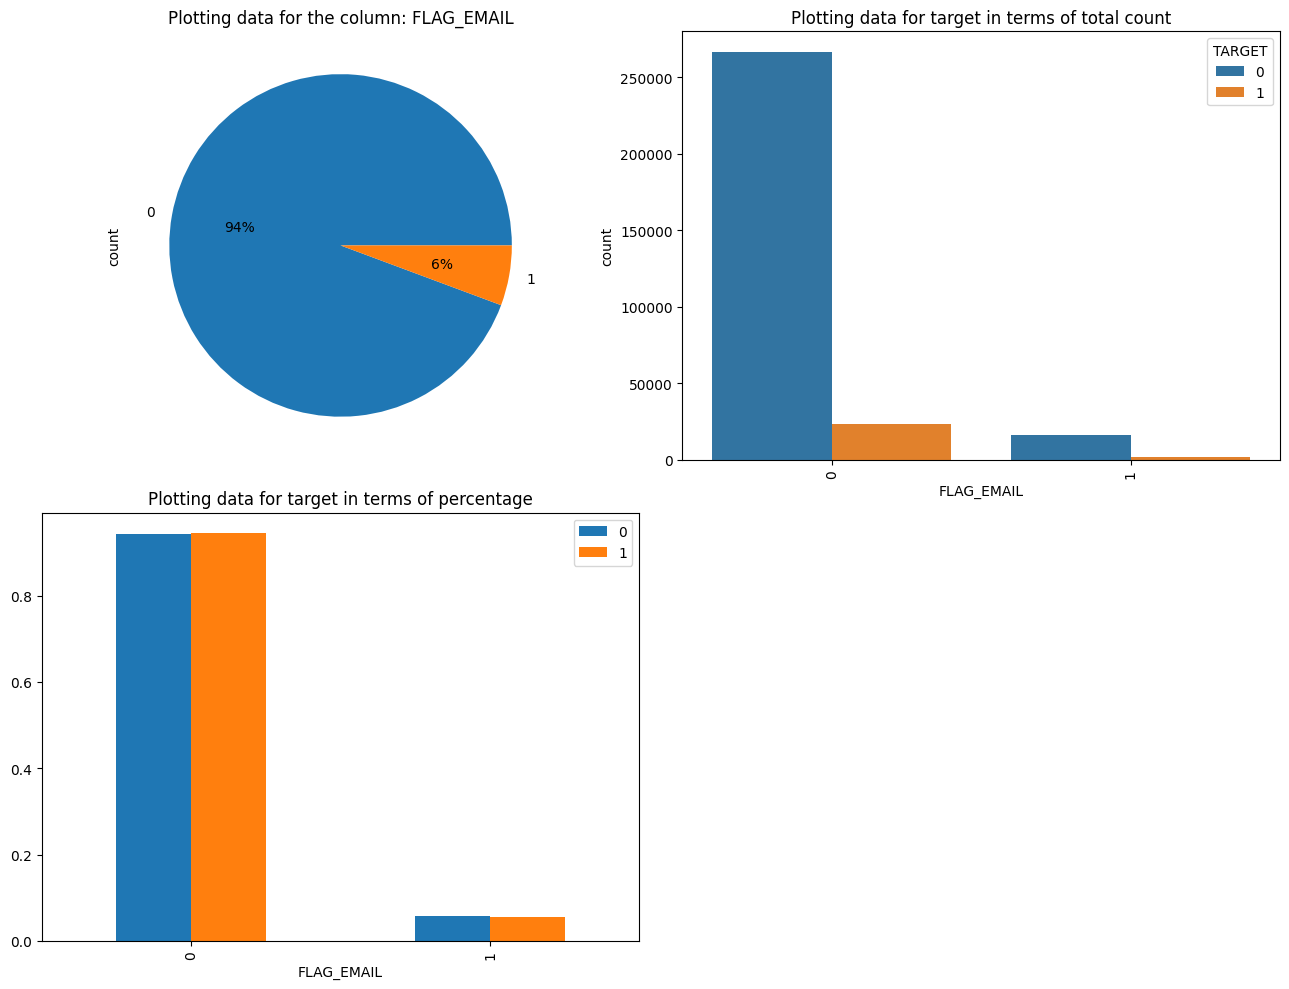

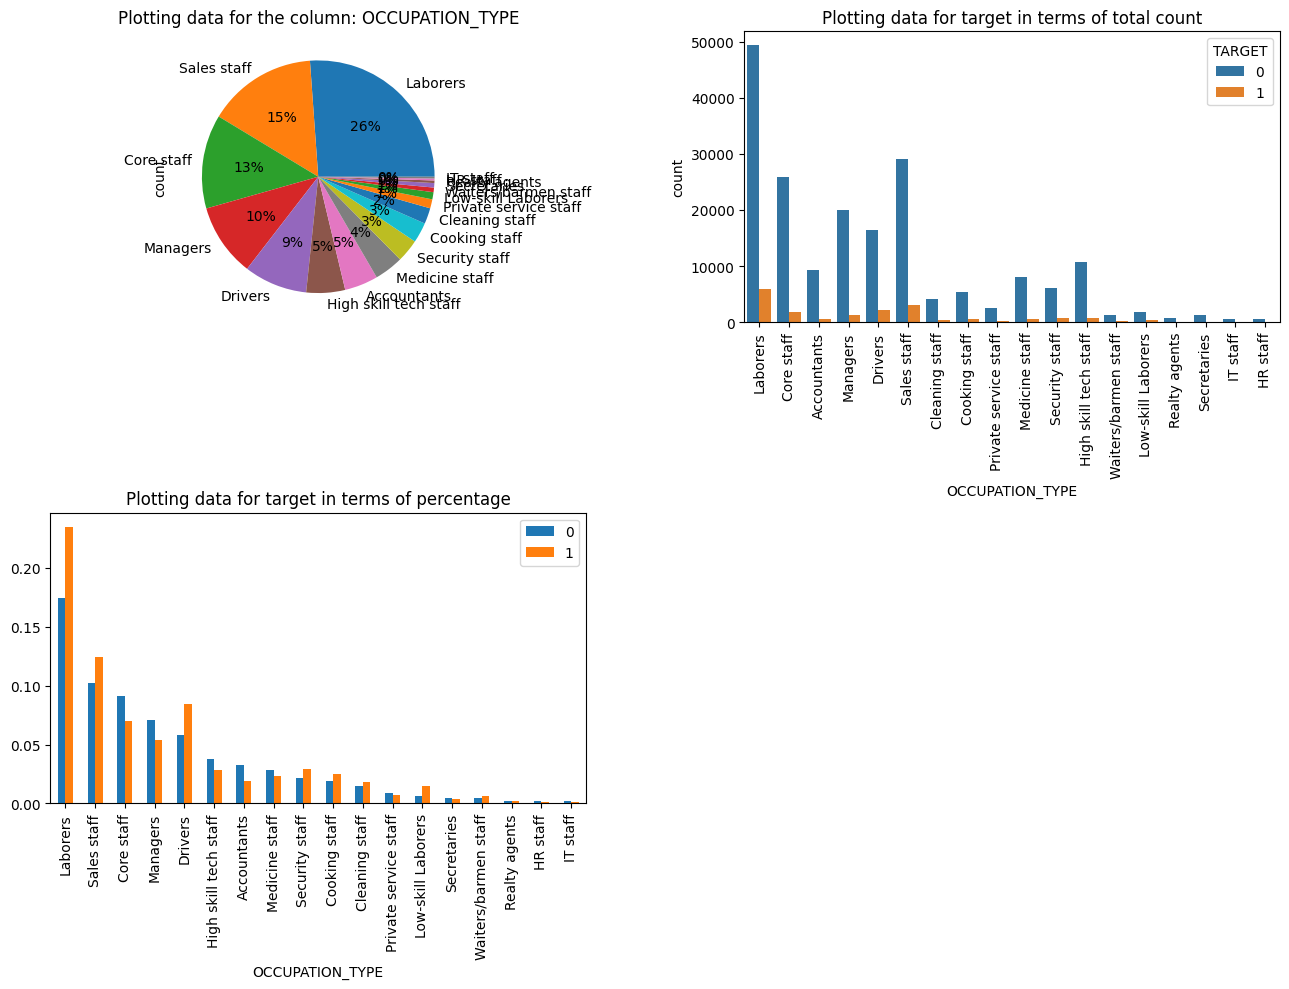

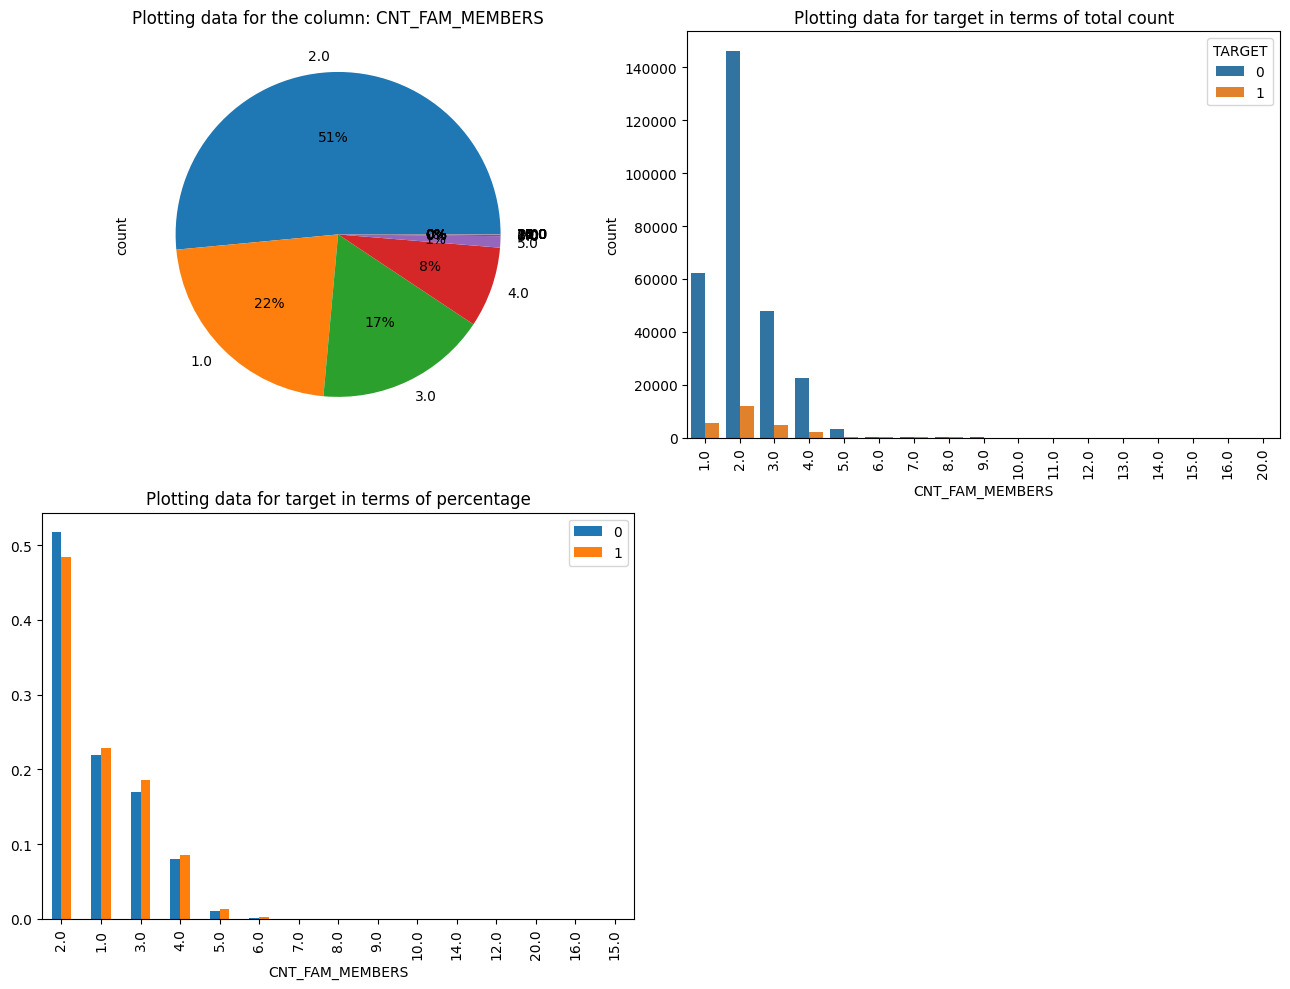

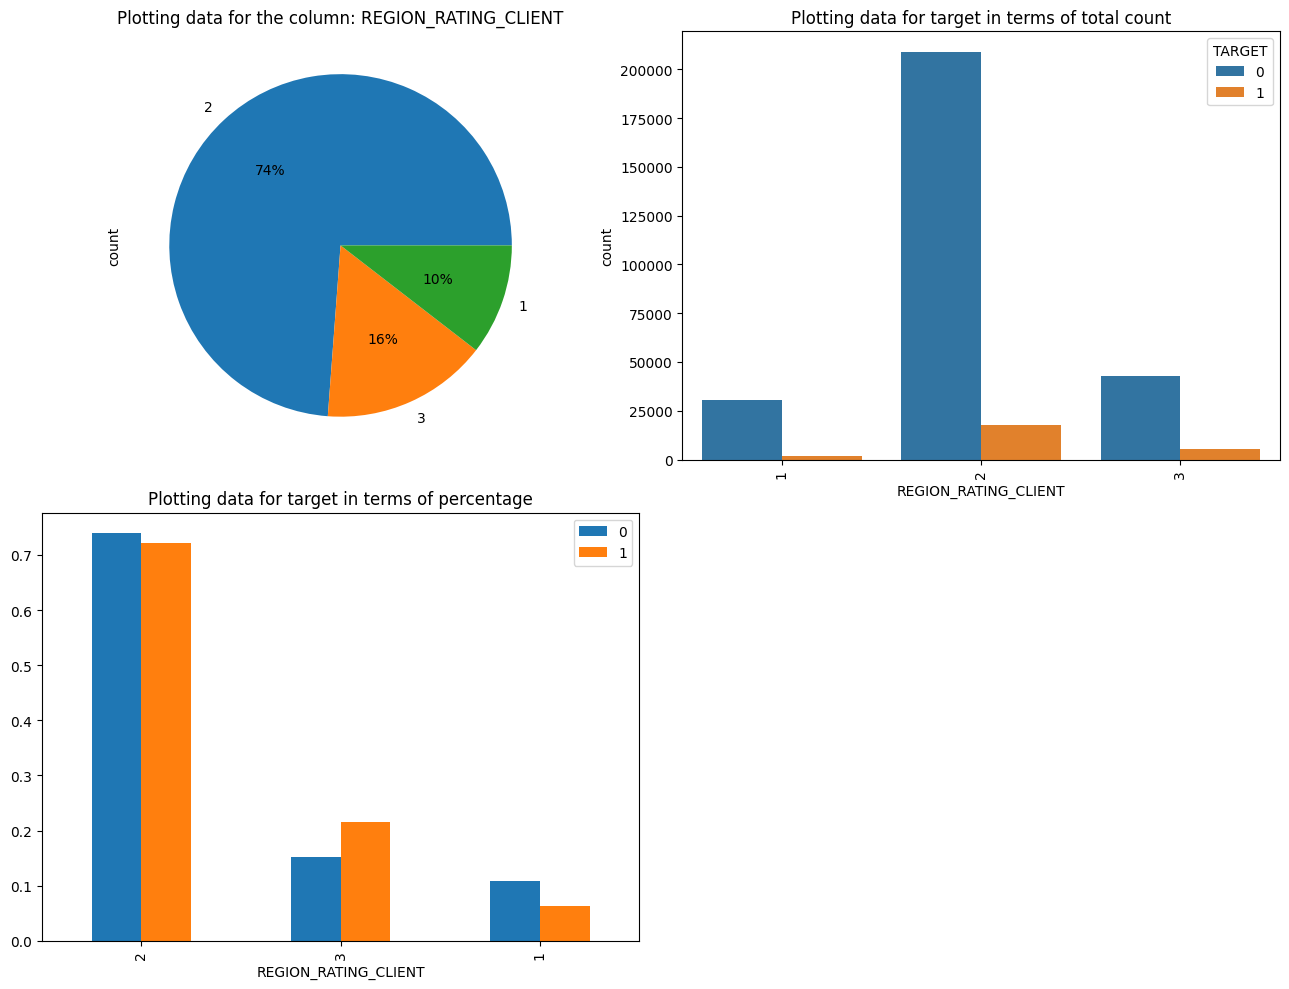

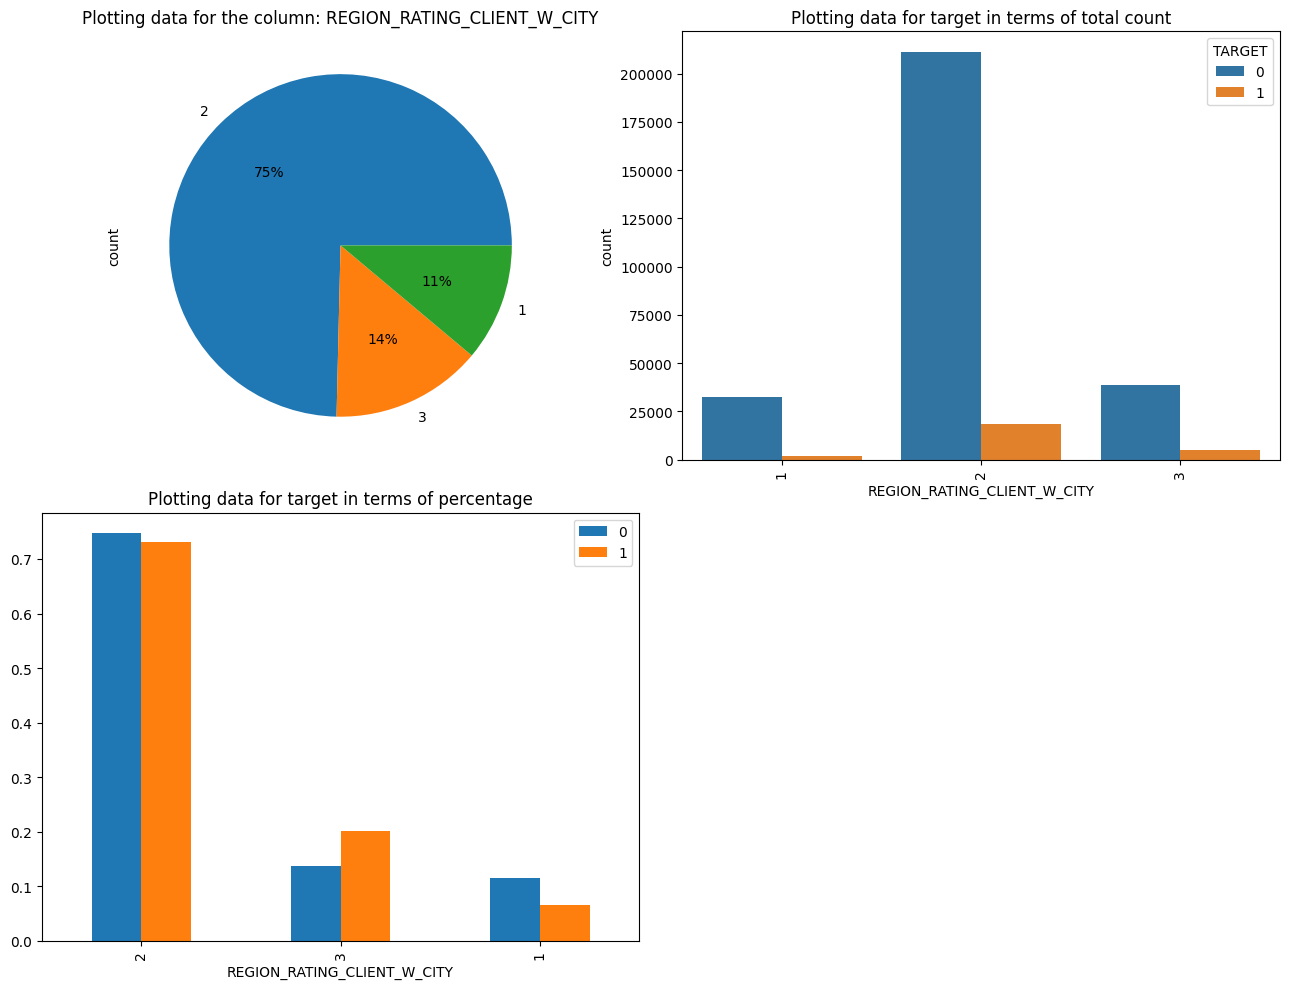

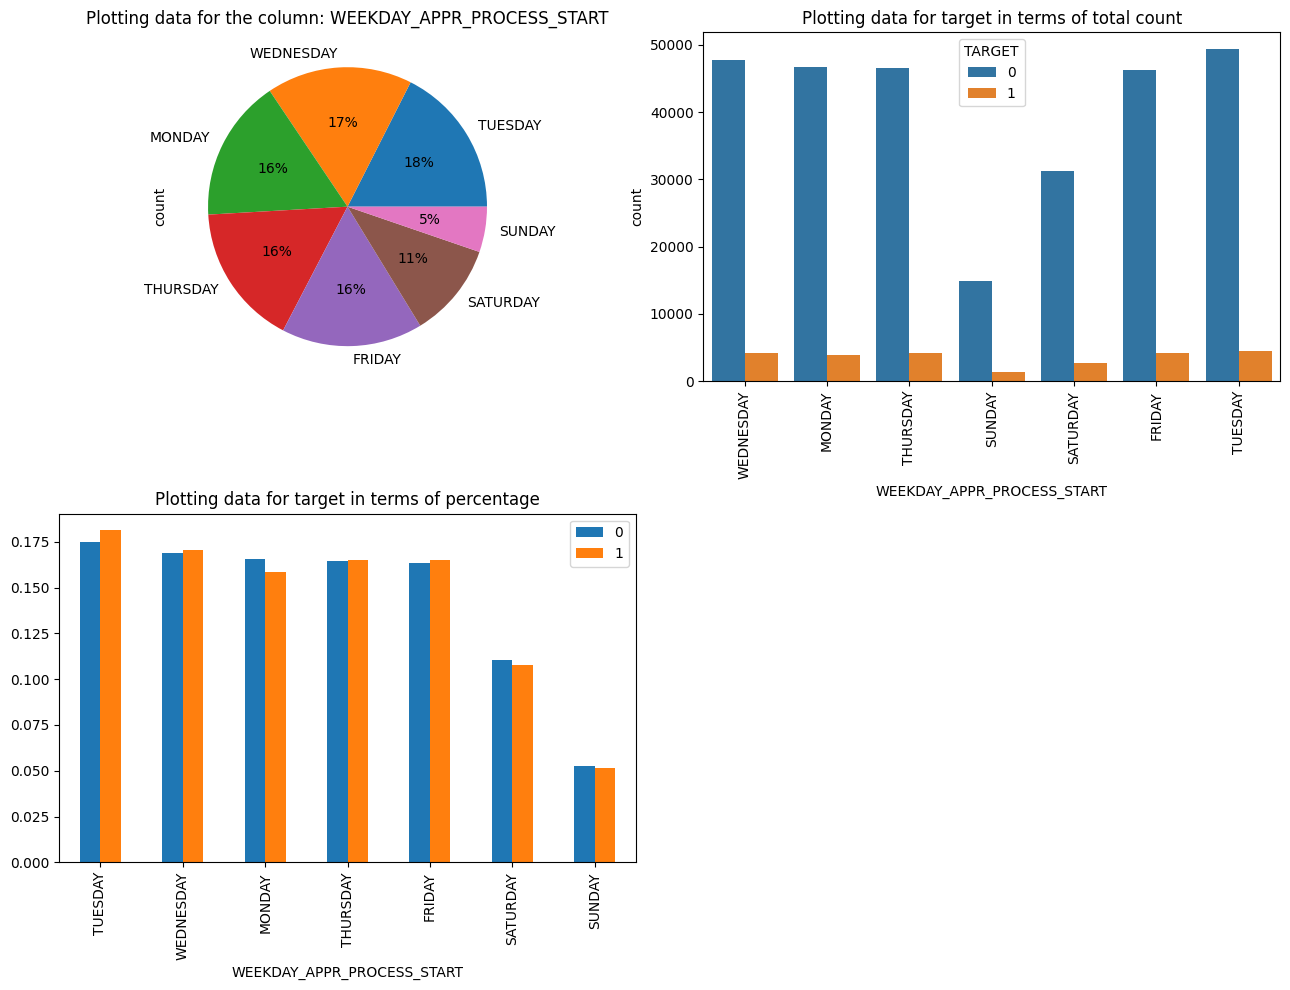

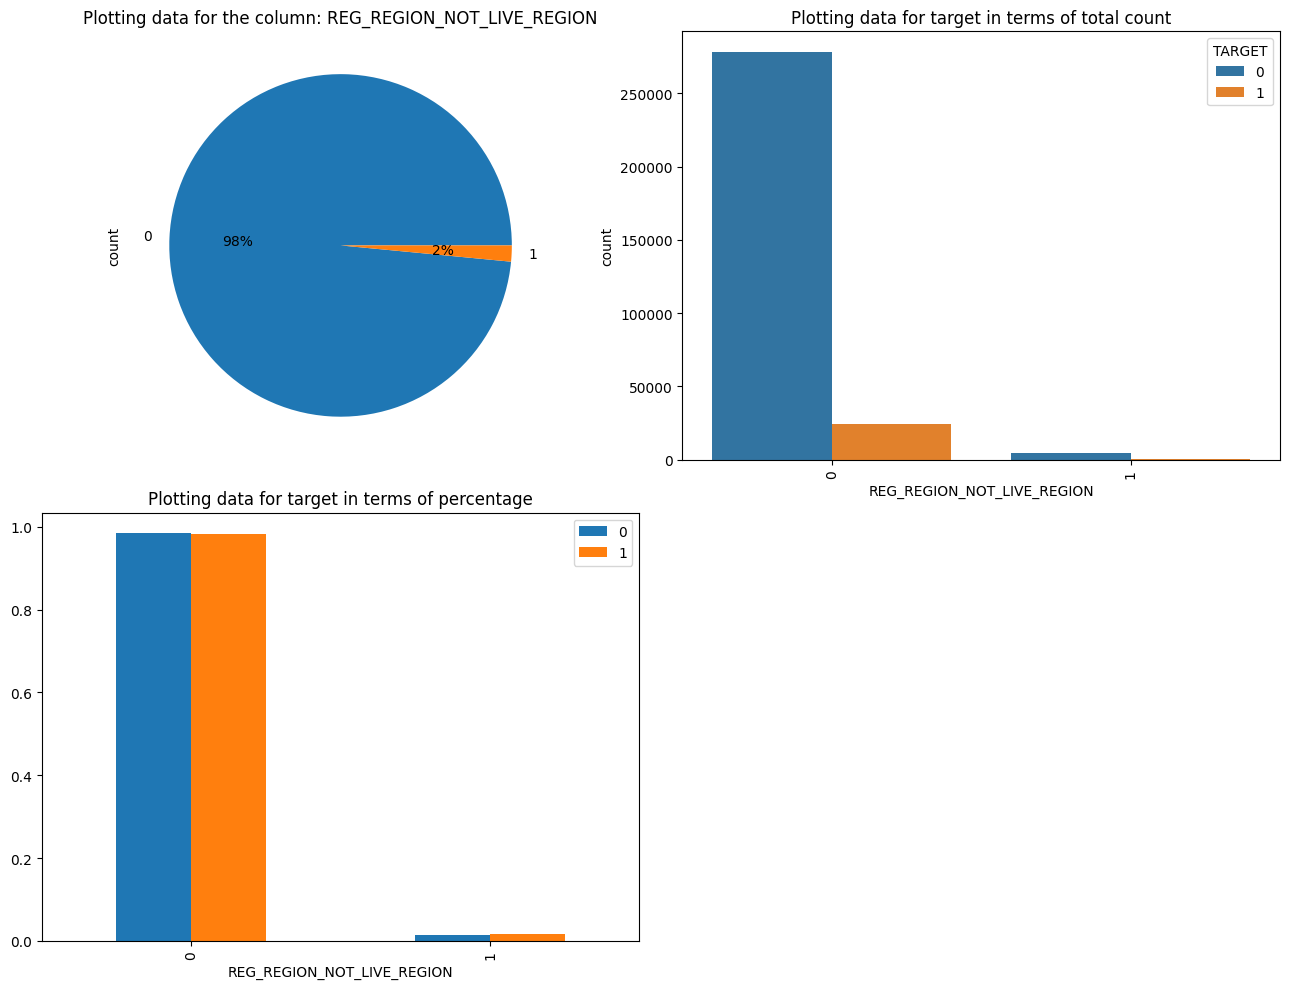

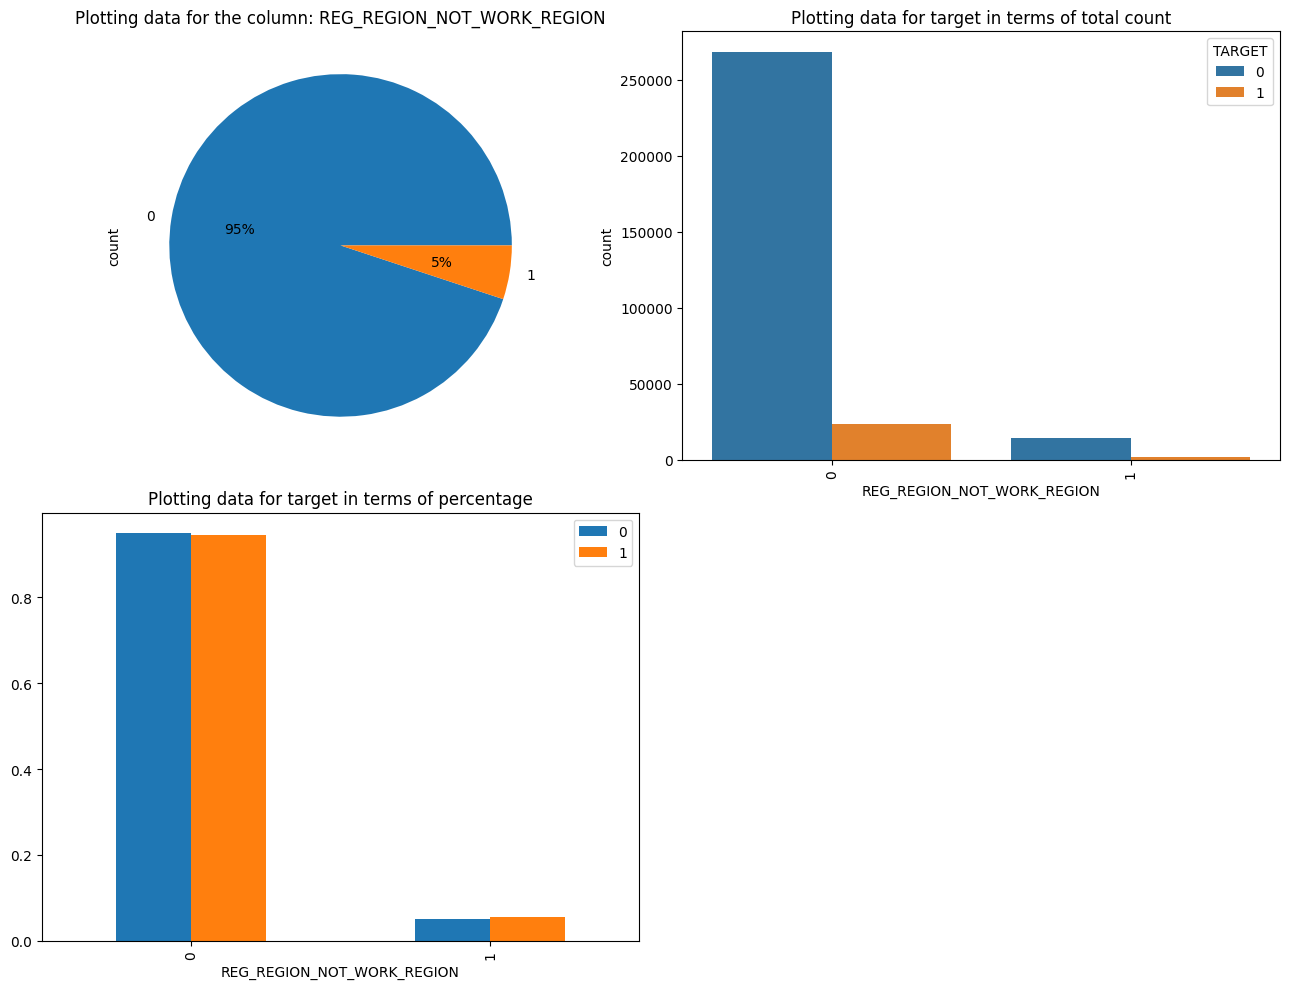

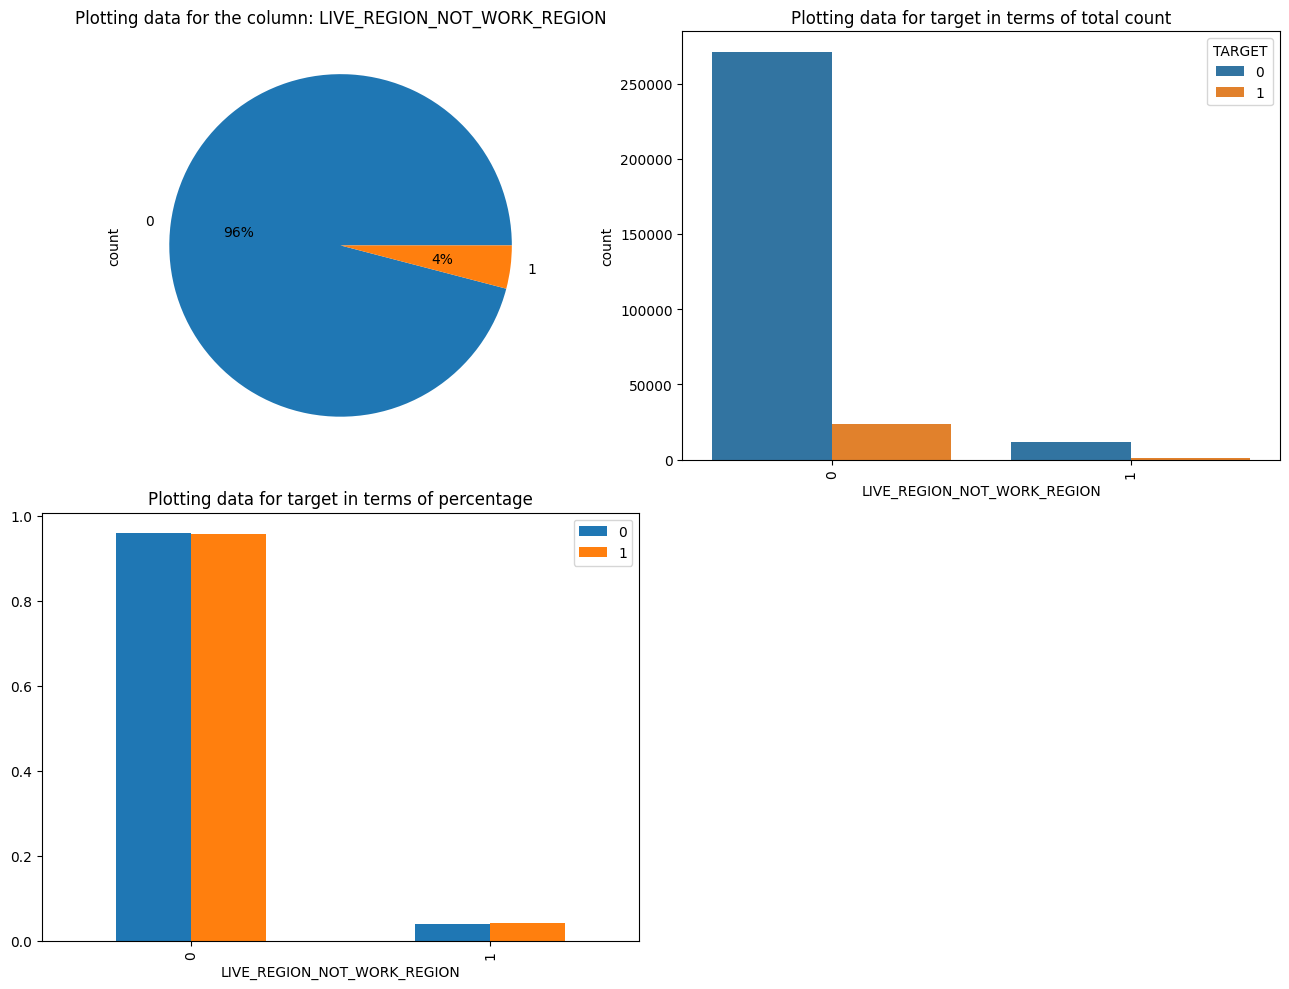

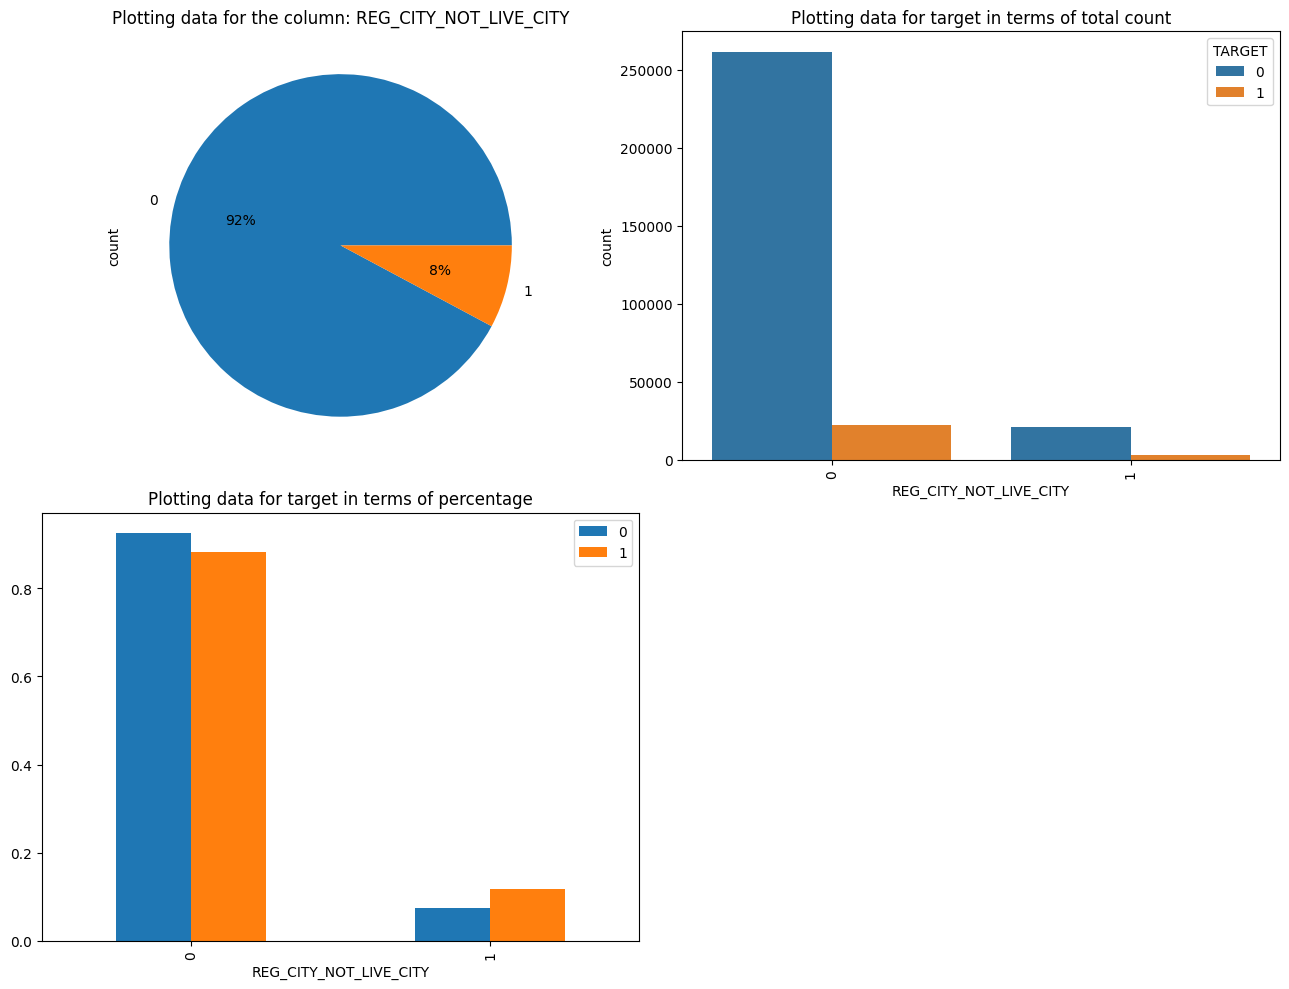

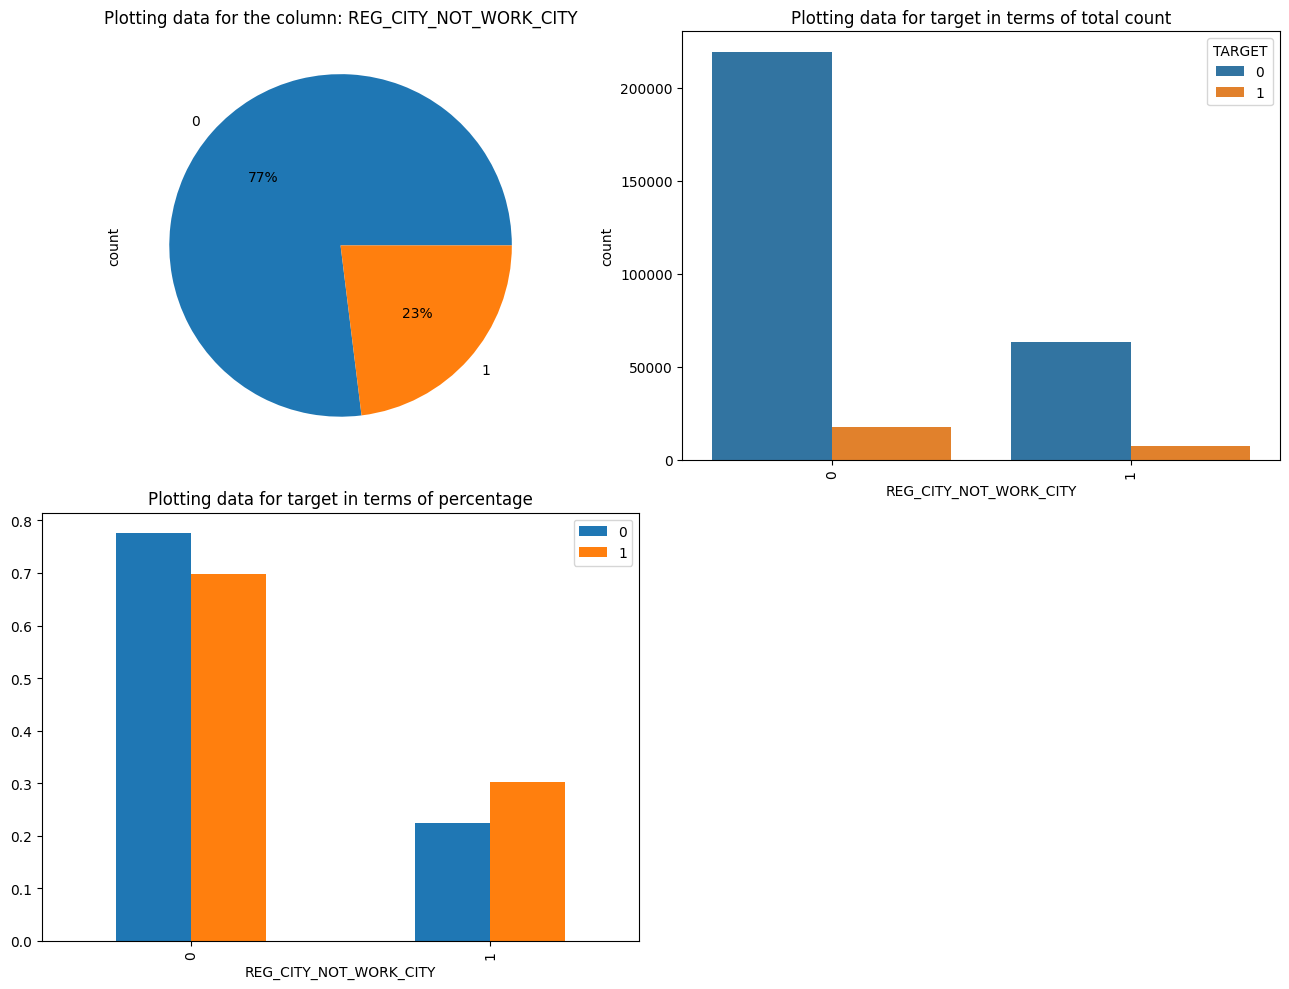

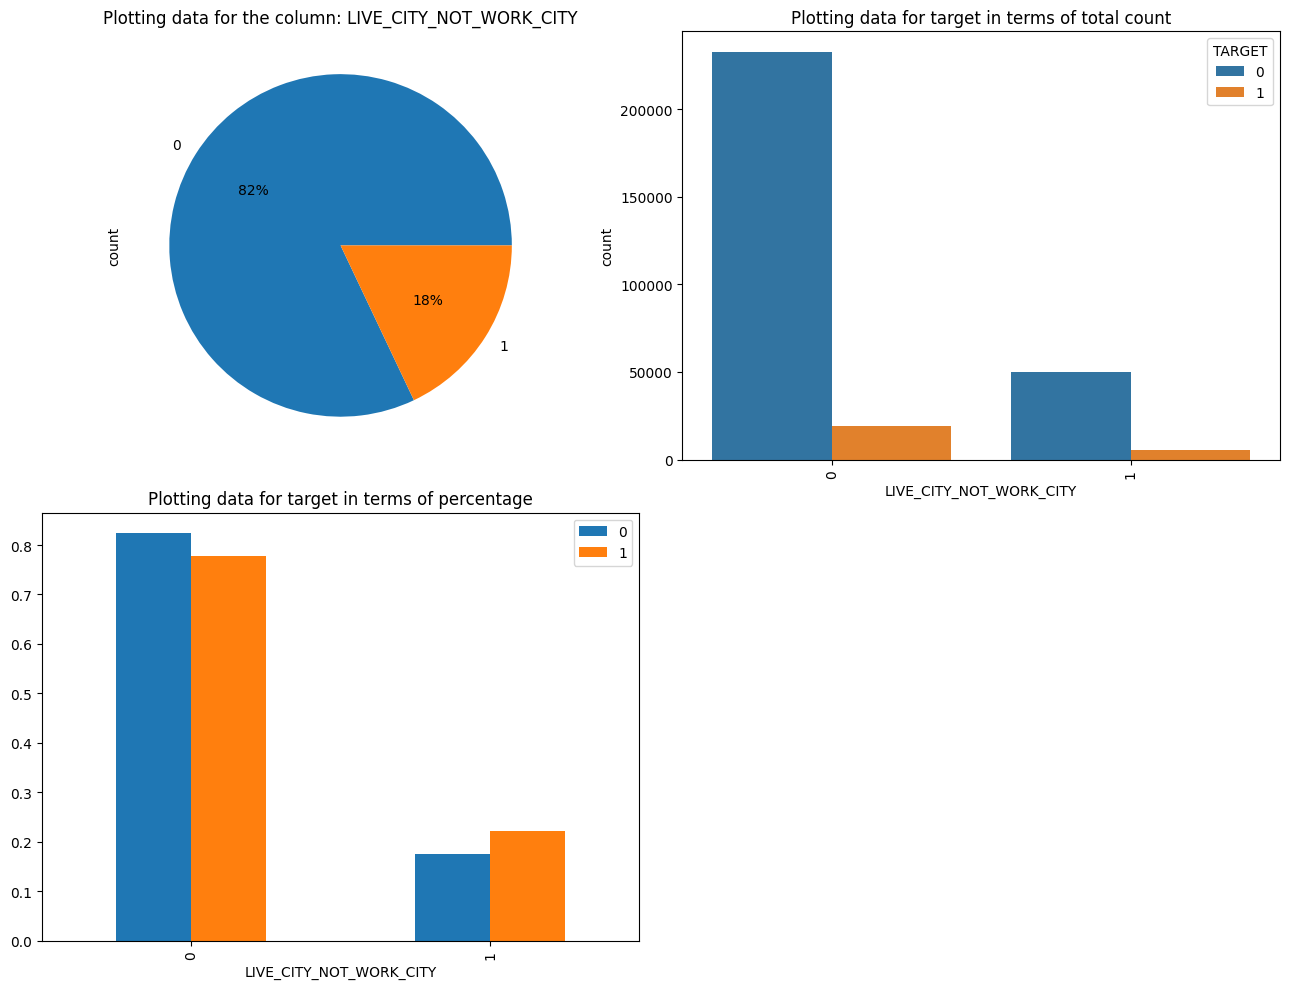

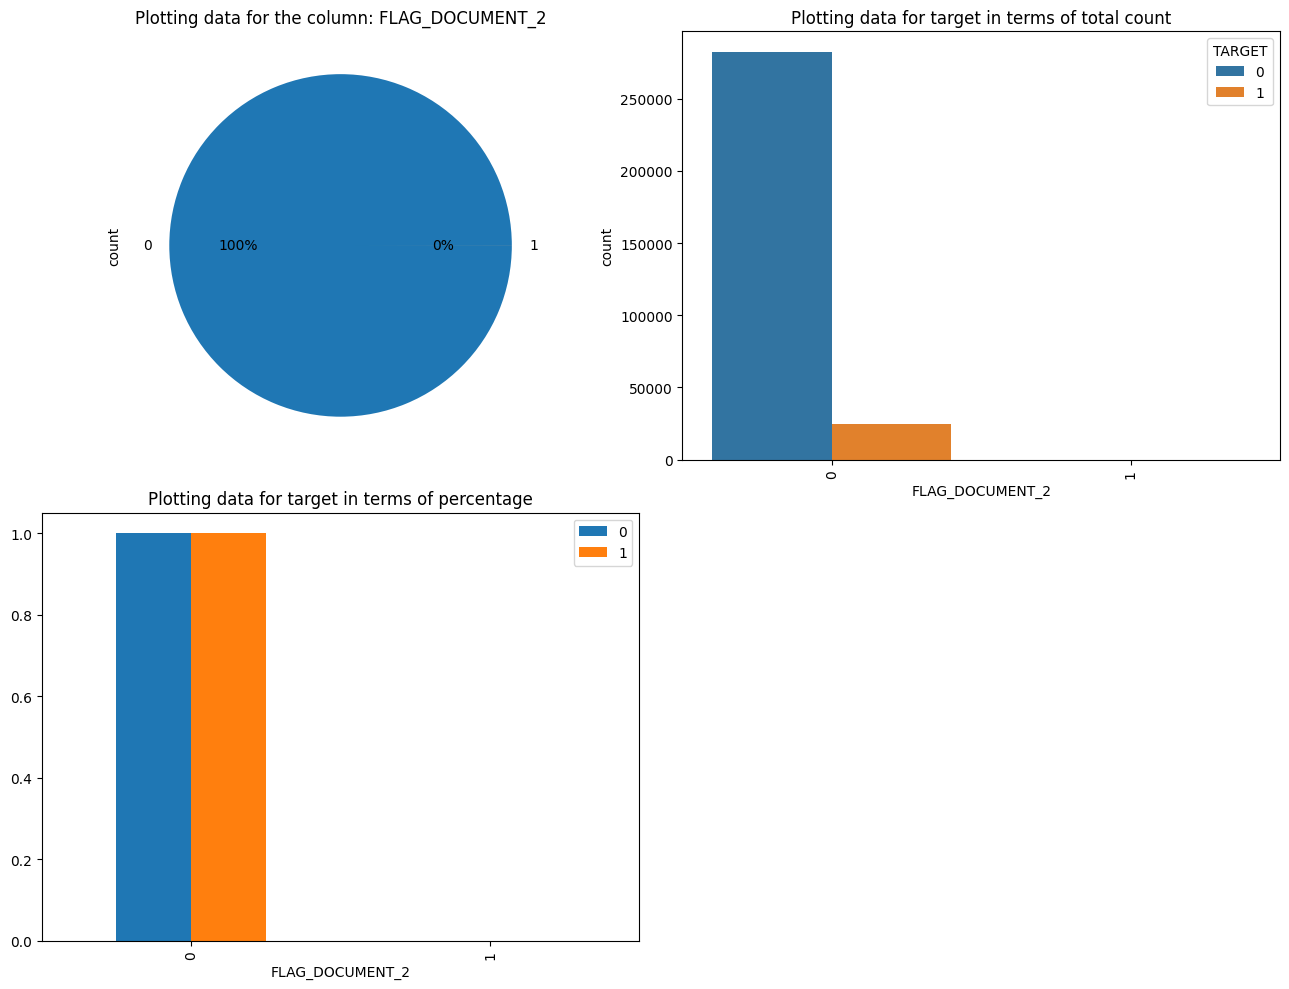

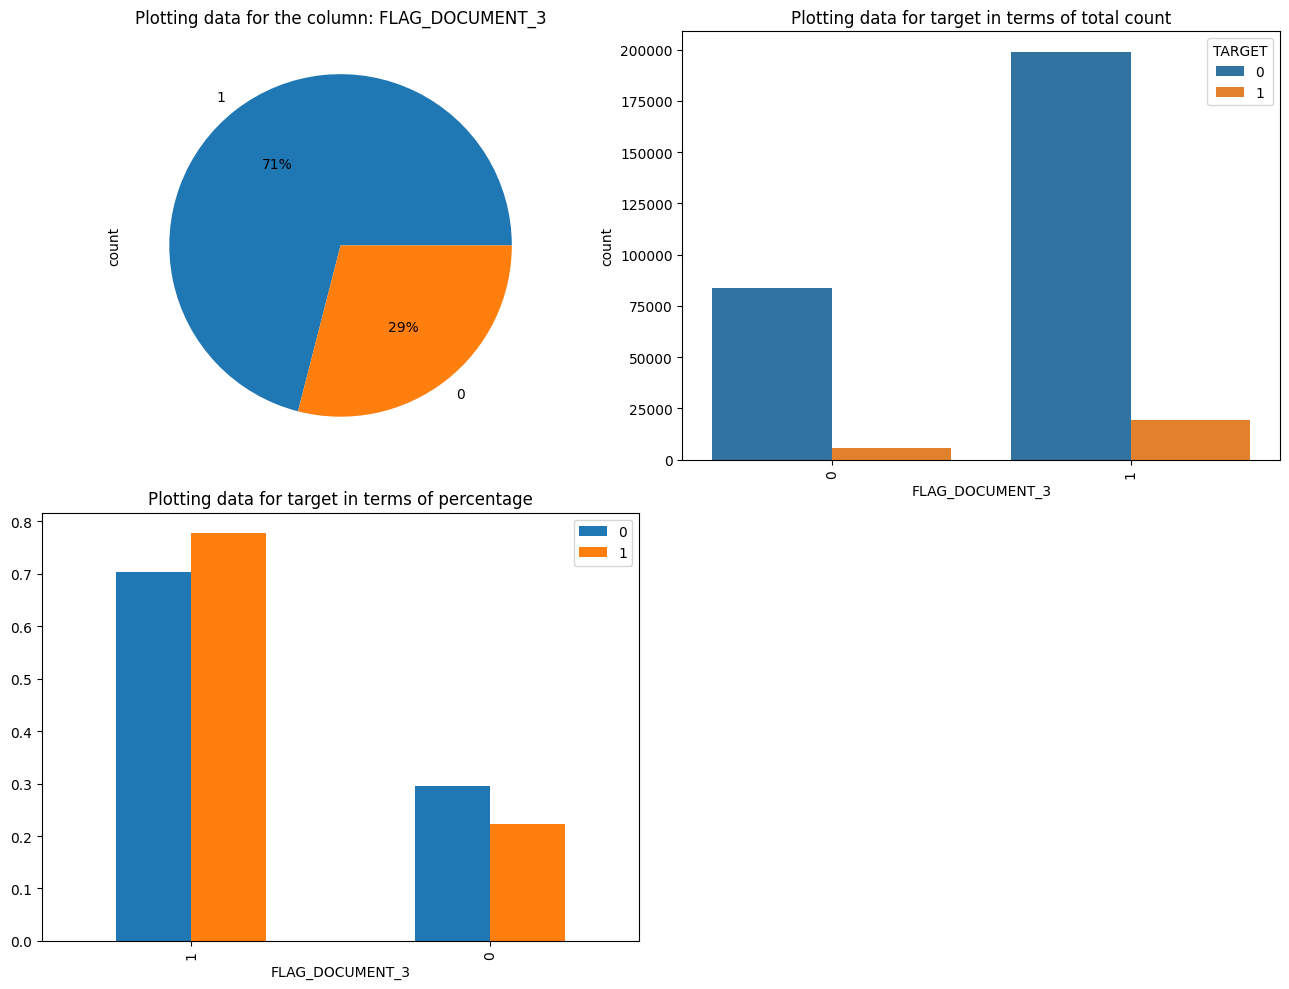

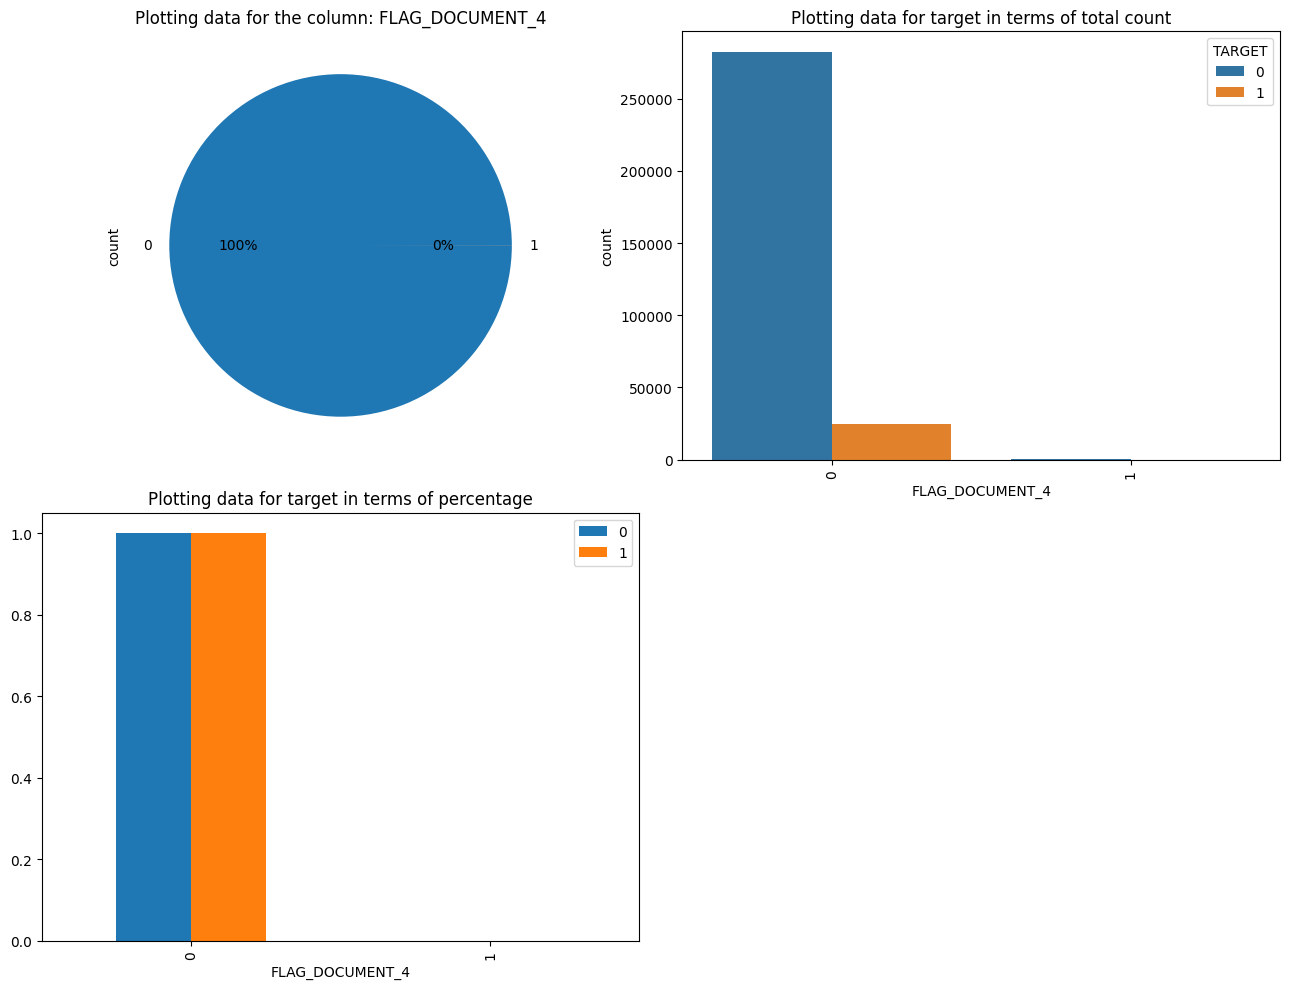

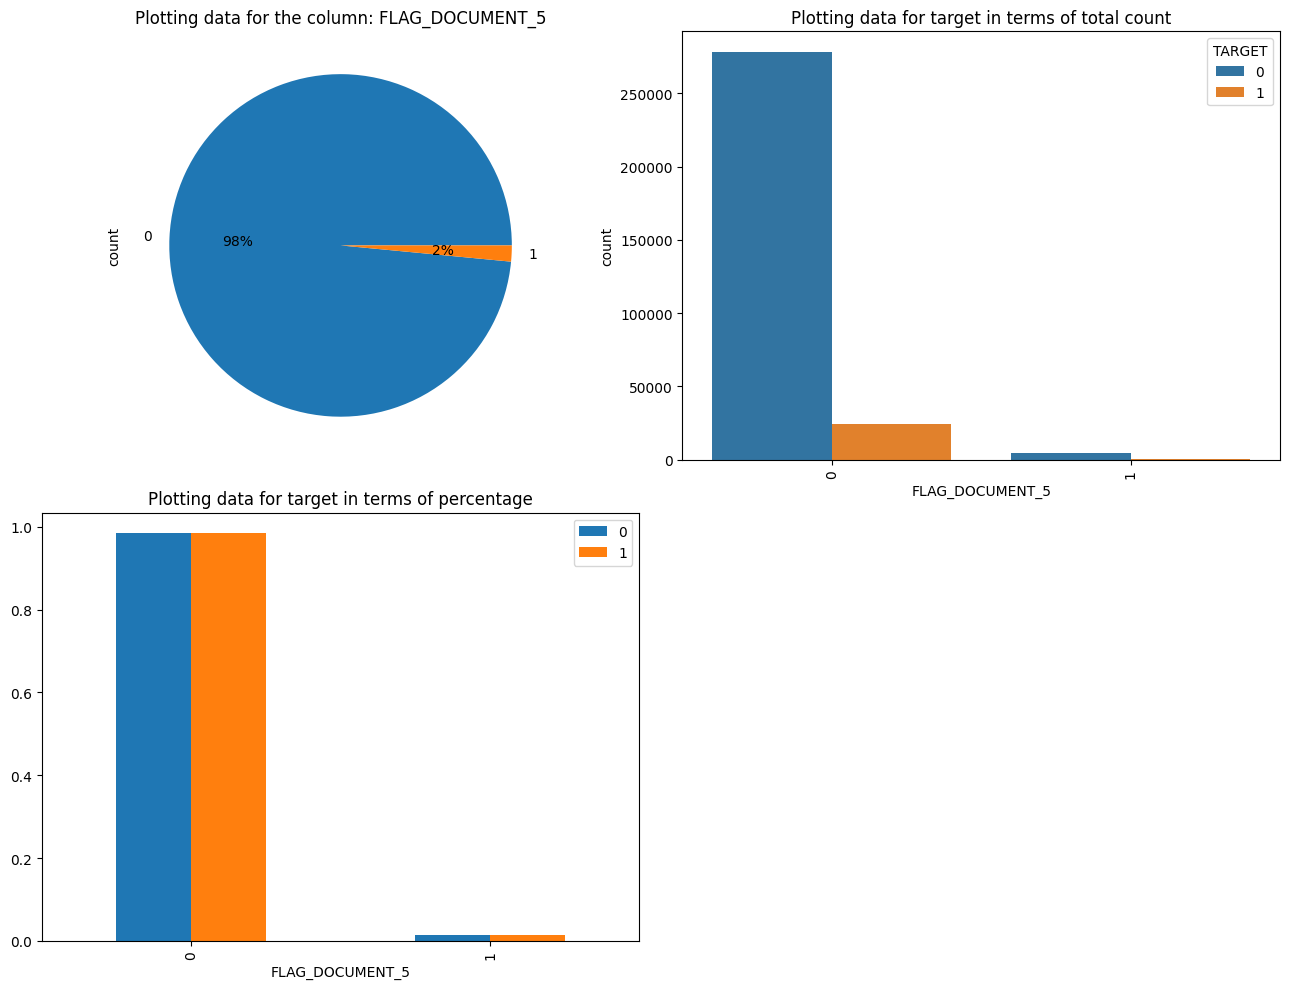

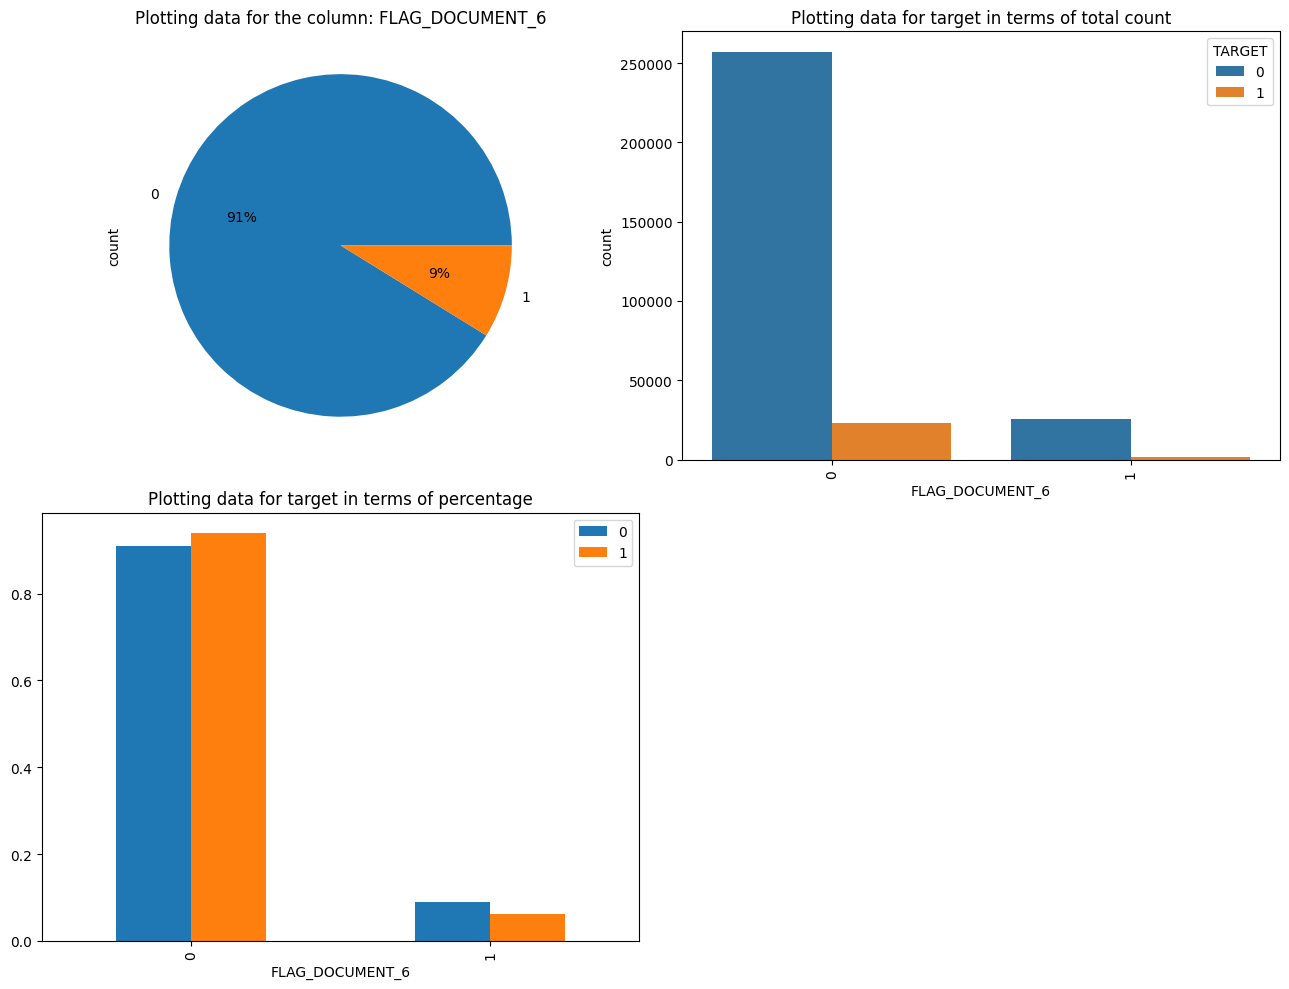

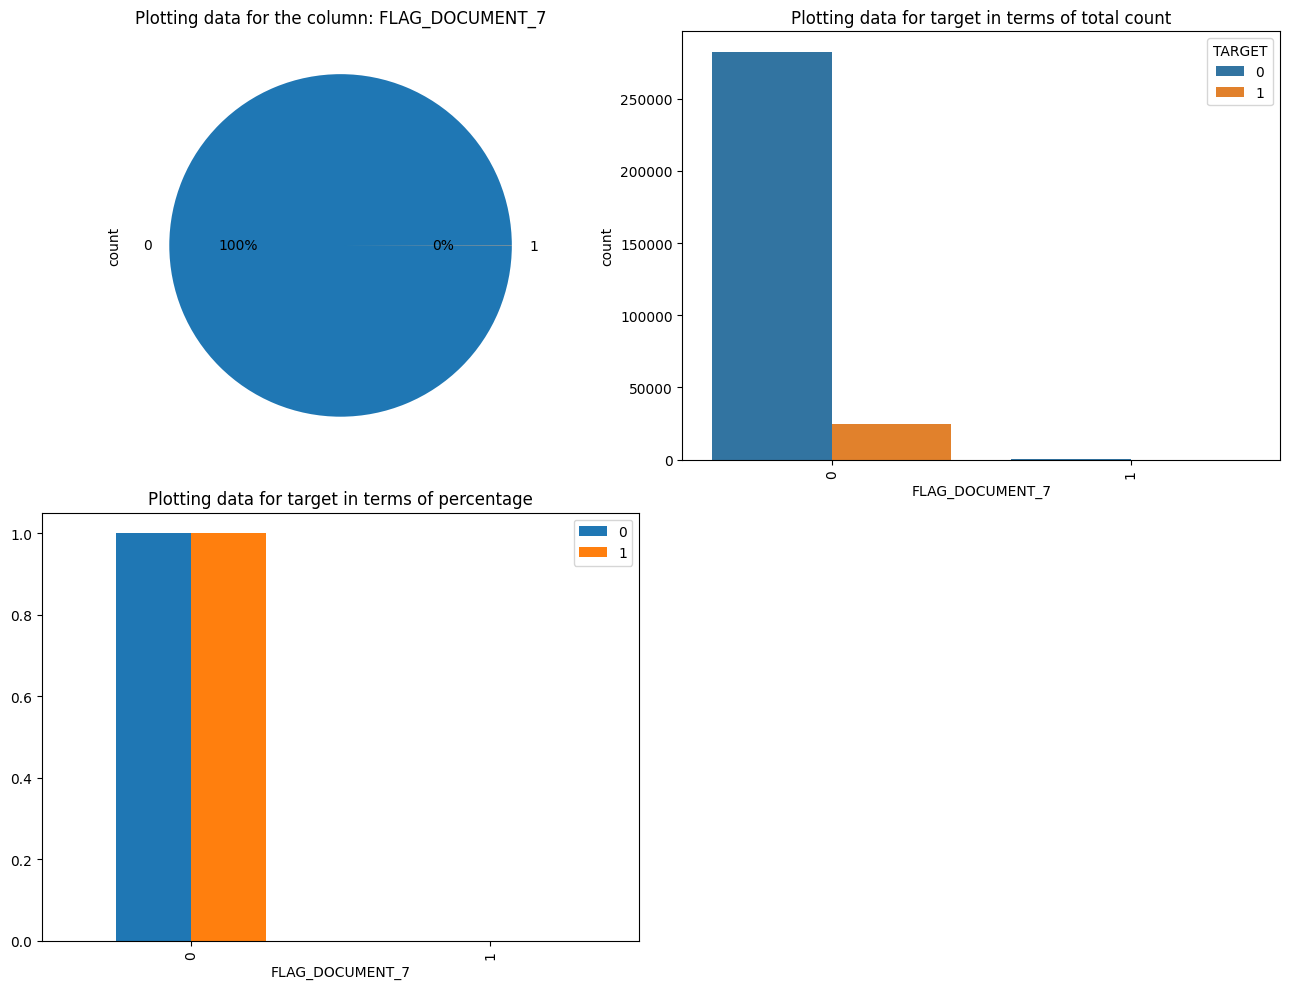

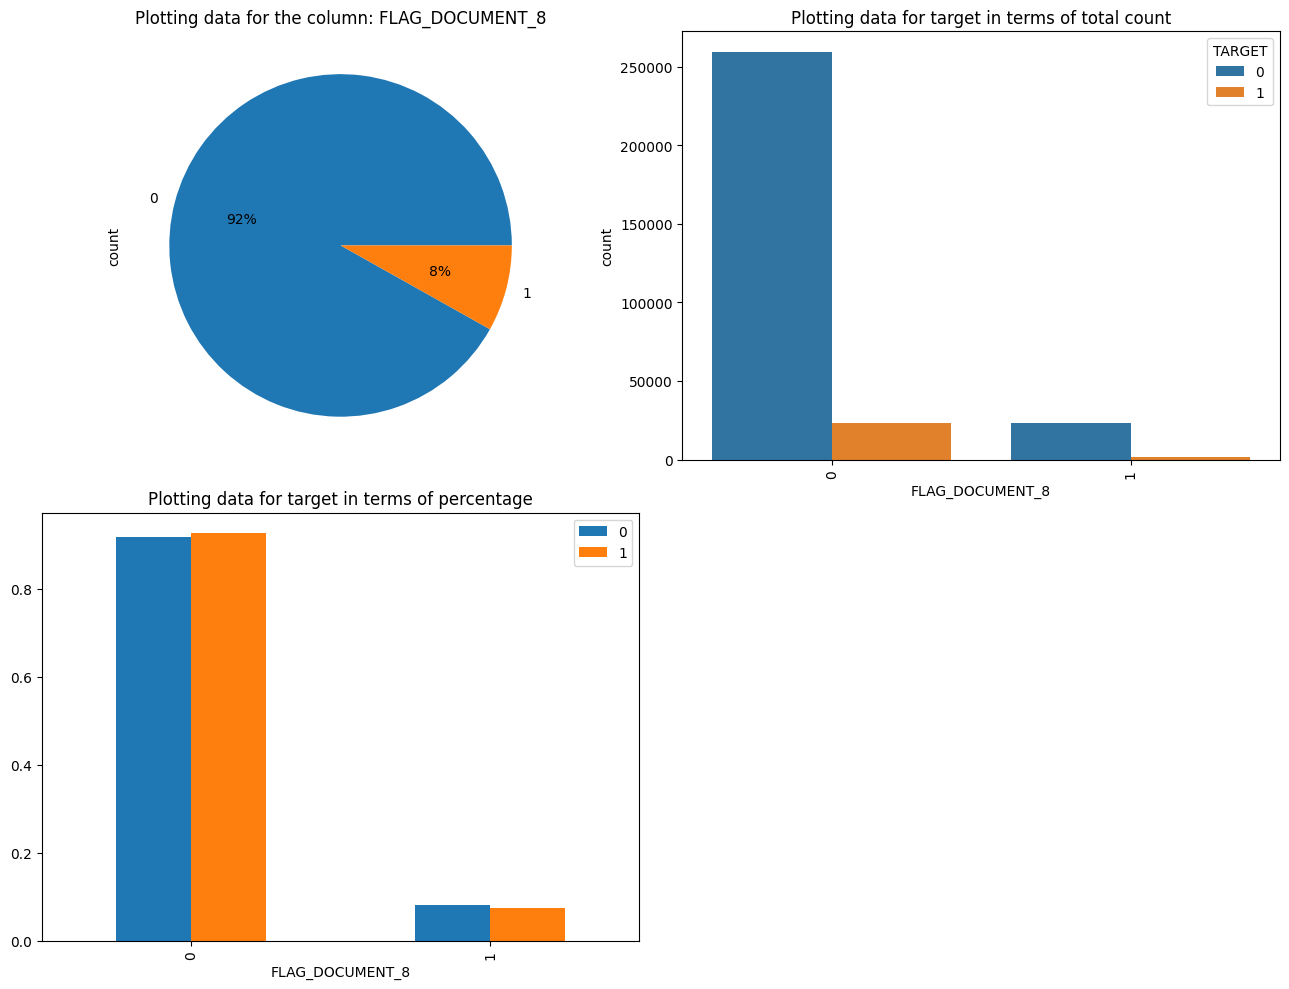

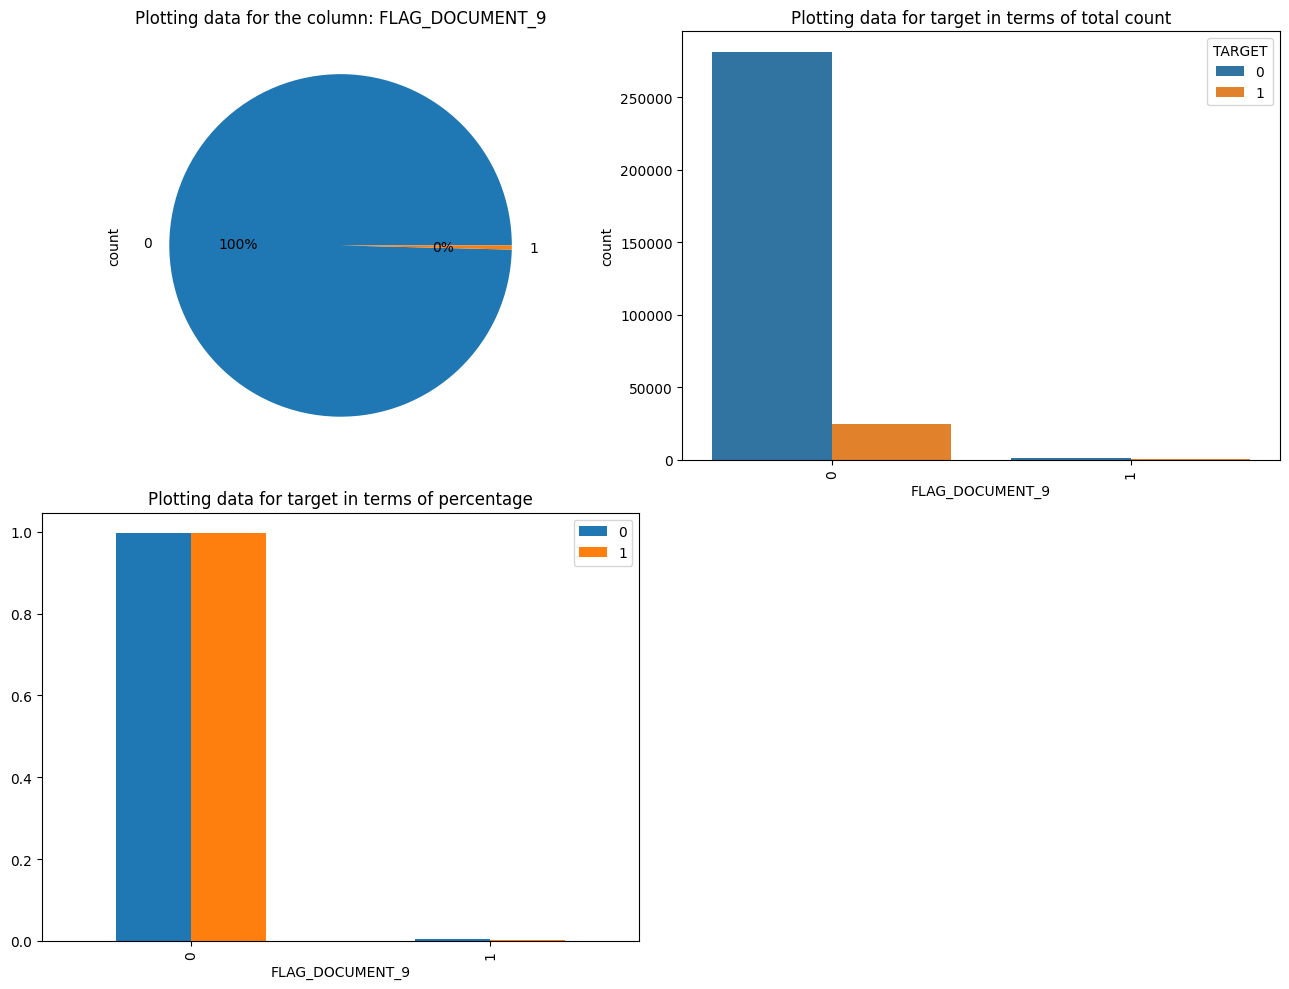

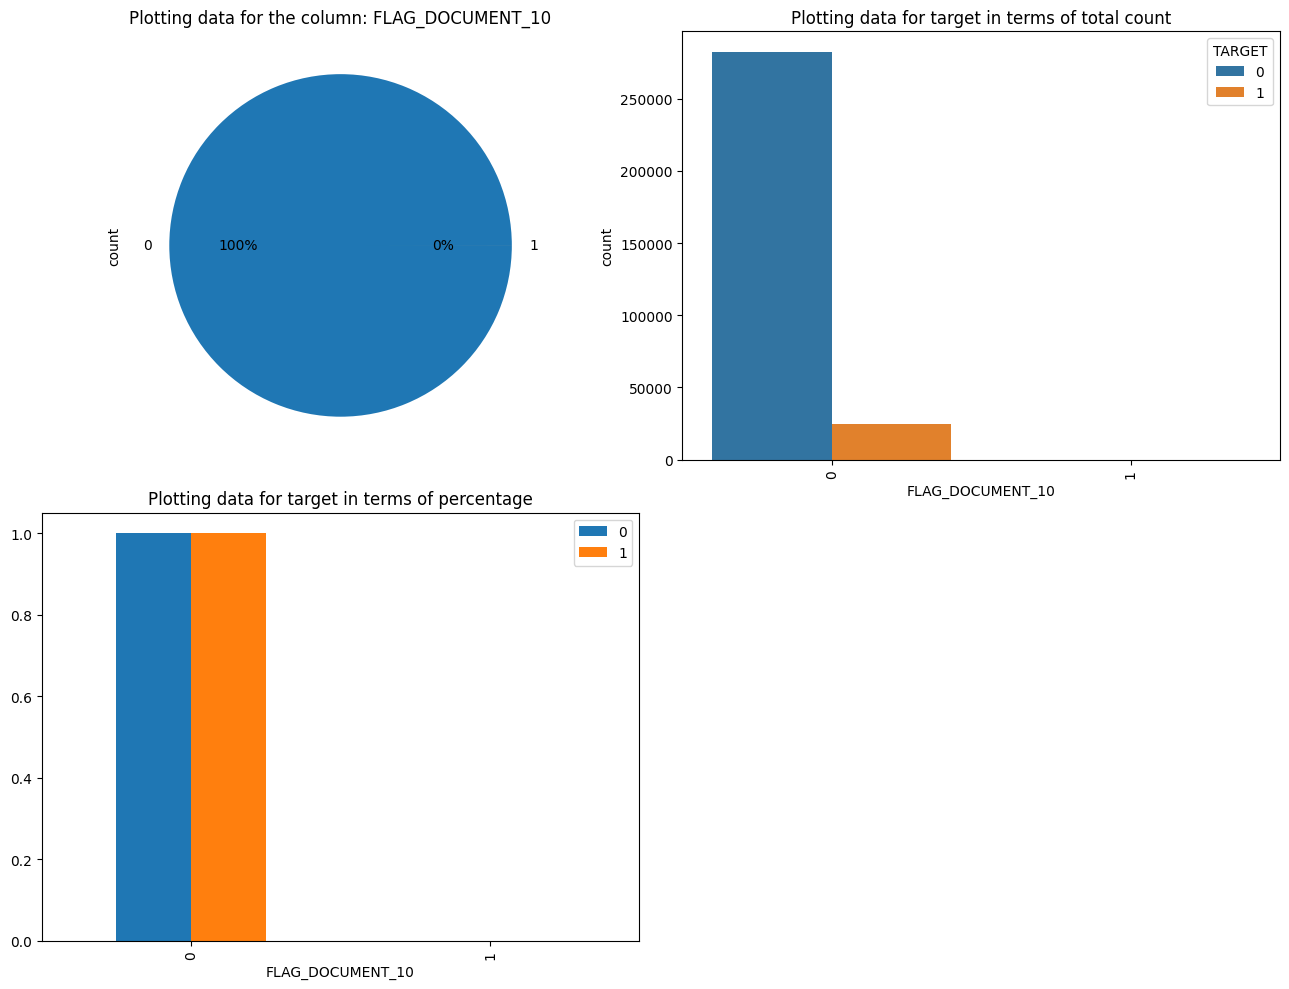

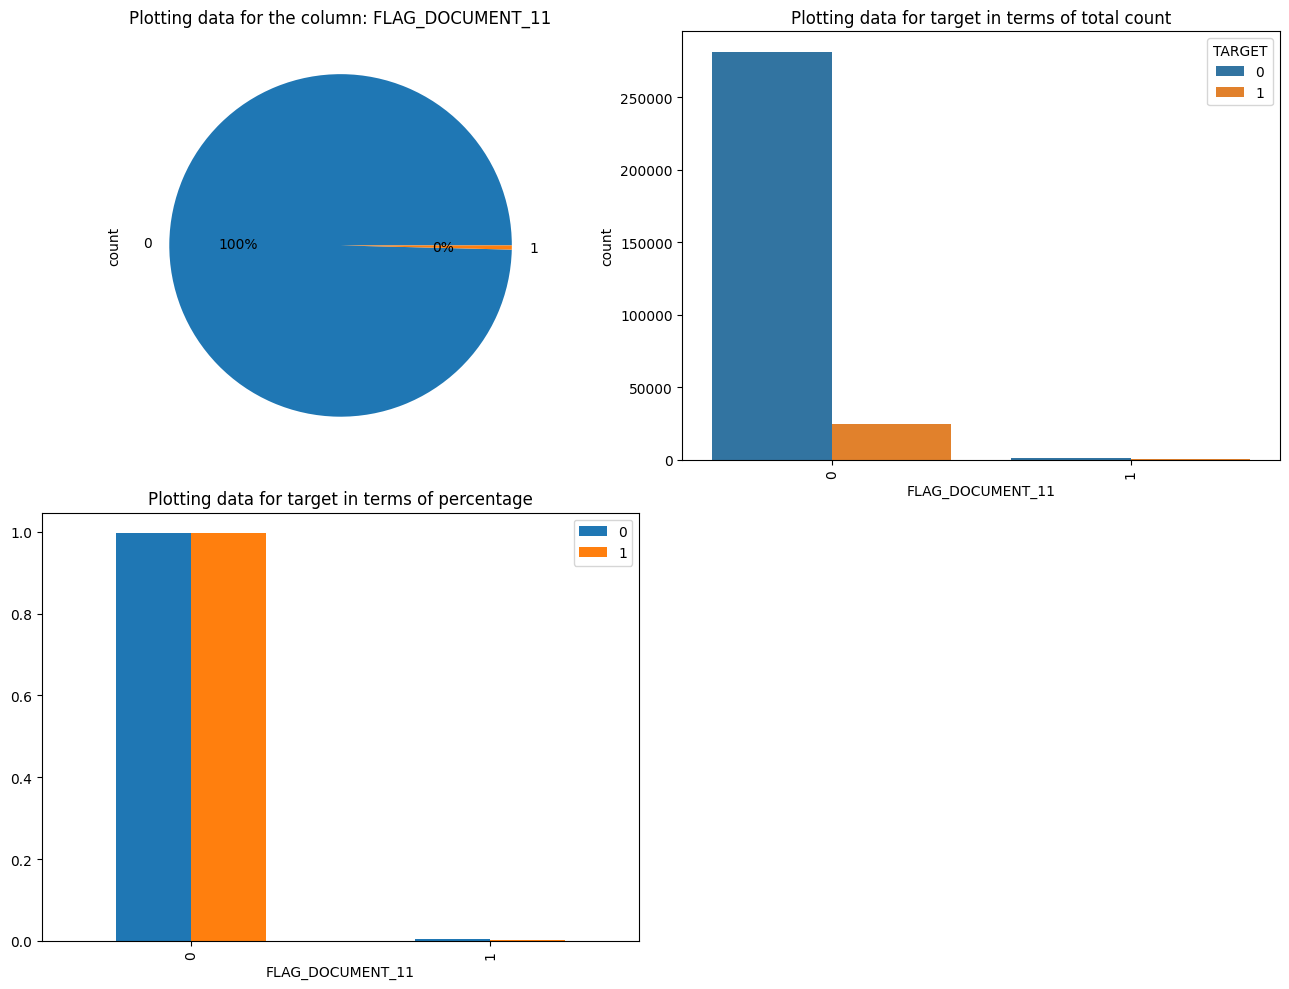

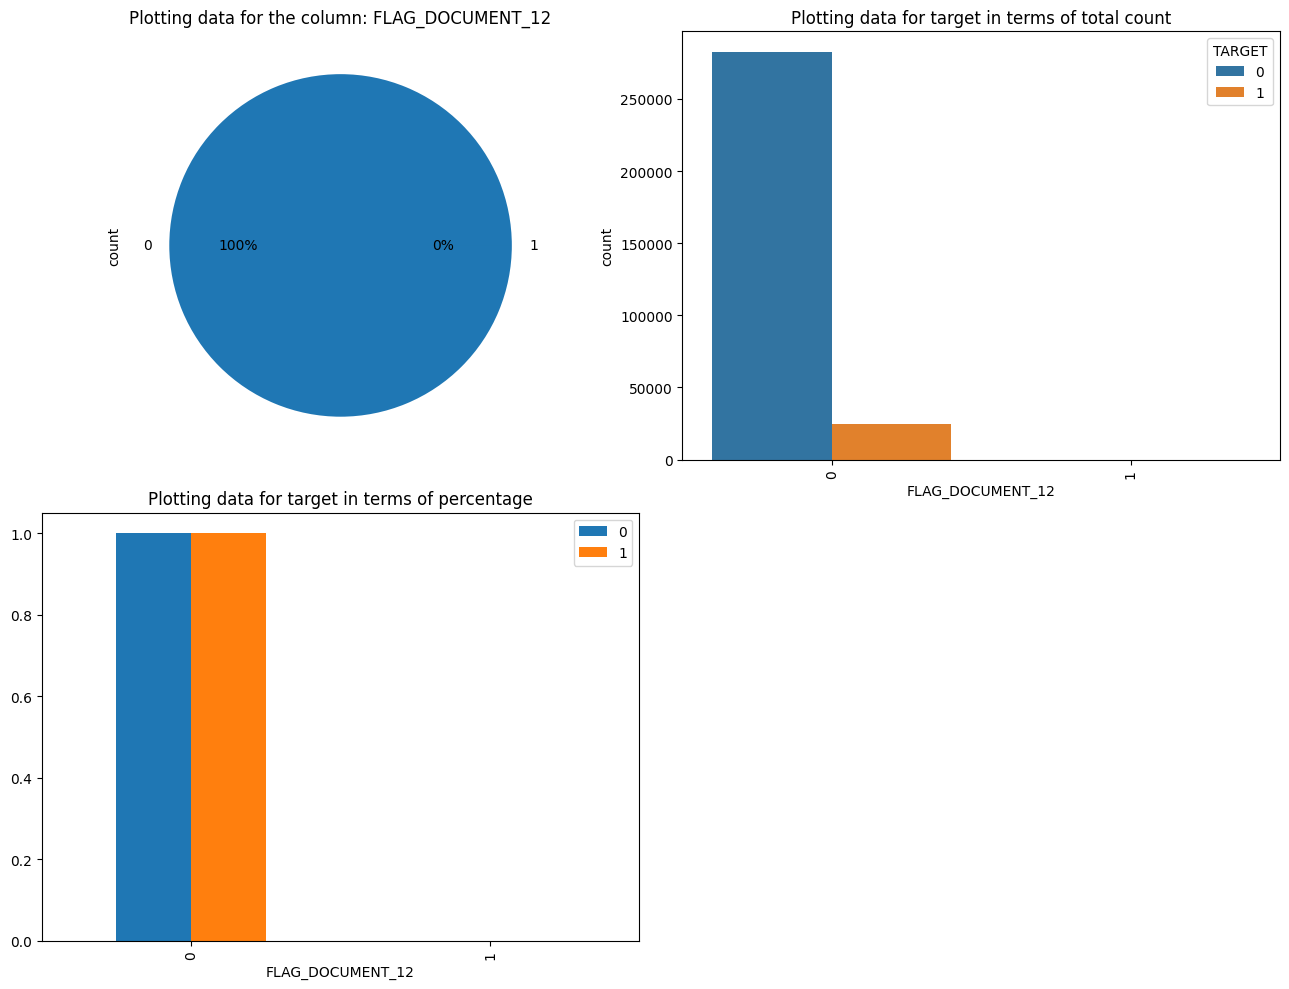

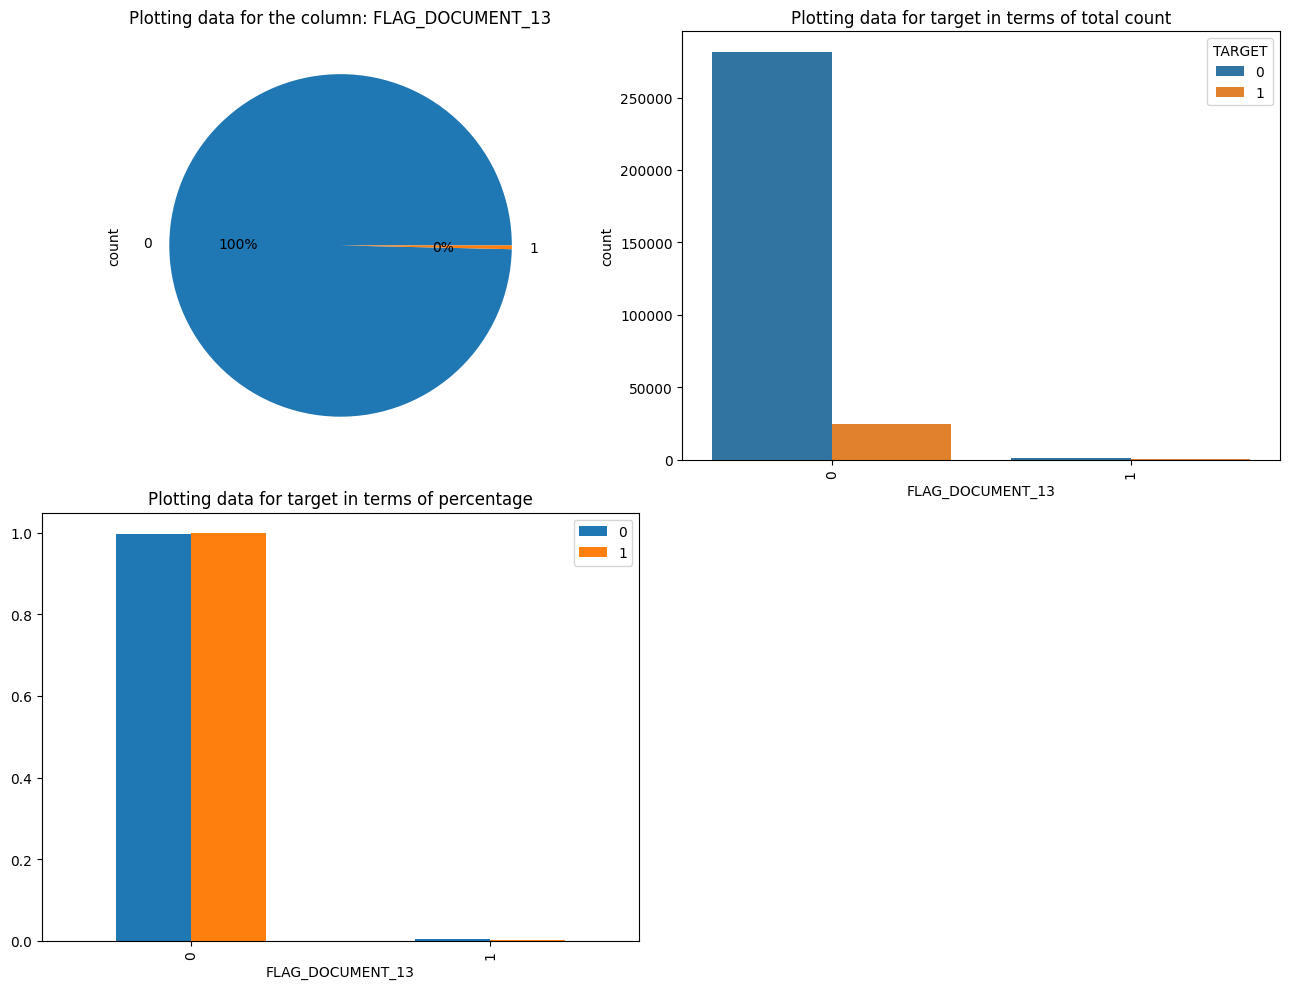

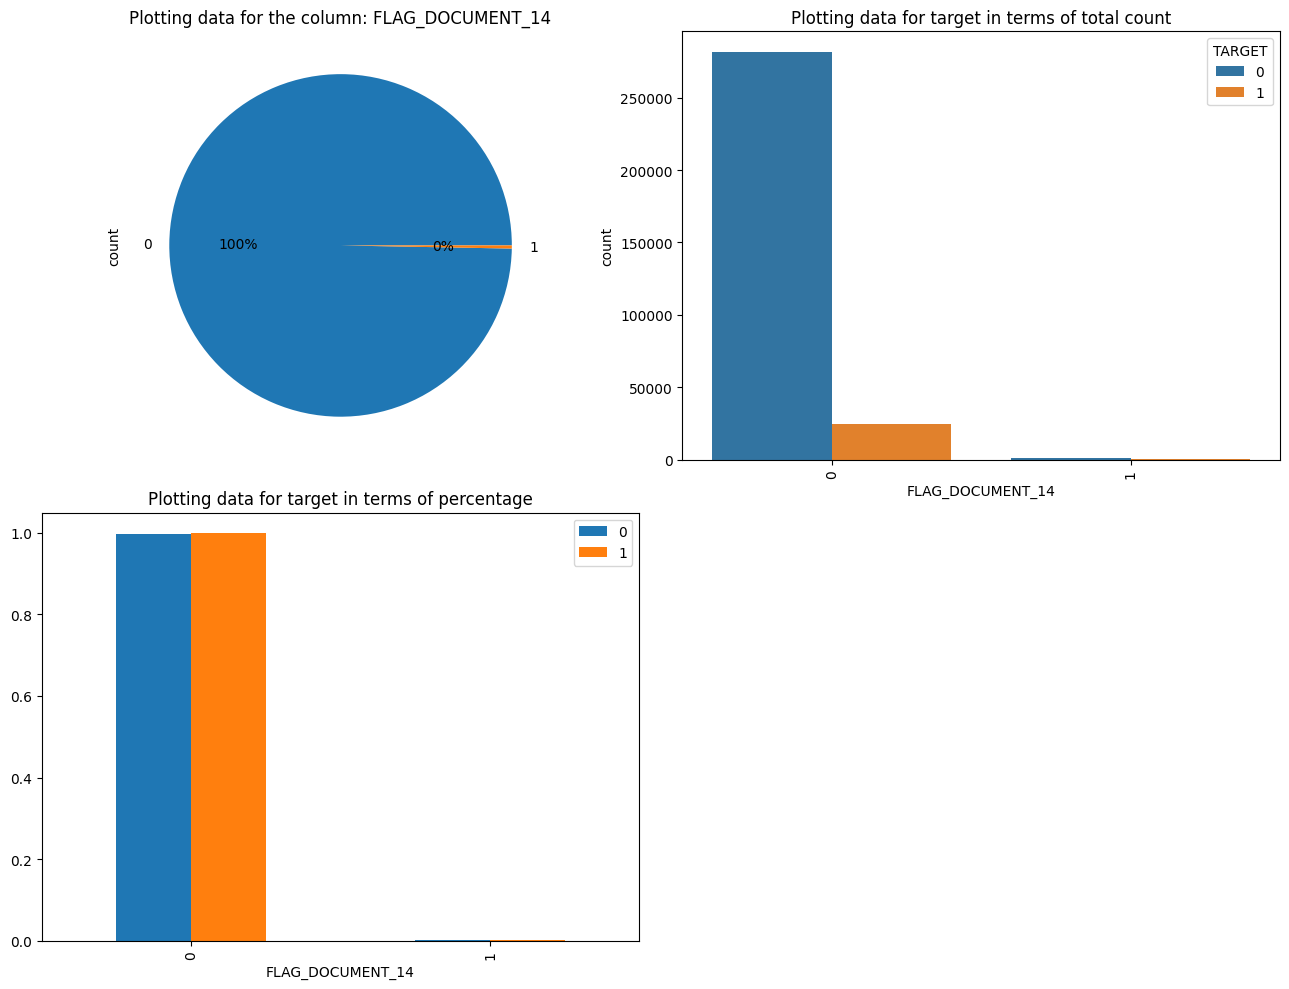

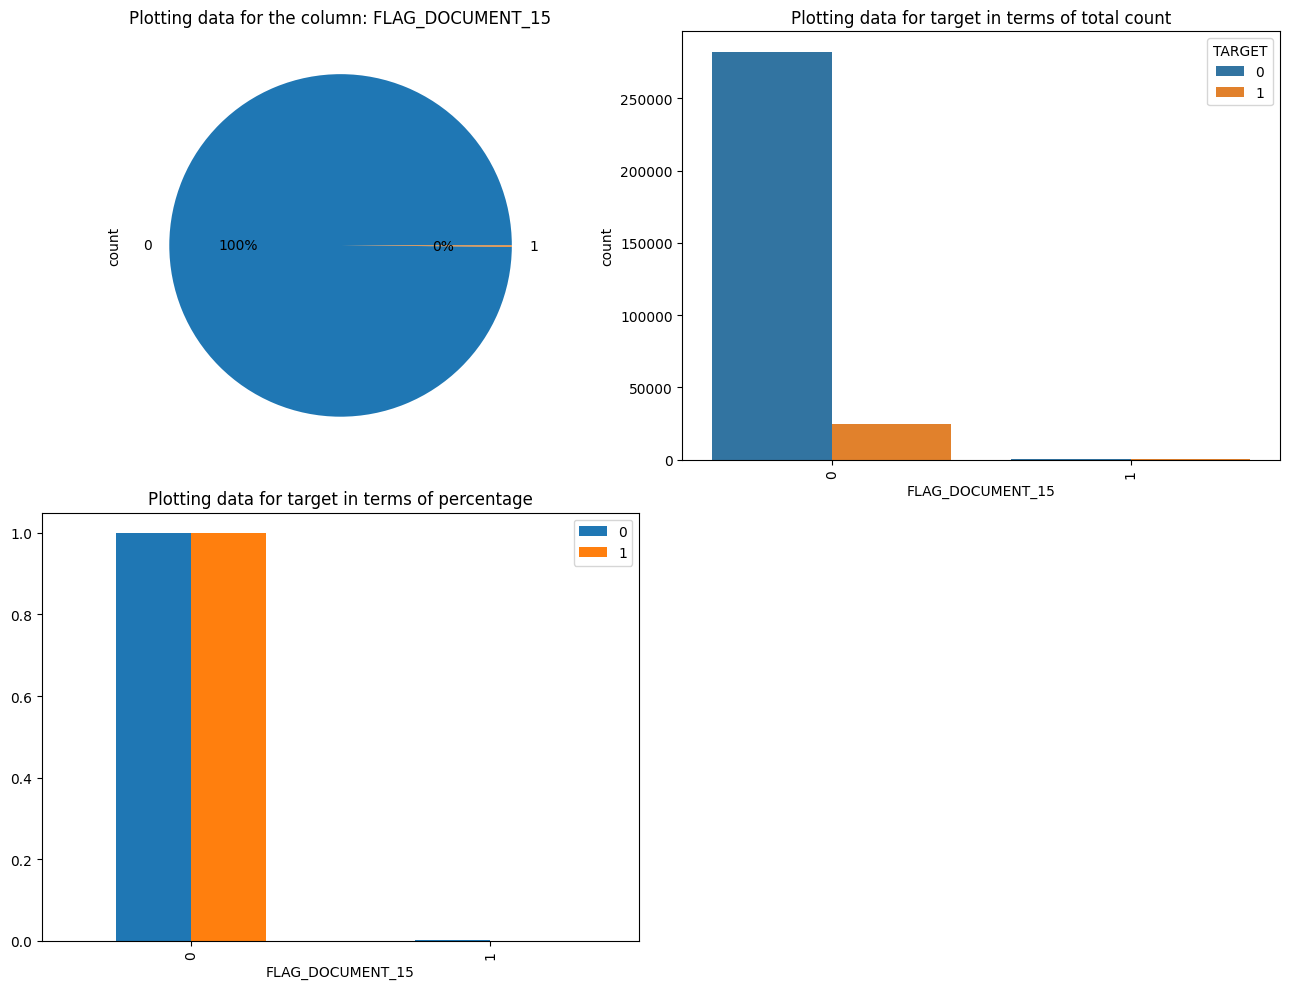

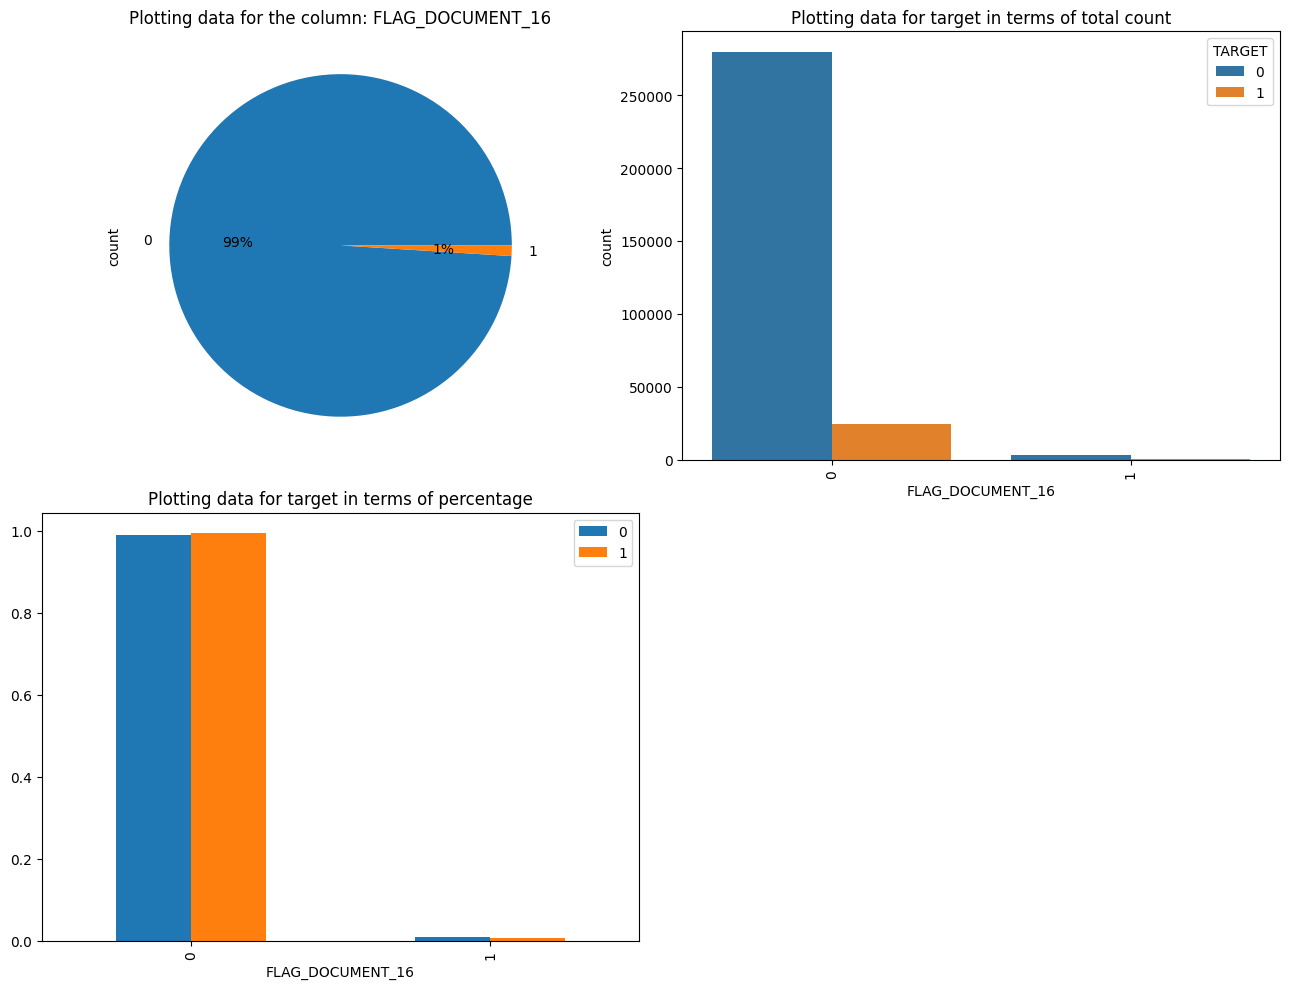

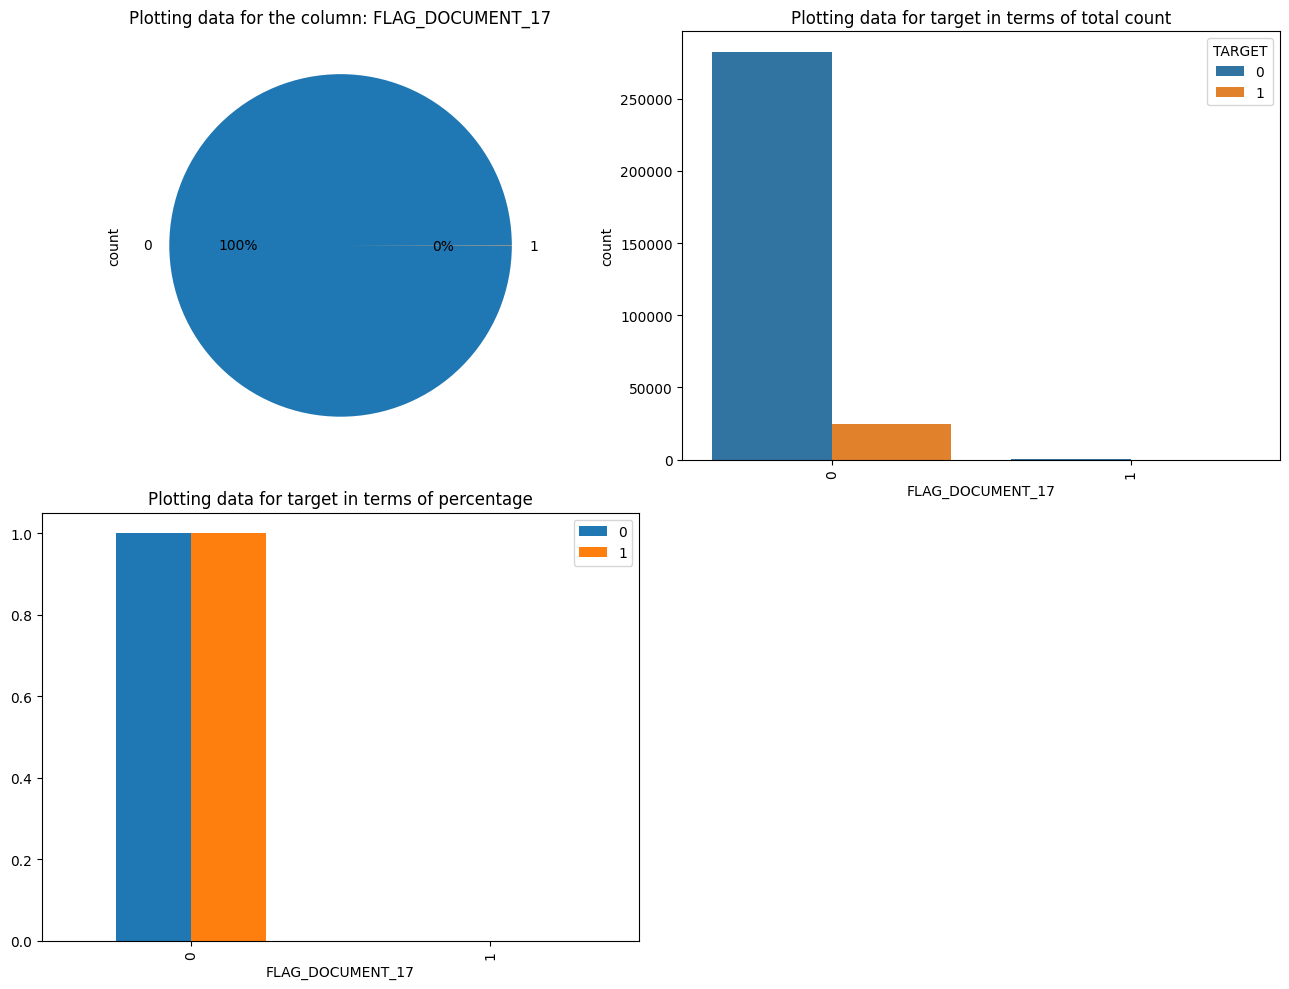

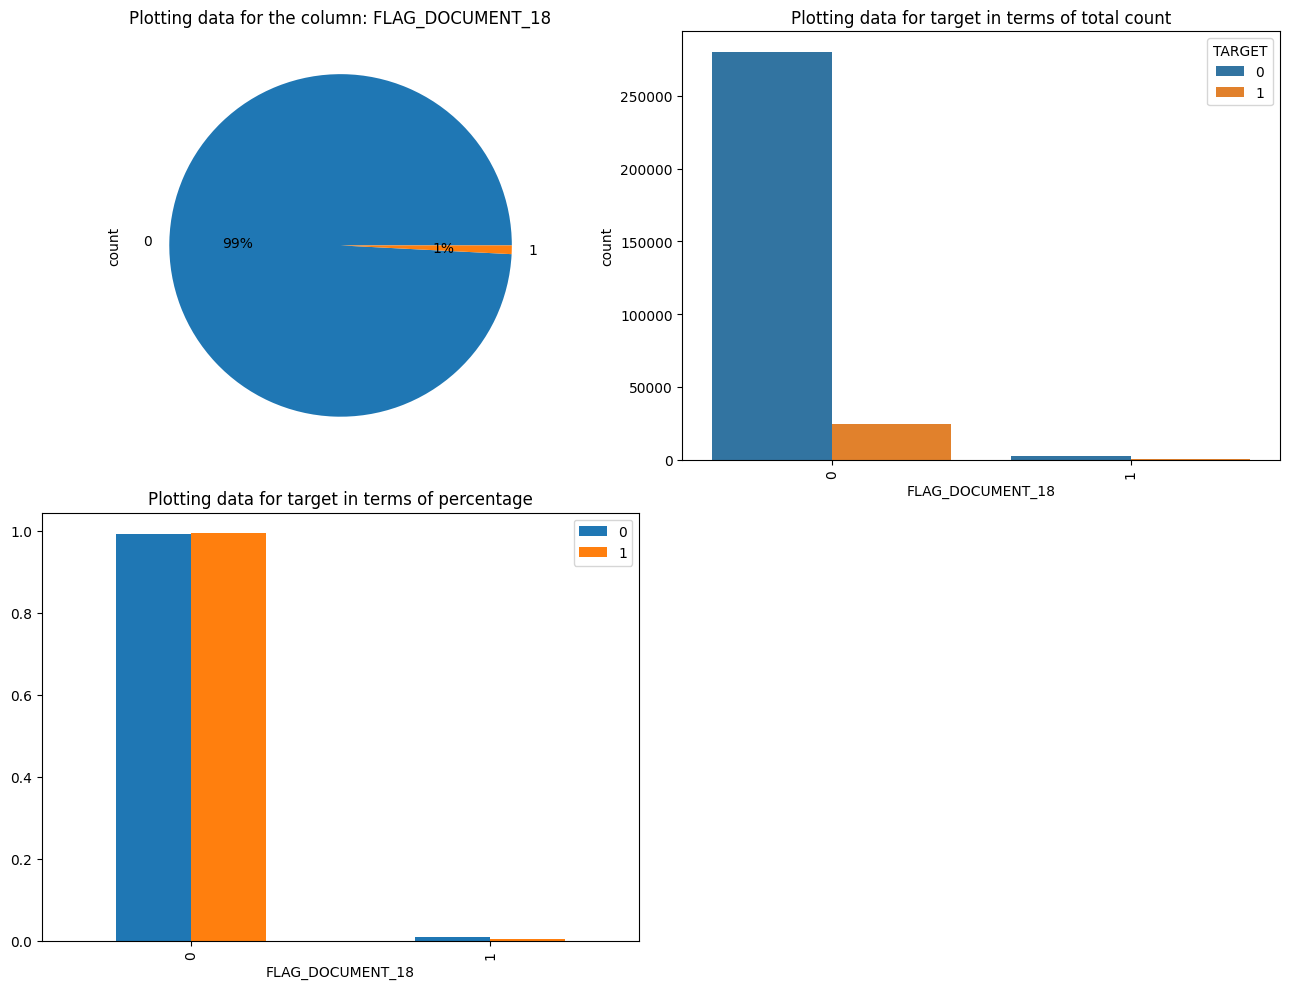

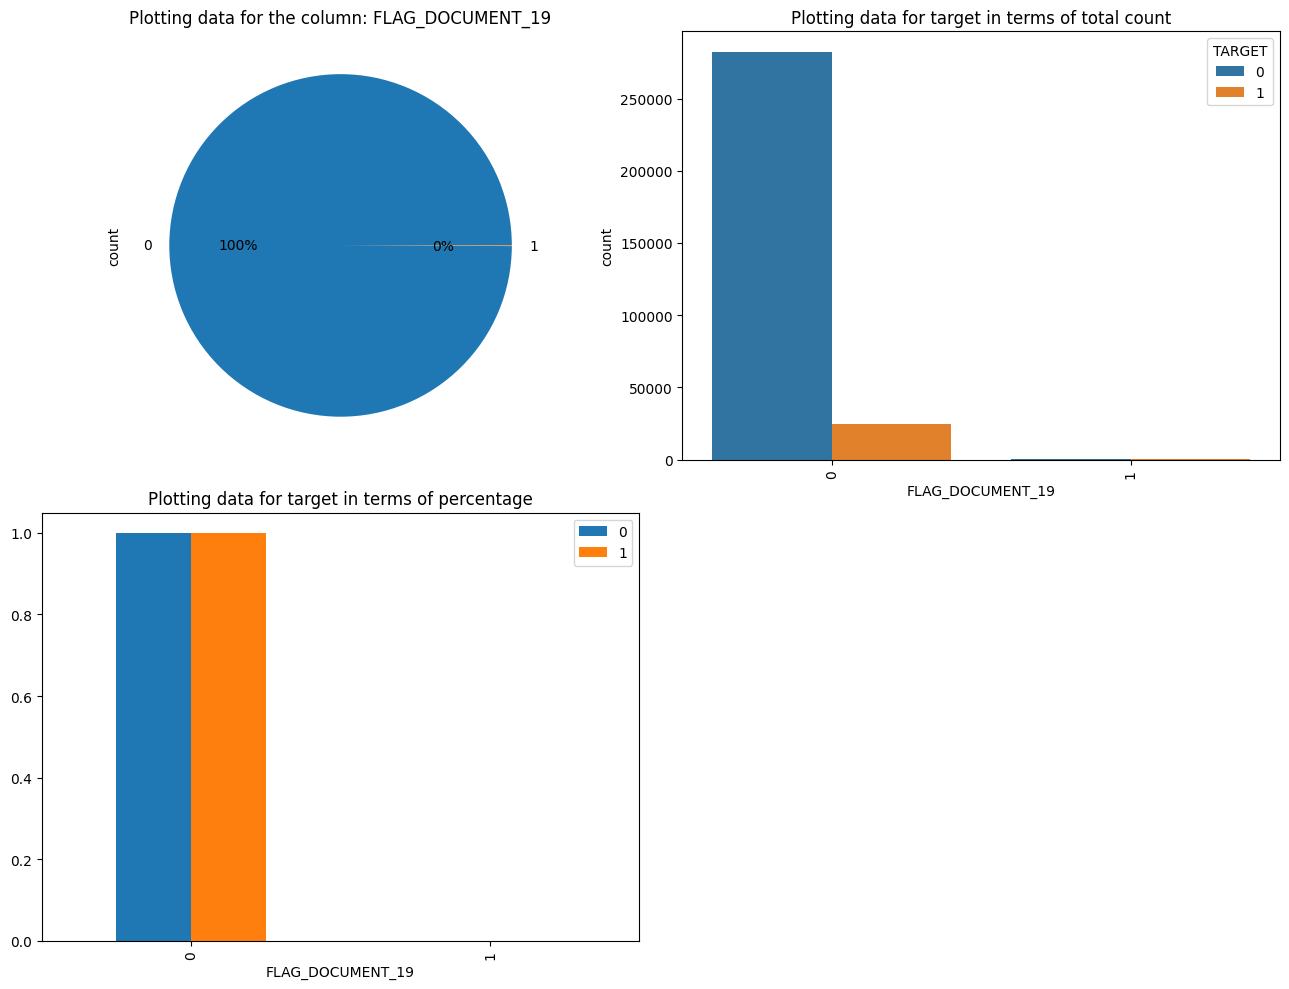

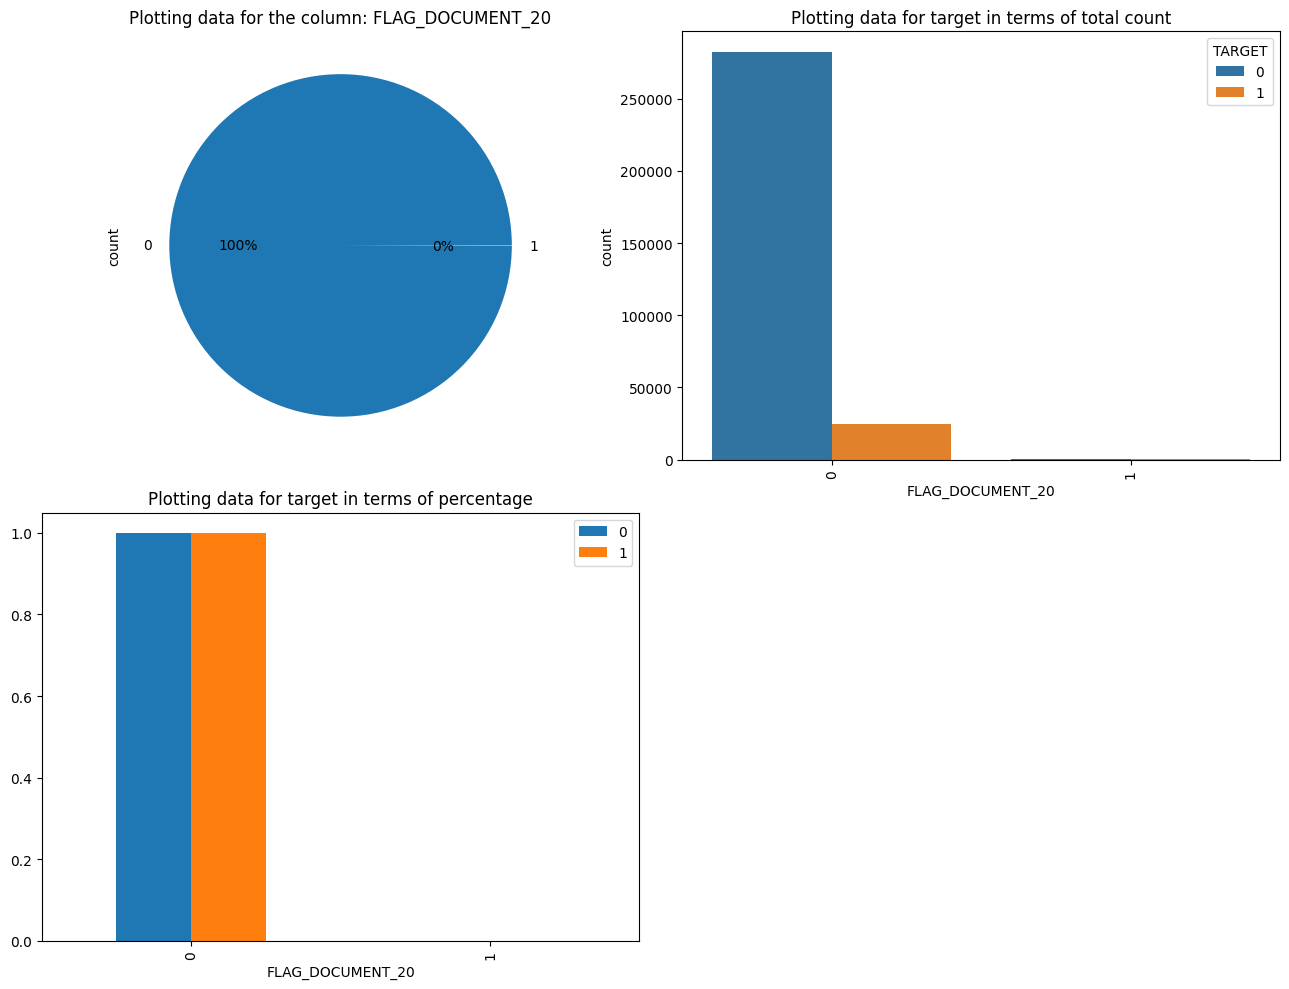

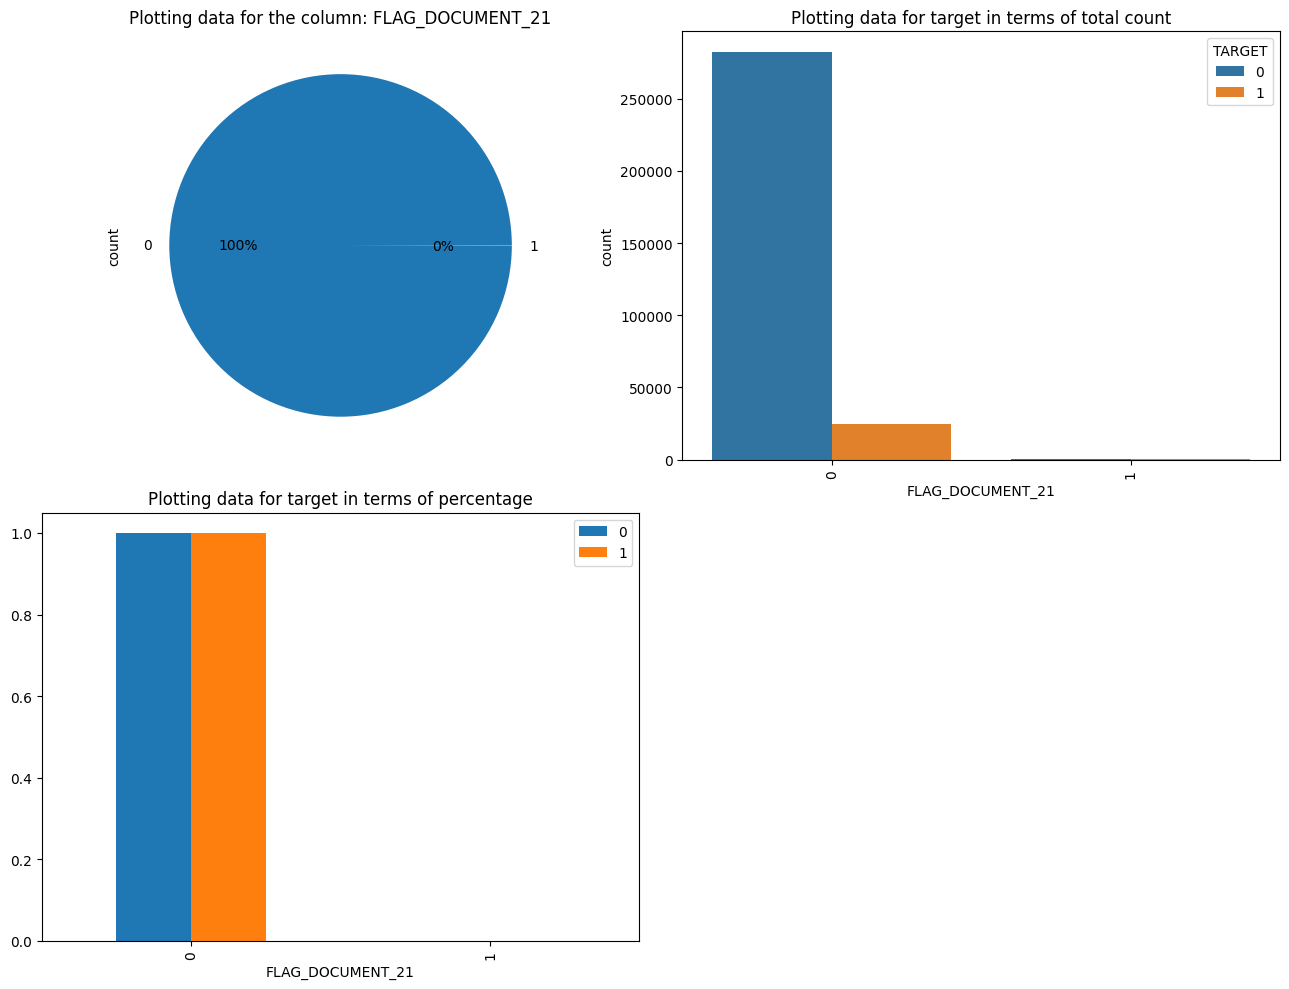

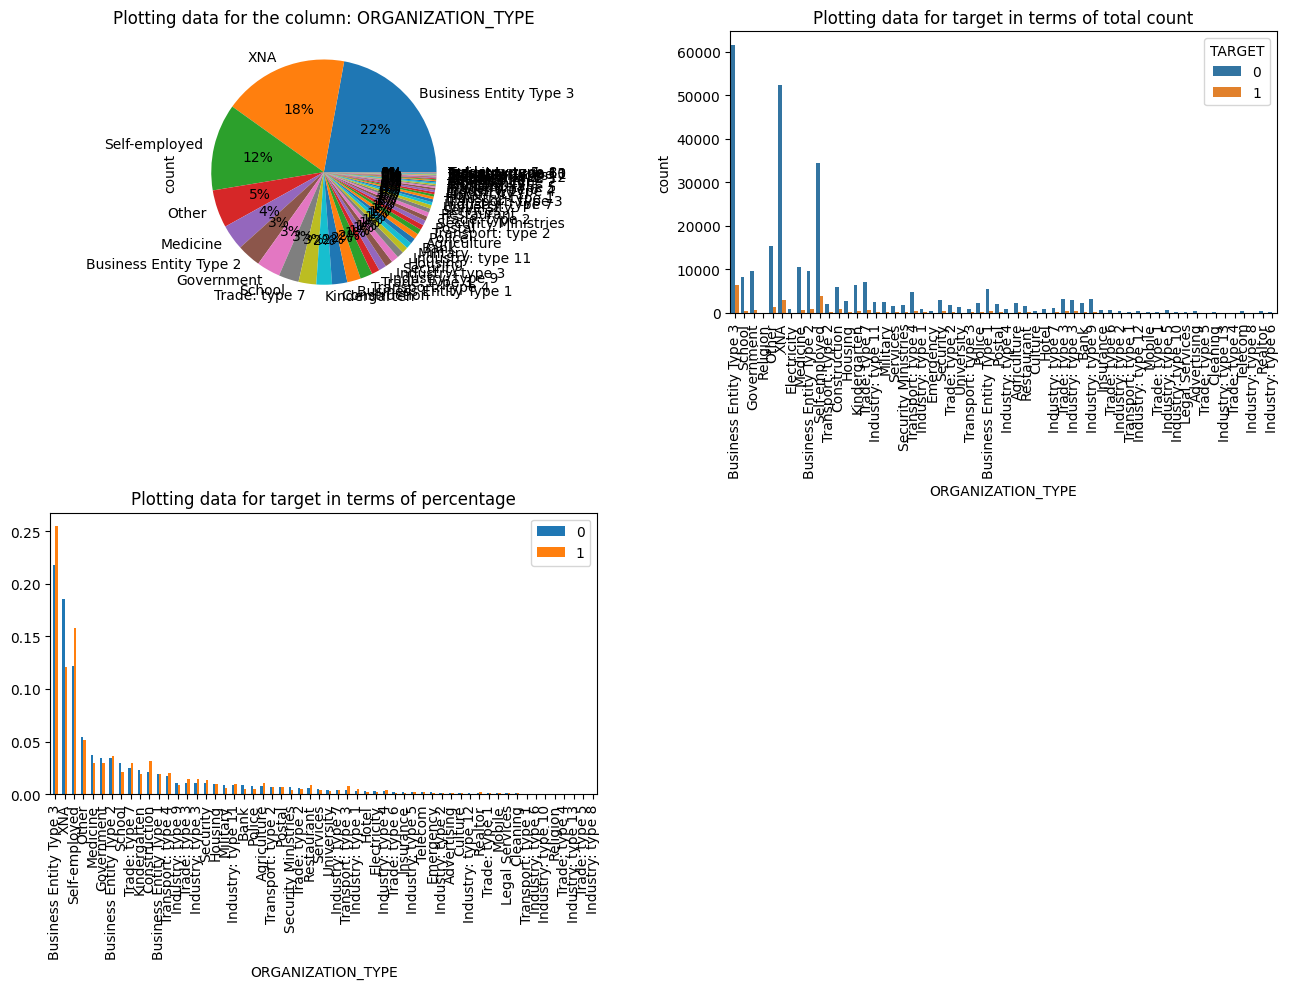

In [22]:
#plotting graphs for all the catagorical columns
for i in catCols:
    plotting(appDf, target0, target1, i)

## land vs cash vs target

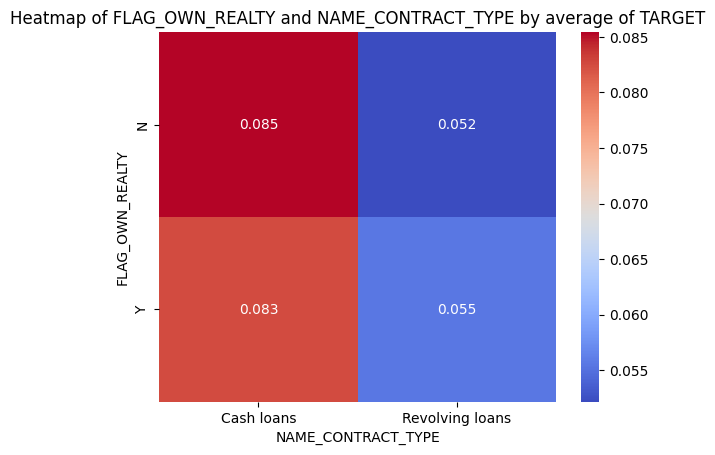

In [23]:
#To check if having an asset makes any difference on the applicant's credibility.
pivot_table = appDf.pivot_table(index='FLAG_OWN_REALTY', columns='NAME_CONTRACT_TYPE', values='TARGET', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of FLAG_OWN_REALTY and NAME_CONTRACT_TYPE by average of TARGET')
plt.show()

In [24]:
appDf.DAYS_BIRTH.describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [25]:
print((appDf.groupby('FLAG_OWN_REALTY')['DAYS_BIRTH'].mean())/(-365))

FLAG_OWN_REALTY
N    41.79333
Y    44.88361
Name: DAYS_BIRTH, dtype: float64


In [26]:
#adding age in years columns
appDf['AGE_YRS']=appDf.DAYS_BIRTH/(-365)

In [27]:
#See the age group of people owning and not owning land
print('Age of most of the people with land: ',appDf[(appDf.FLAG_OWN_REALTY=='Y')]['AGE_YRS'].mode()[0])
print('Age of most of the people without land: ',appDf[(appDf.FLAG_OWN_REALTY=='N')]['AGE_YRS'].mode()[0])

Age of most of the people with land:  39.43835616438356
Age of most of the people without land:  28.405479452054795


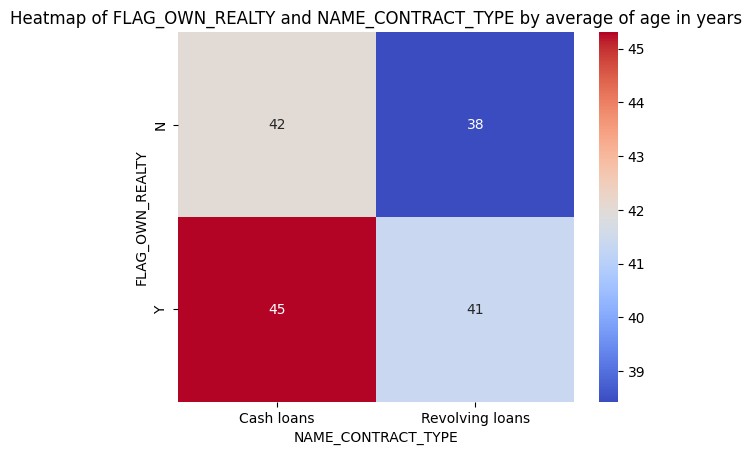

In [28]:
#To check if having an asset makes any difference on the applicant's credibility.
pivot_table = appDf.pivot_table(index='FLAG_OWN_REALTY', columns='NAME_CONTRACT_TYPE', values='AGE_YRS', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of FLAG_OWN_REALTY and NAME_CONTRACT_TYPE by average of age in years')
plt.show()

## CNT_CHILDREN

In [29]:
appDf.CNT_CHILDREN.describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

<Axes: >

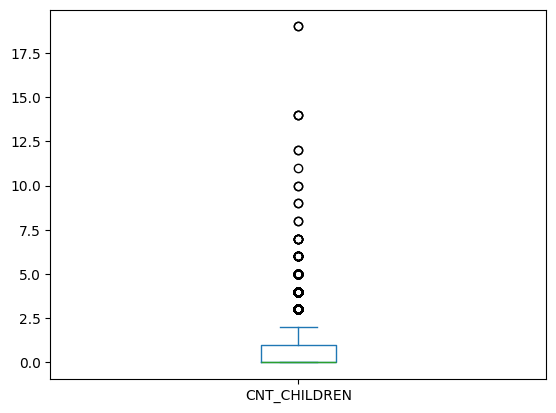

In [30]:
appDf.CNT_CHILDREN.plot.box()

In [31]:
# outliers exist in this column
appDf.CNT_CHILDREN.quantile(0.95)

2.0

In [32]:
# getting an idea of how many outliers exist.
(appDf.CNT_CHILDREN>appDf.CNT_CHILDREN.quantile(0.95)).mean()*100

1.3892185970583166

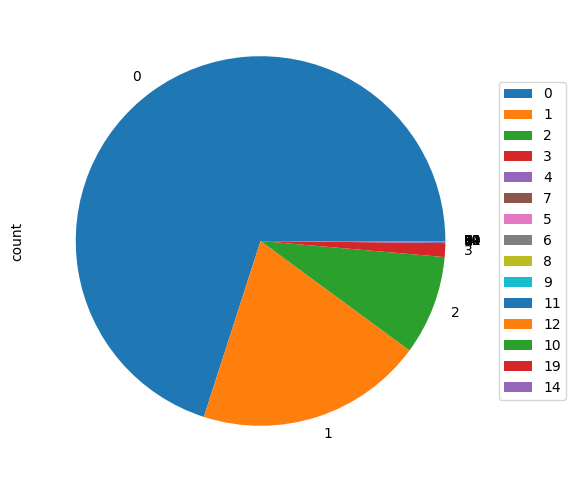

In [33]:
plt.figure(figsize=(10, 6))
appDf.CNT_CHILDREN.value_counts().plot.pie()
plt.legend(appDf.CNT_CHILDREN.unique(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [34]:
#removing records with children count more than 3 because they are so less, that we won't be able to conclude anything.
appDf=appDf[appDf.CNT_CHILDREN<=3]

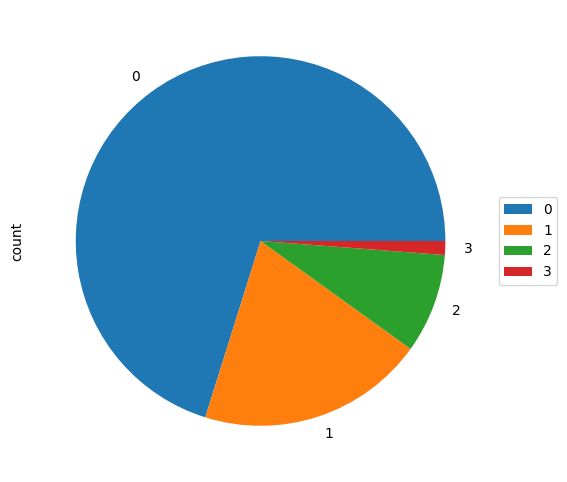

In [35]:
plt.figure(figsize=(10, 6))
appDf.CNT_CHILDREN.value_counts().plot.pie()
plt.legend(appDf.CNT_CHILDREN.unique(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Children count vs income vs target
We could not see any direct relation between childern count and credibility of an applicant, I want to see if that changes with income.

In [36]:
appDf.AMT_INCOME_TOTAL.describe()

count    3.069560e+05
mean     1.687966e+05
std      2.372979e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.476000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: >

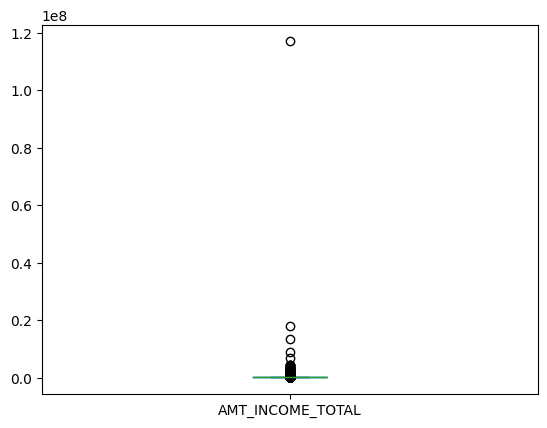

In [37]:
#looking for outliers in incomes
appDf.AMT_INCOME_TOTAL.plot.box()

In [38]:
#we see outliers we need to remove this this go get a better idea
print(appDf.AMT_INCOME_TOTAL.quantile(.75))
print(appDf.AMT_INCOME_TOTAL.quantile(.95))
print(appDf.AMT_INCOME_TOTAL.quantile(.99))
print(appDf.AMT_INCOME_TOTAL.max())

202500.0
337500.0
472500.0
117000000.0


In [39]:
#we see that even till 99 percentile the numbers are comparable but beyond that is not, so we will remove it.
appDf=appDf[appDf.AMT_INCOME_TOTAL<=appDf.AMT_INCOME_TOTAL.quantile(.99)]


In [40]:
#checking for nulls
appDf.AMT_INCOME_TOTAL.isnull().sum()

0

In [41]:
target0=appDf[appDf.TARGET==0]
target1=appDf[appDf.TARGET==1]

<Axes: >

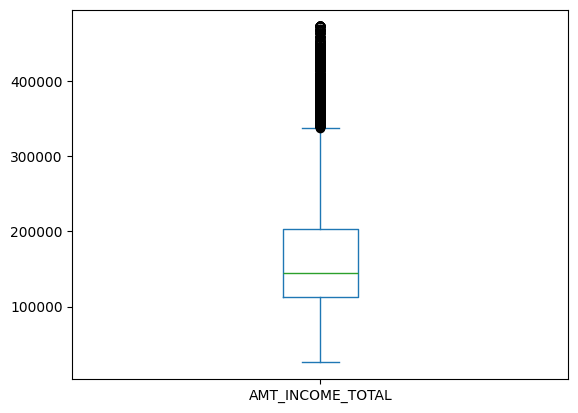

In [42]:
appDf.AMT_INCOME_TOTAL.plot.box()

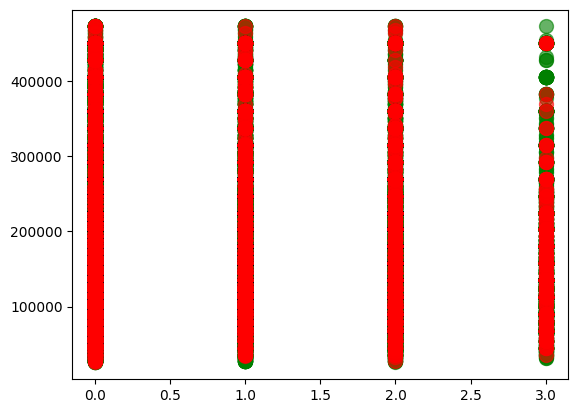

In [43]:
plt.scatter(target0['CNT_CHILDREN'], target0['AMT_INCOME_TOTAL'], color='g', s=100, alpha=0.6)
plt.scatter(target1['CNT_CHILDREN'], target1['AMT_INCOME_TOTAL'], color='r', s=100, alpha=0.6)
plt.show()

In [44]:
# we can see that this doesn't give us a good picture
# so we will create a catagories for income L1=<50000, L2=50000-100000, L3=100000-150000 upto 500000
def incomeBracket(income):
    if income<50000:
        return 'L1'
    elif income<100000:
        return 'L2'
    elif income<150000:
        return 'L3'
    elif income<200000:
        return 'L4'
    elif income<250000:
        return 'L5'
    elif income<300000:
        return 'L6'
    elif income<350000:
        return 'L7'
    elif income<400000:
        return 'L8'
    elif income<450000:
        return 'L9'
    elif income<500000:
        return 'L10'
appDf['INCOME_CAT']=appDf.AMT_INCOME_TOTAL.apply(incomeBracket)

In [45]:
target0=appDf[appDf.TARGET==0]
target1=appDf[appDf.TARGET==1]

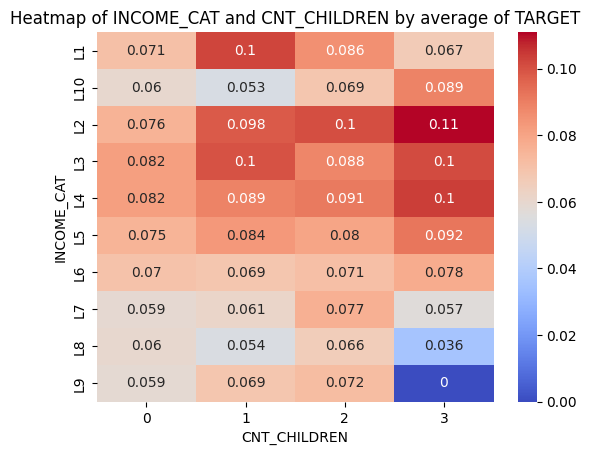

In [46]:
#plotting heat map
pivot_table = appDf.pivot_table(index='INCOME_CAT', columns='CNT_CHILDREN', values='TARGET', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of INCOME_CAT and CNT_CHILDREN by average of TARGET')
plt.show()

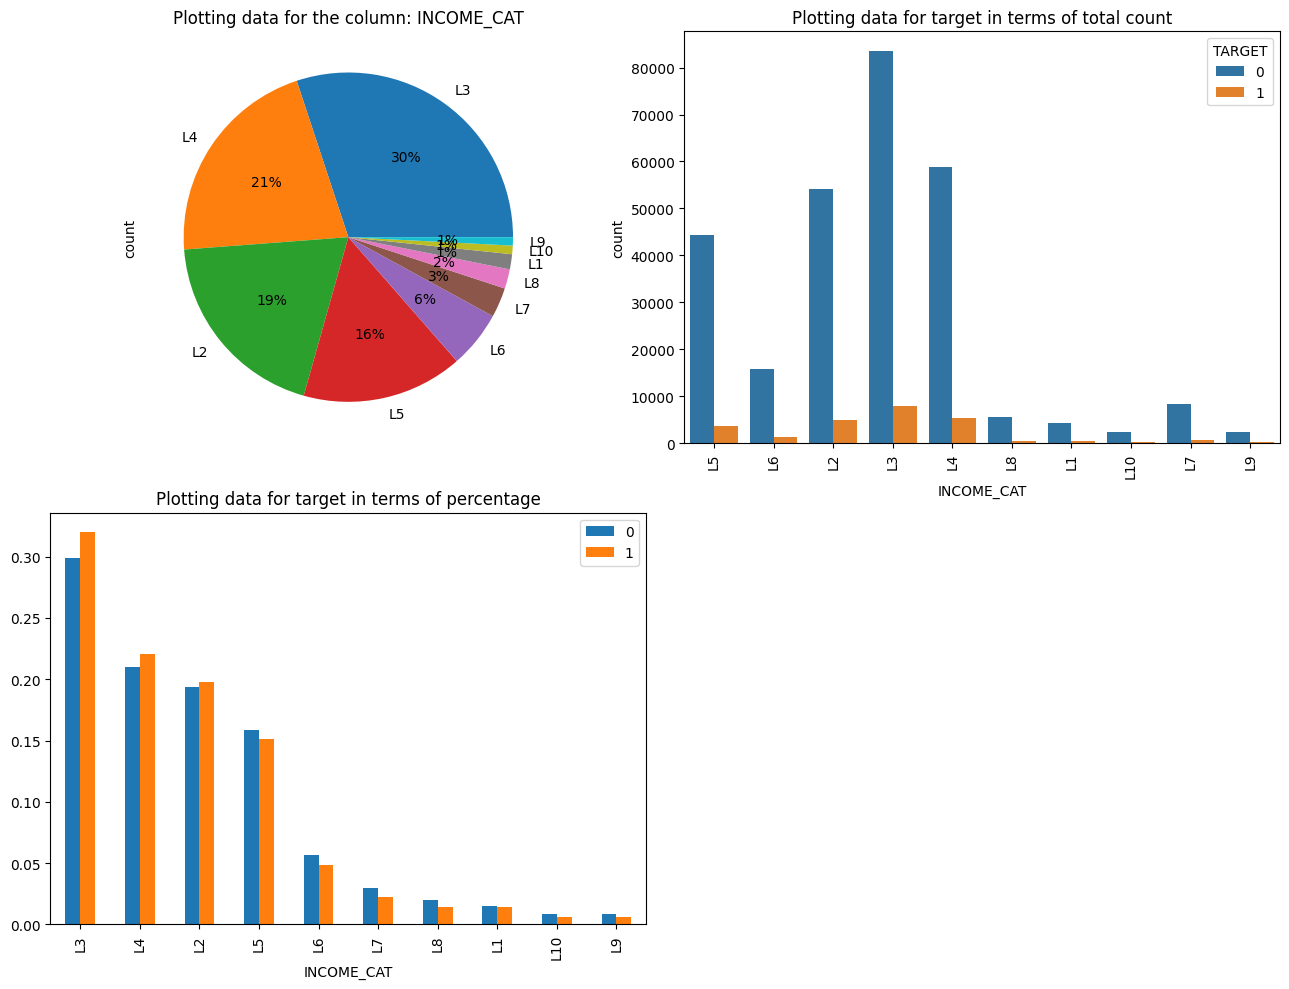

In [47]:
# the above plot does not show a good enough realtion with children and income, but it does direct me to see tha relation 
# between income and credebility
plotting(appDf, target0, target1, 'INCOME_CAT')

## AMT_CREDIT

In [48]:

appDf.AMT_CREDIT.isnull().sum()

0

In [49]:
appDf.AMT_CREDIT.describe()

count    3.039510e+05
mean     5.938572e+05
std      3.967410e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.094000e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

<Axes: >

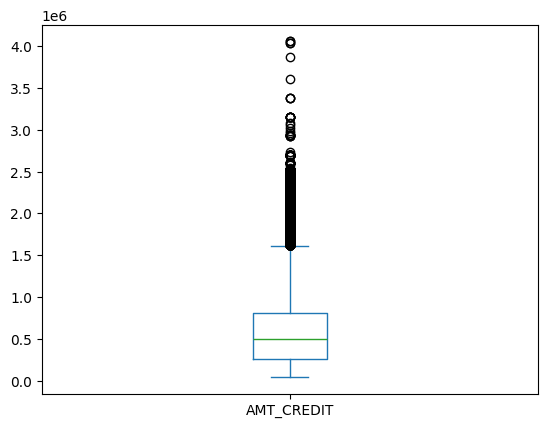

In [50]:
appDf.AMT_CREDIT.plot.box()

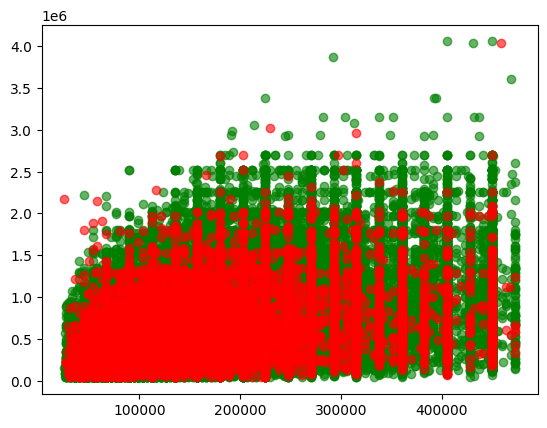

In [51]:
#The outliers seem important so, I'll keep them and make a scatter plot
plt.scatter(target0['AMT_INCOME_TOTAL'], target0['AMT_CREDIT'], color='g', alpha=0.6)
plt.scatter(target1['AMT_INCOME_TOTAL'], target1['AMT_CREDIT'], color='r', alpha=0.6)
plt.show()

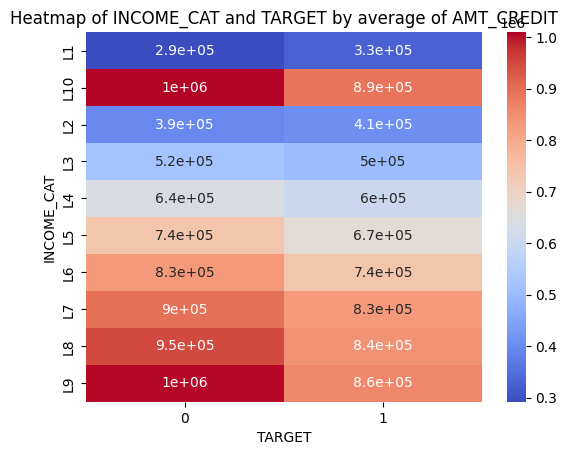

In [52]:
#plotting heat map
pivot_table = appDf.pivot_table(index='INCOME_CAT', columns='TARGET', values='AMT_CREDIT', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of INCOME_CAT and TARGET by average of AMT_CREDIT')
plt.show()

In [53]:
#plotting graph 
tar0Avg=target0.groupby('INCOME_CAT')['AMT_CREDIT'].mean()
tar1Avg=target1.groupby('INCOME_CAT')['AMT_CREDIT'].mean()

In [54]:
appDf['INCOME_CAT'].str.slice(1).unique()

array(['5', '6', '2', '3', '4', '8', '1', '10', '7', '9'], dtype=object)

In [55]:
avgIncome=pd.DataFrame(appDf.groupby('INCOME_CAT')['AMT_CREDIT'].mean().sort_values())

In [56]:
avgIncome

AMT_CREDIT
INCOME_CAT              
L1          2.946909e+05
L2          3.941514e+05
L3          5.201815e+05
L4          6.344096e+05
L5          7.327313e+05
L6          8.230277e+05
L7          8.911031e+05
L8          9.437644e+05
L9          9.977924e+05
L10         1.002614e+06

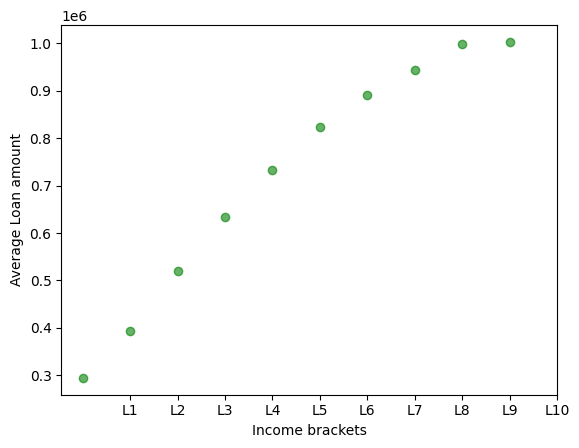

In [57]:
#Plotting graph of salary range against loan amout application.
#plt.scatter(pd.to_numeric(appDf['INCOME_CAT'].str.slice(1)).sort_values().unique(), appDf.groupby('INCOME_CAT')['AMT_CREDIT'].mean(), color='g', alpha=0.6)
plt.scatter(avgIncome.index, avgIncome.AMT_CREDIT, color='g', alpha=0.6)
custom_labels = [f'L{i}' for i in range(1, 11)]
plt.xticks(range(1, 11),labels=custom_labels)
plt.xlabel('Income brackets')
plt.ylabel('Average Loan amount')
plt.show()

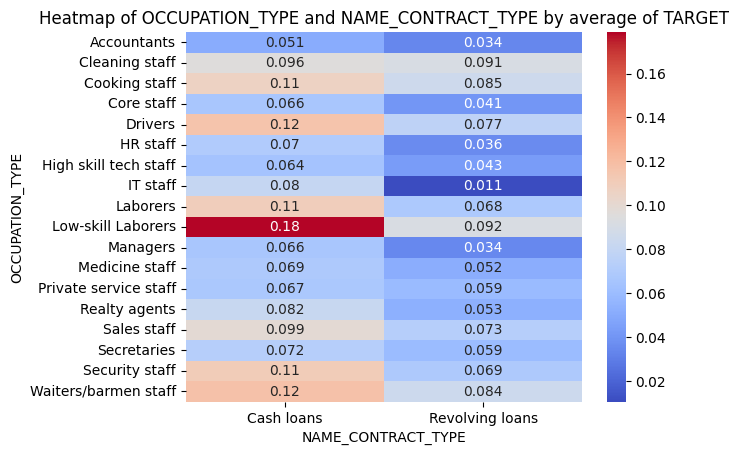

In [58]:
#plotting heat map
pivot_table = appDf.pivot_table(index='OCCUPATION_TYPE', columns='NAME_CONTRACT_TYPE', values='TARGET', aggfunc='mean')
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Heatmap of OCCUPATION_TYPE and NAME_CONTRACT_TYPE by average of TARGET')
plt.show()

# previous_application EDA

In [59]:
#importing dataset
prvDf=pd.read_csv('previous_application.csv')
prvDf.shape

(1670214, 37)

In [60]:
#We will not consider the columns with nulls more than or equal to 50% nulls or nan
prvDf=prvDf[prvDf.columns[prvDf.isnull().mean()<0.5]]
prvDf.shape

(1670214, 33)

In [61]:
prvDf.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT     

In [62]:
#fine tuning for null columns
prvDf=prvDf[prvDf.columns[prvDf.isnull().mean()<0.45]]
prvDf.shape

(1670214, 32)

In [63]:
# splitting catagorical data from numerical
#I pick 30 as the number as catagorical columns won't have many unique values, I just happened to pick 30
prvcatCols=[]
prvnumCols=[]
for i in prvDf.columns:
    if len(prvDf[i].unique())>30:
        prvnumCols.append(i)
    else:
        prvcatCols.append(i)
print(prvnumCols)
print(prvcatCols)

['SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_DECISION', 'SELLERPLACE_AREA', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']
['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [64]:
#Look for issues with catagorical columns
for i in prvcatCols:
    print(f"{i} : {prvDf[i].unique()}")

NAME_CONTRACT_TYPE : ['Consumer loans' 'Cash loans' 'Revolving loans' 'XNA']
WEEKDAY_APPR_PROCESS_START : ['SATURDAY' 'THURSDAY' 'TUESDAY' 'MONDAY' 'FRIDAY' 'SUNDAY' 'WEDNESDAY']
HOUR_APPR_PROCESS_START : [15 11  7  9  8 10 12 13 14 16  6  4  5 19 17 18 20 22 21  3  1  2 23  0]
FLAG_LAST_APPL_PER_CONTRACT : ['Y' 'N']
NFLAG_LAST_APPL_IN_DAY : [1 0]
NAME_CASH_LOAN_PURPOSE : ['XAP' 'XNA' 'Repairs' 'Everyday expenses' 'Car repairs'
 'Building a house or an annex' 'Other' 'Journey'
 'Purchase of electronic equipment' 'Medicine' 'Payments on other loans'
 'Urgent needs' 'Buying a used car' 'Buying a new car'
 'Buying a holiday home / land' 'Education' 'Buying a home' 'Furniture'
 'Buying a garage' 'Business development' 'Wedding / gift / holiday'
 'Hobby' 'Gasification / water supply' 'Refusal to name the goal'
 'Money for a third person']
NAME_CONTRACT_STATUS : ['Approved' 'Refused' 'Canceled' 'Unused offer']
NAME_PAYMENT_TYPE : ['Cash through the bank' 'XNA' 'Non-cash from your account'
 '

In [65]:
#Look for issues with numerical columns
for i in prvnumCols:
    print(f"{i} : {prvDf[i].unique()}")

SK_ID_PREV : [2030495 2802425 2523466 ... 2659632 2785582 2418762]
SK_ID_CURR : [271877 108129 122040 ... 253940 353284 191629]
AMT_ANNUITY : [ 1730.43  25188.615 15060.735 ... 15708.15   8546.94  14704.29 ]
AMT_APPLICATION : [ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
AMT_CREDIT : [ 17145.   679671.   136444.5  ... 977724.   626796.   436370.22]
AMT_GOODS_PRICE : [ 17145.   607500.   112500.   ... 332596.08 373230.72 267295.5 ]
DAYS_DECISION : [  -73  -164  -301 ... -1967 -2389    -1]
SELLERPLACE_AREA : [  35   -1  200 ... 2233  887 2420]
CNT_PAYMENT : [12. 36. 24. 18. nan 54. 30.  8.  3.  6.  0. 48. 10. 60. 42.  4.  5. 16.
 20.  7. 14.  9. 22. 15. 11. 13. 17. 26. 23. 38. 33. 72. 59. 34. 84. 28.
 41. 66. 29. 32. 44. 39. 40. 46. 35. 19. 47. 45. 21. 53.]
DAYS_FIRST_DRAWING : [ 3.65243e+05          nan -2.77000e+02 ... -1.61100e+03 -1.77000e+03
 -1.87900e+03]
DAYS_FIRST_DUE : [  -42.  -134.  -271. ... -2842. -1774. -2892.]
DAYS_LAST_DUE_1ST_VERSION : [ 300.  916.   

In [66]:
print(prvDf.SK_ID_PREV.unique().size)
print(prvDf.SK_ID_PREV.size)

1670214
1670214


In [67]:
#Trying to see what makes a loan approve, refuse, cancel or unused offer
prvAprDf=prvDf[prvDf.NAME_CONTRACT_STATUS=='Approved']
prvRefDf=prvDf[prvDf.NAME_CONTRACT_STATUS=='Refused']
prvCncDf=prvDf[prvDf.NAME_CONTRACT_STATUS=='Canceled']
prvUnDf=prvDf[prvDf.NAME_CONTRACT_STATUS=='Unused offer']

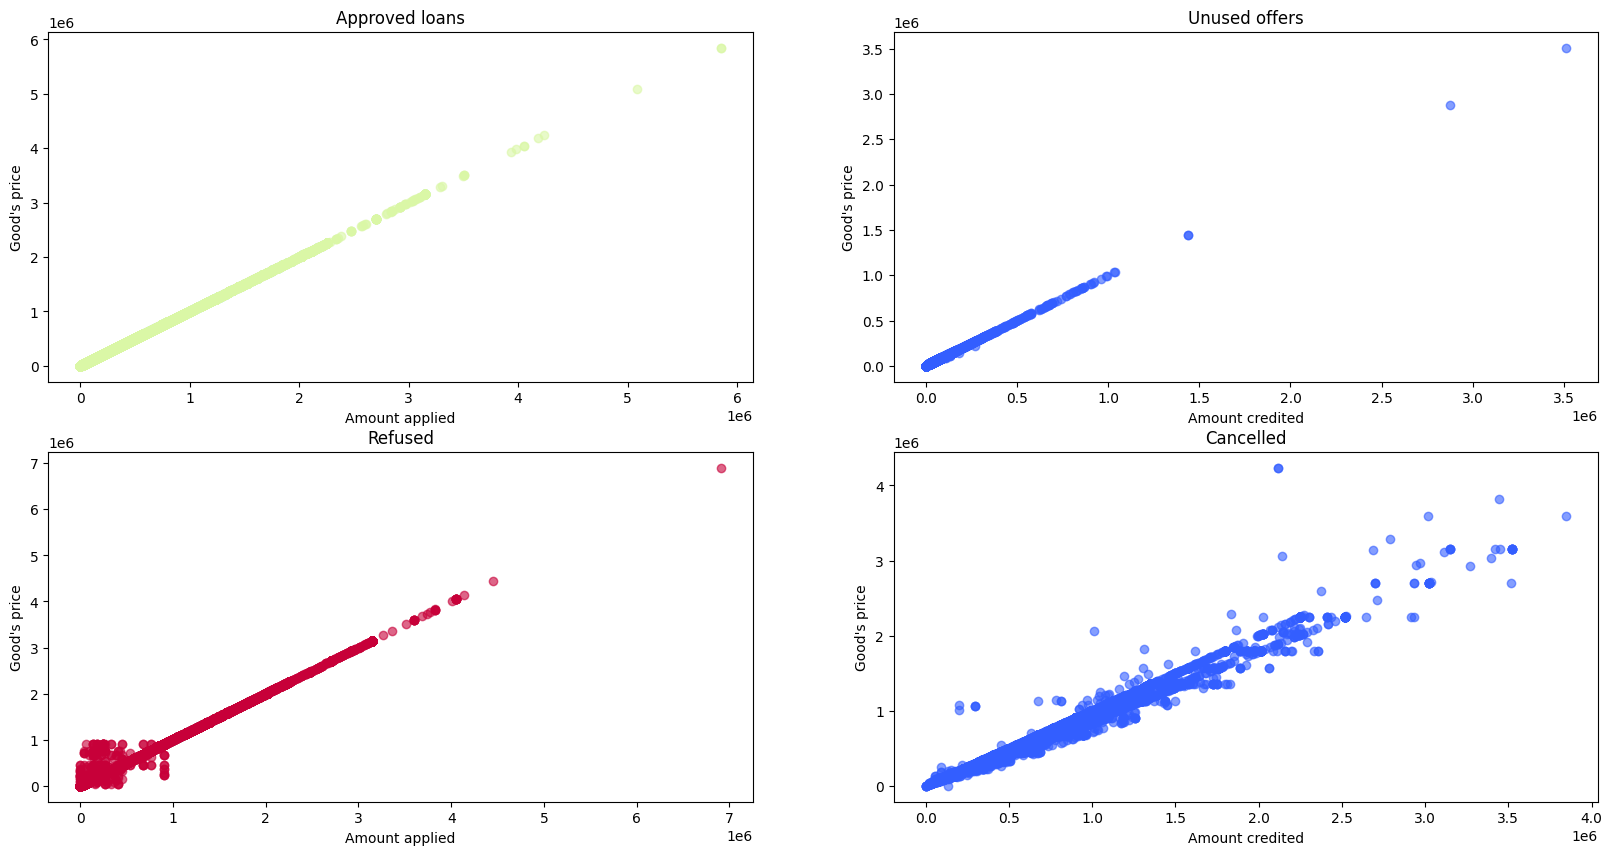

In [68]:
plt.figure(figsize=(20, 10))
plt.subplot(2,2,1)
plt.scatter(prvAprDf['AMT_APPLICATION'],prvAprDf['AMT_GOODS_PRICE'], color='#DAF7A6', alpha=0.6)
plt.xlabel('Amount applied')
plt.ylabel("Good's price")
plt.title("Approved loans")

plt.subplot(2,2,2)
plt.scatter(prvUnDf['AMT_CREDIT'],prvUnDf['AMT_GOODS_PRICE'], color='#335EFF', alpha=0.6)
plt.xlabel('Amount credited')
plt.ylabel("Good's price")
plt.title('Unused offers')

# 
plt.subplot(2,2,3)
plt.scatter(prvRefDf['AMT_APPLICATION'],prvRefDf['AMT_GOODS_PRICE'], color='#C70039', alpha=0.6)
plt.xlabel('Amount applied')
plt.ylabel("Good's price")
plt.title('Refused')

plt.subplot(2,2,4)
plt.scatter(prvCncDf['AMT_CREDIT'],prvCncDf['AMT_GOODS_PRICE'], color='#335EFF', alpha=0.6)
plt.xlabel('Amount credited')
plt.ylabel("Good's price")
plt.title('Cancelled')


plt.show()